In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

from config import input_columns, output_columns

print("Input columns:", input_columns)
print("Output columns:", output_columns)

Input columns: ['Gender', 'Age']
Output columns: ['HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']


RAW DATA

In [3]:
df = pd.read_csv(Path(r"..\data\raw\dataset_measure.csv").resolve())

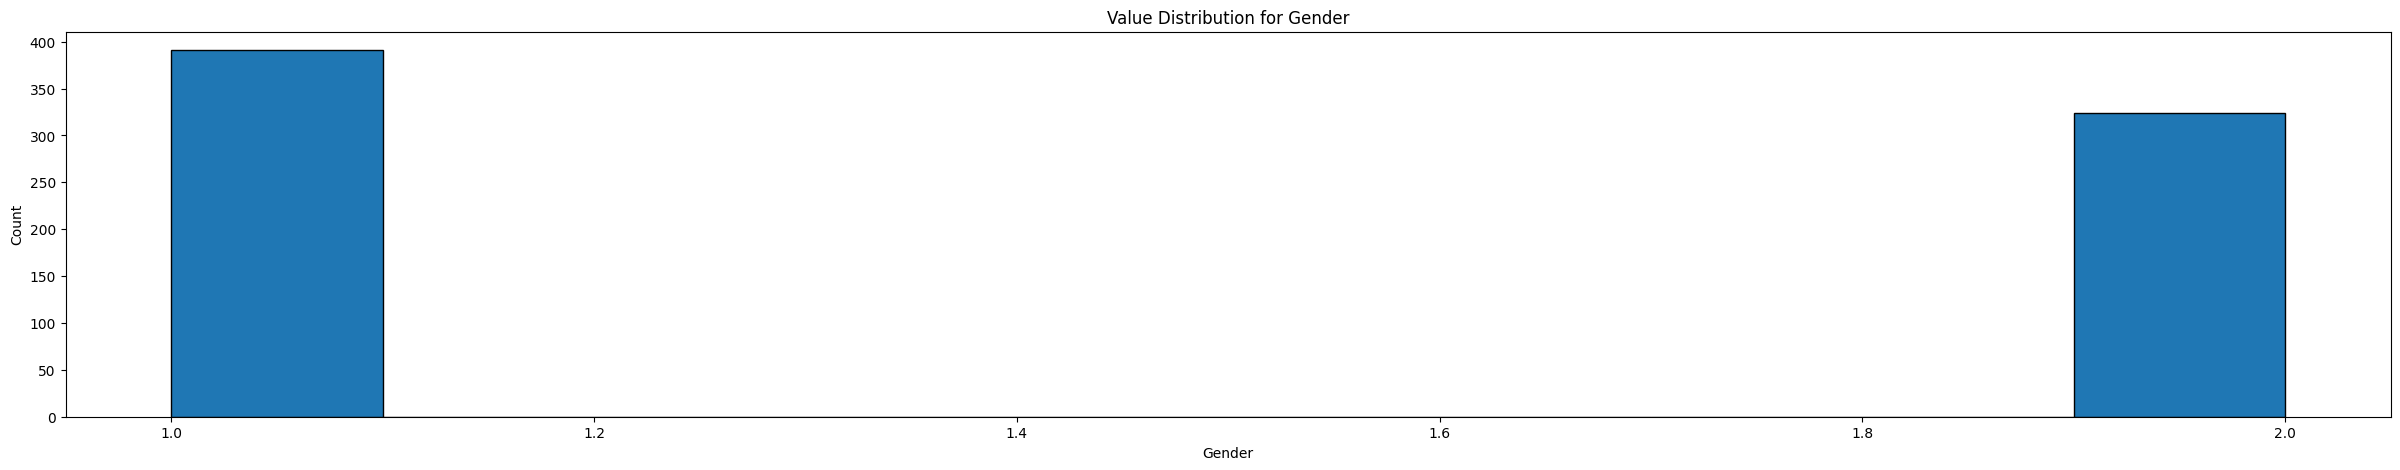

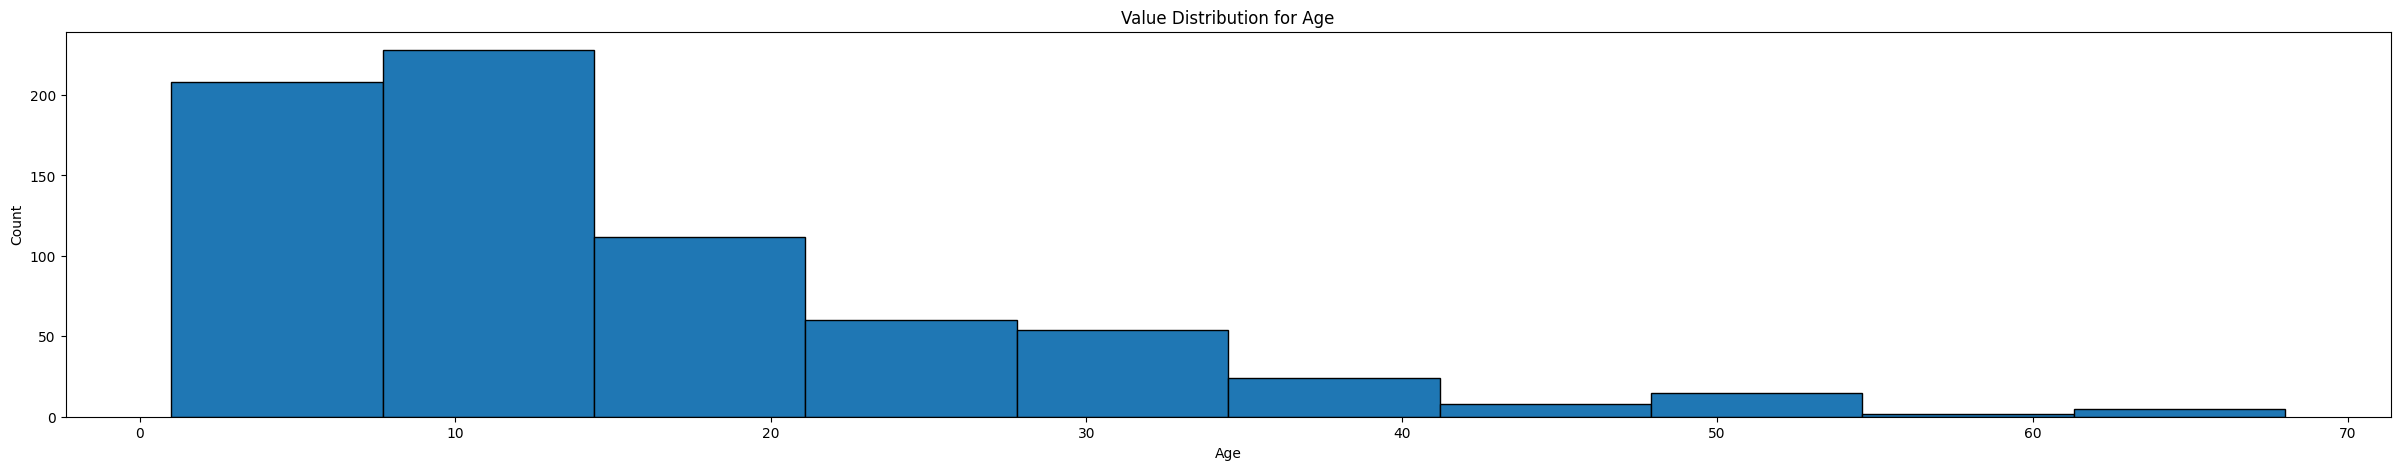

In [4]:
labels = input_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

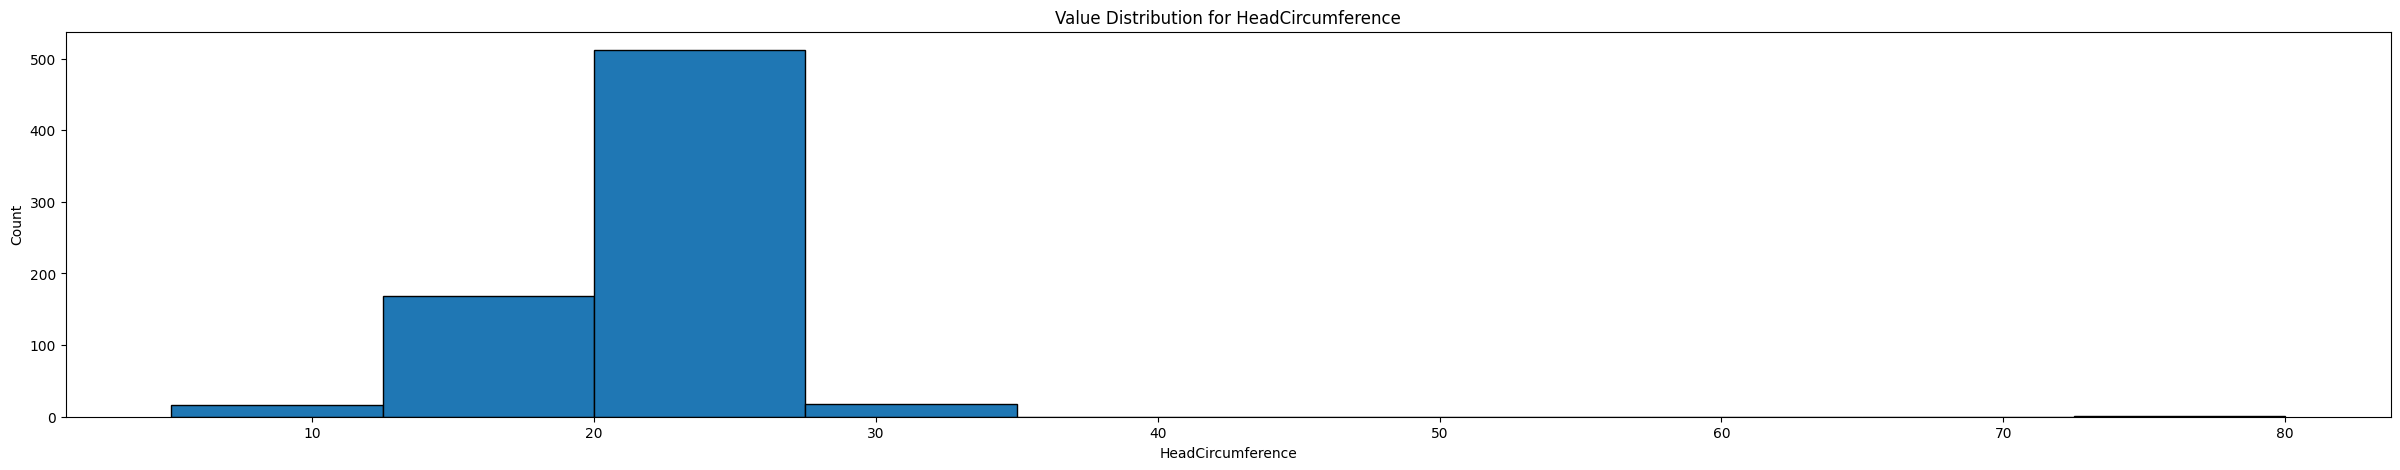

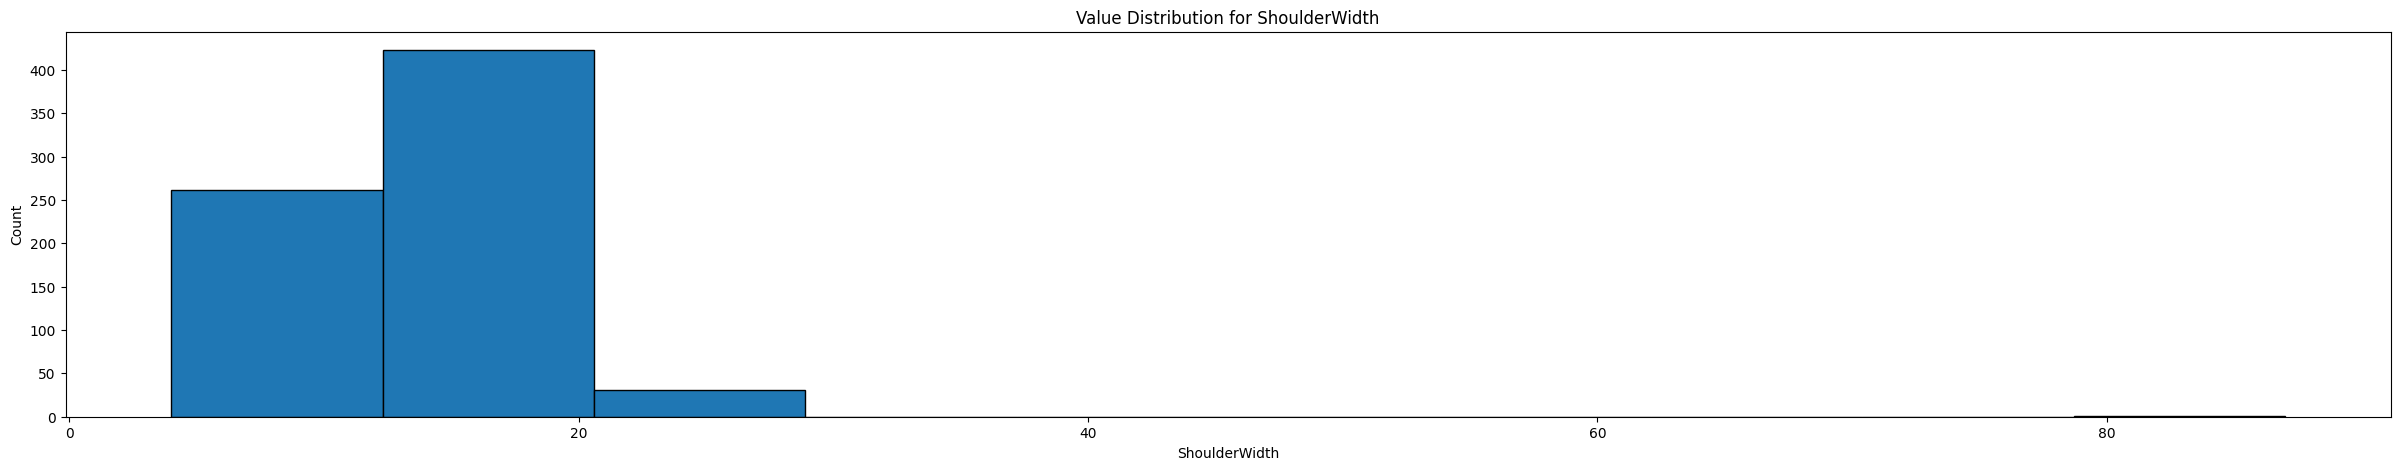

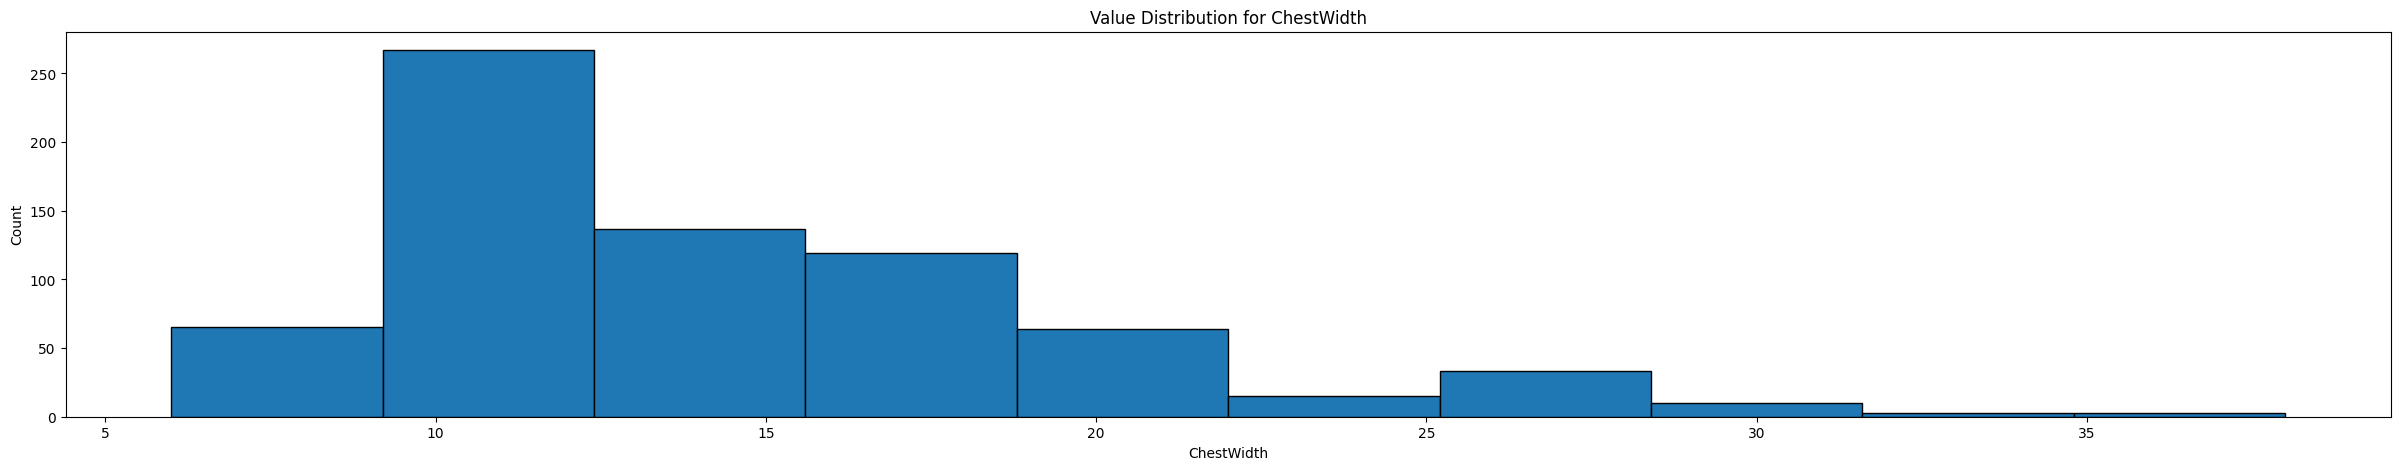

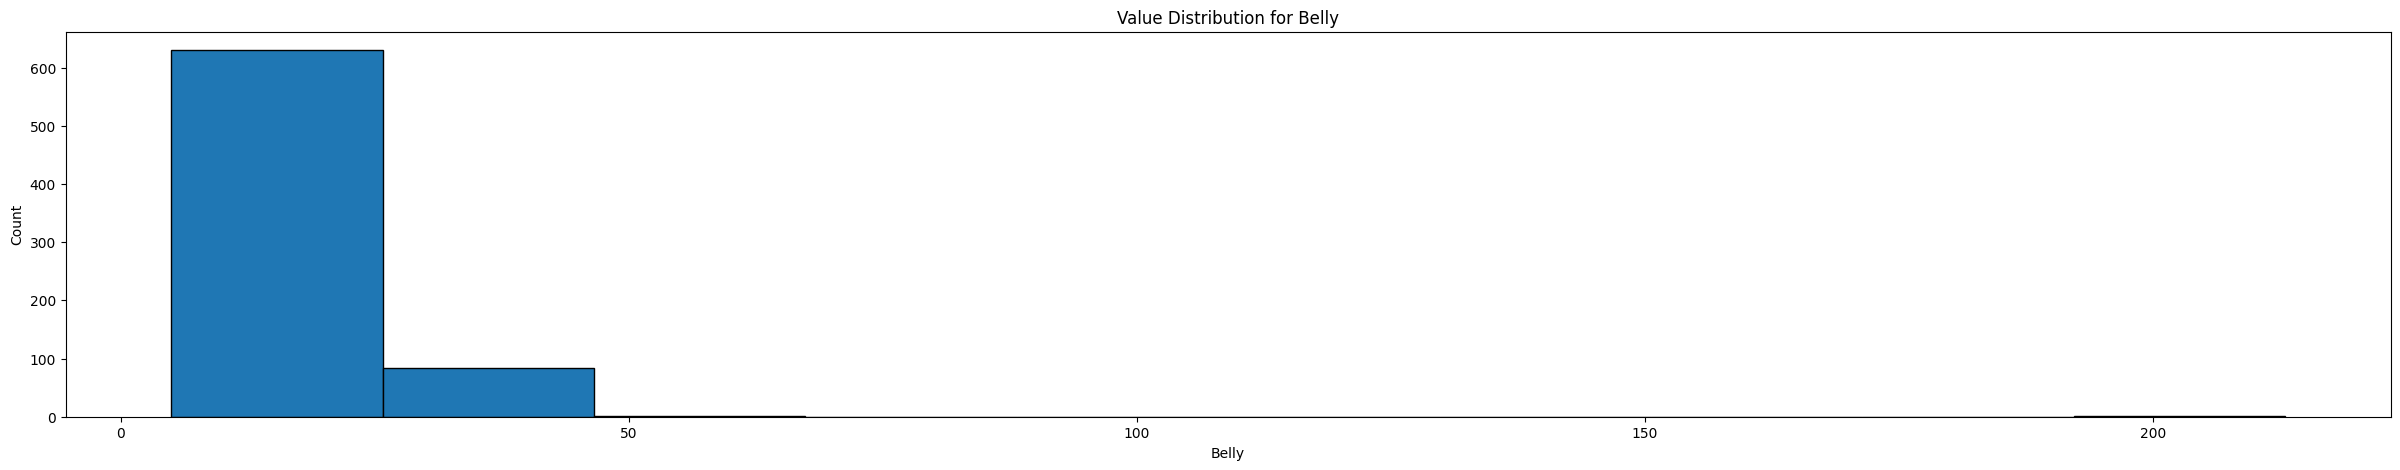

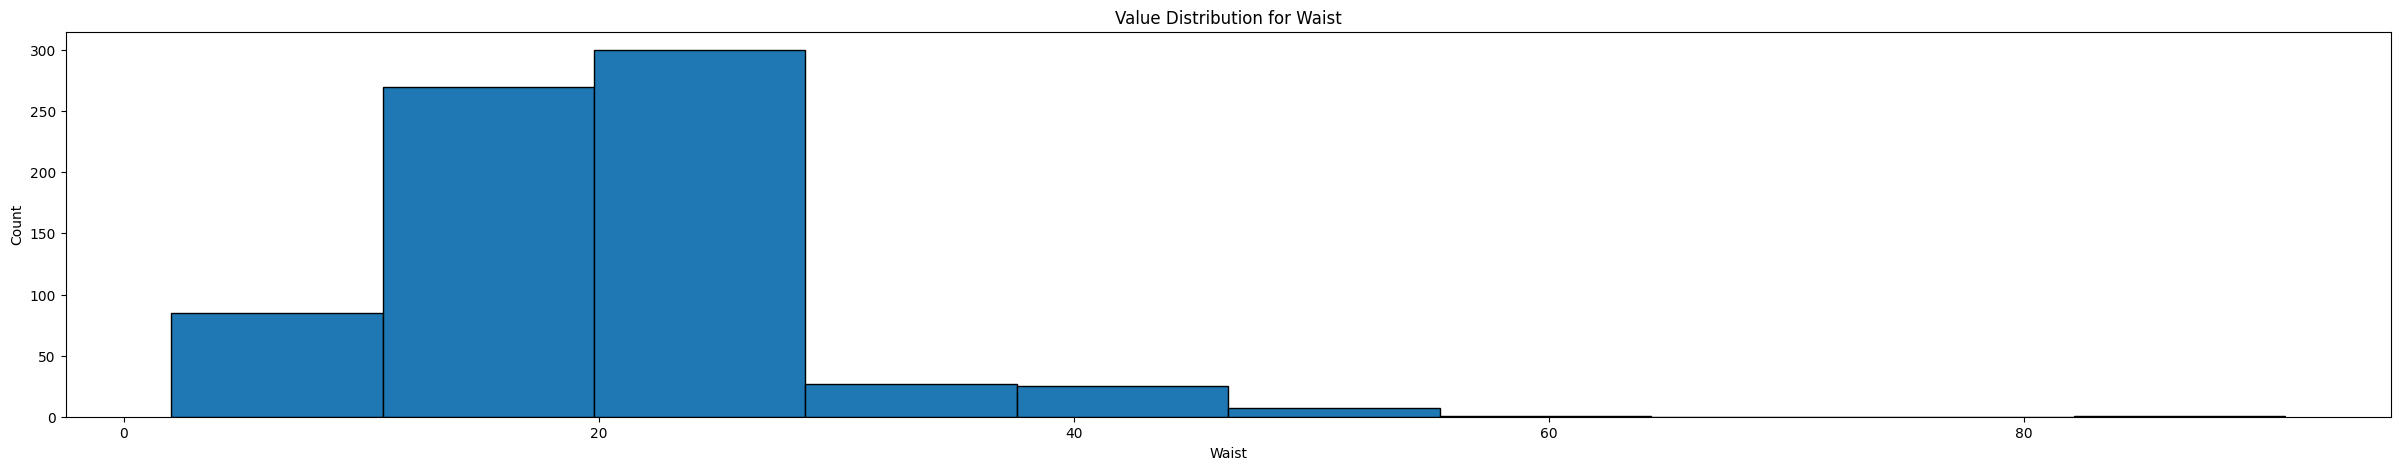

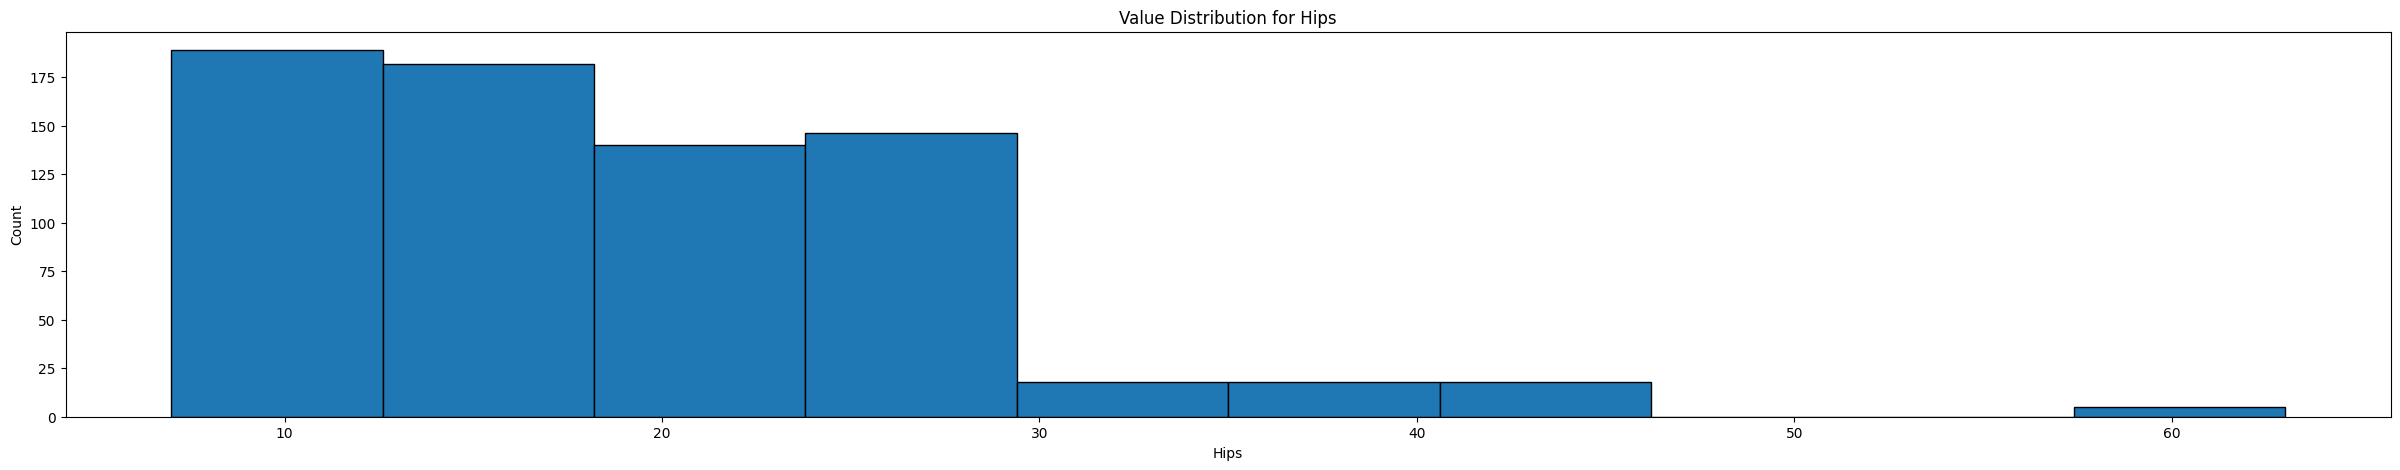

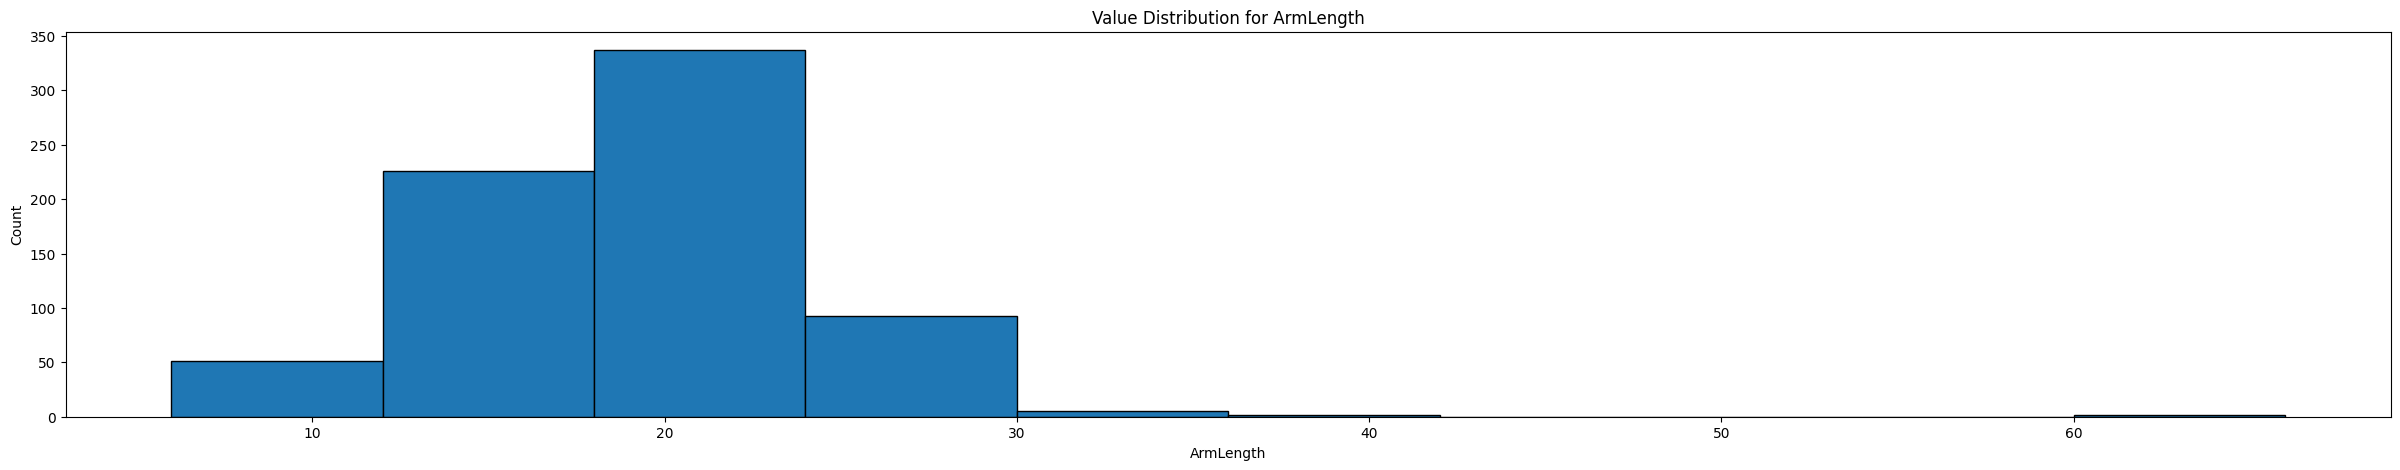

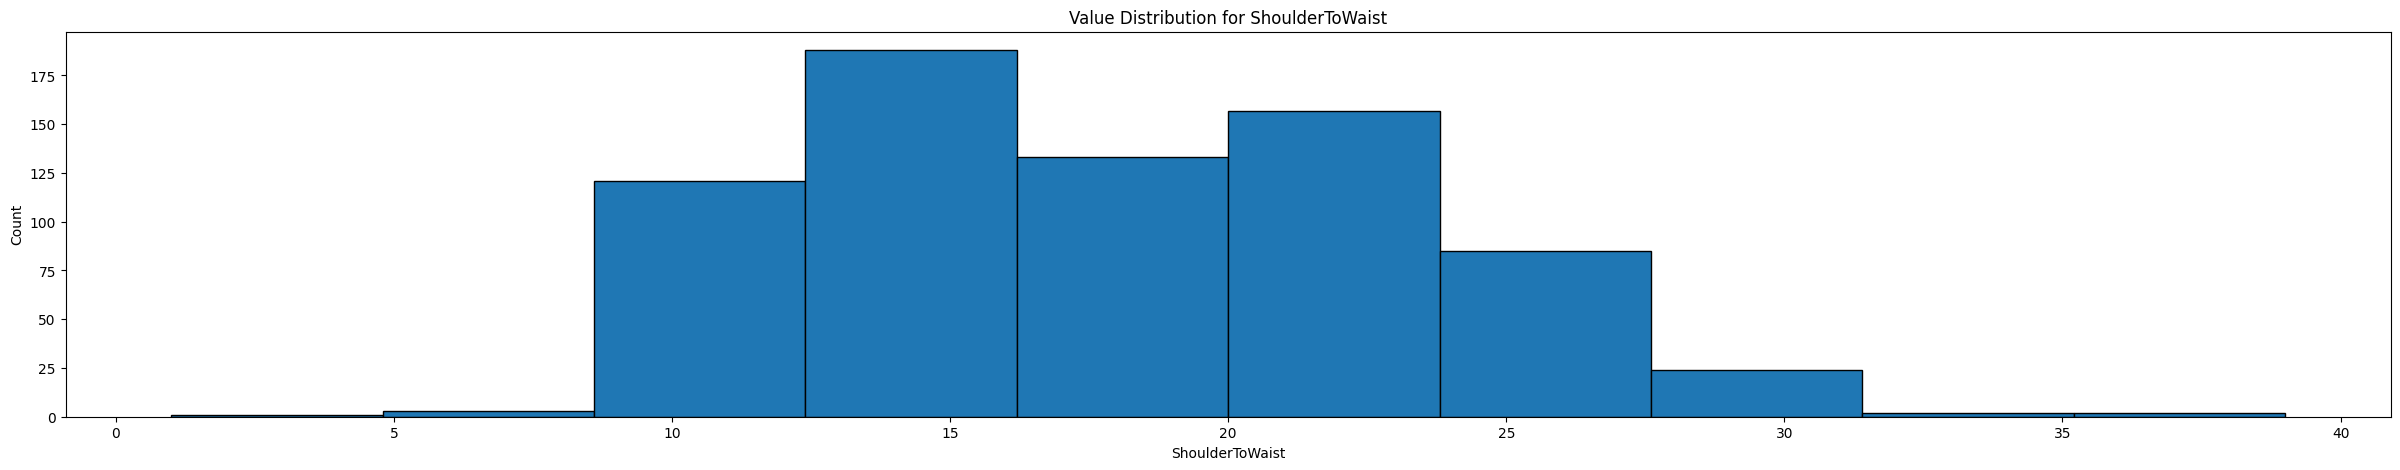

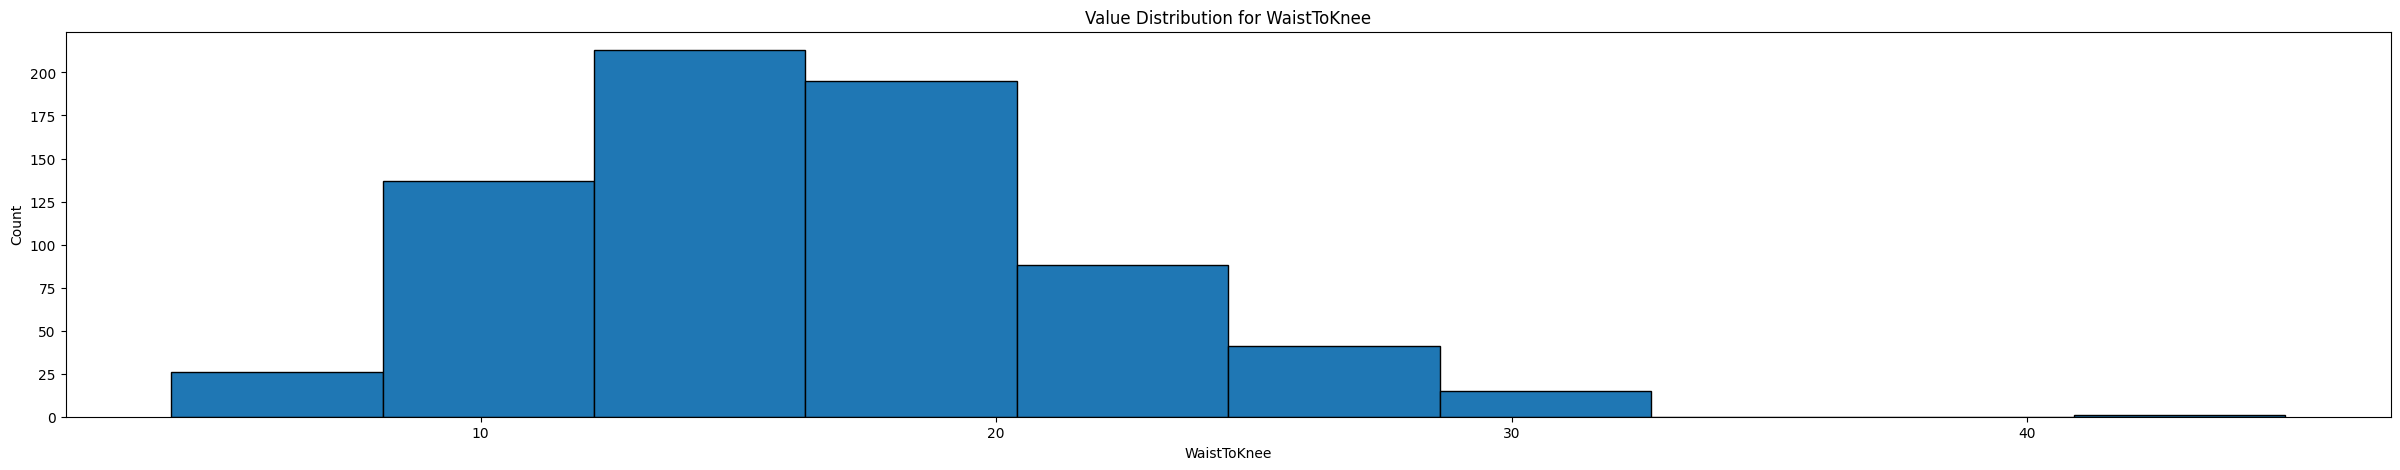

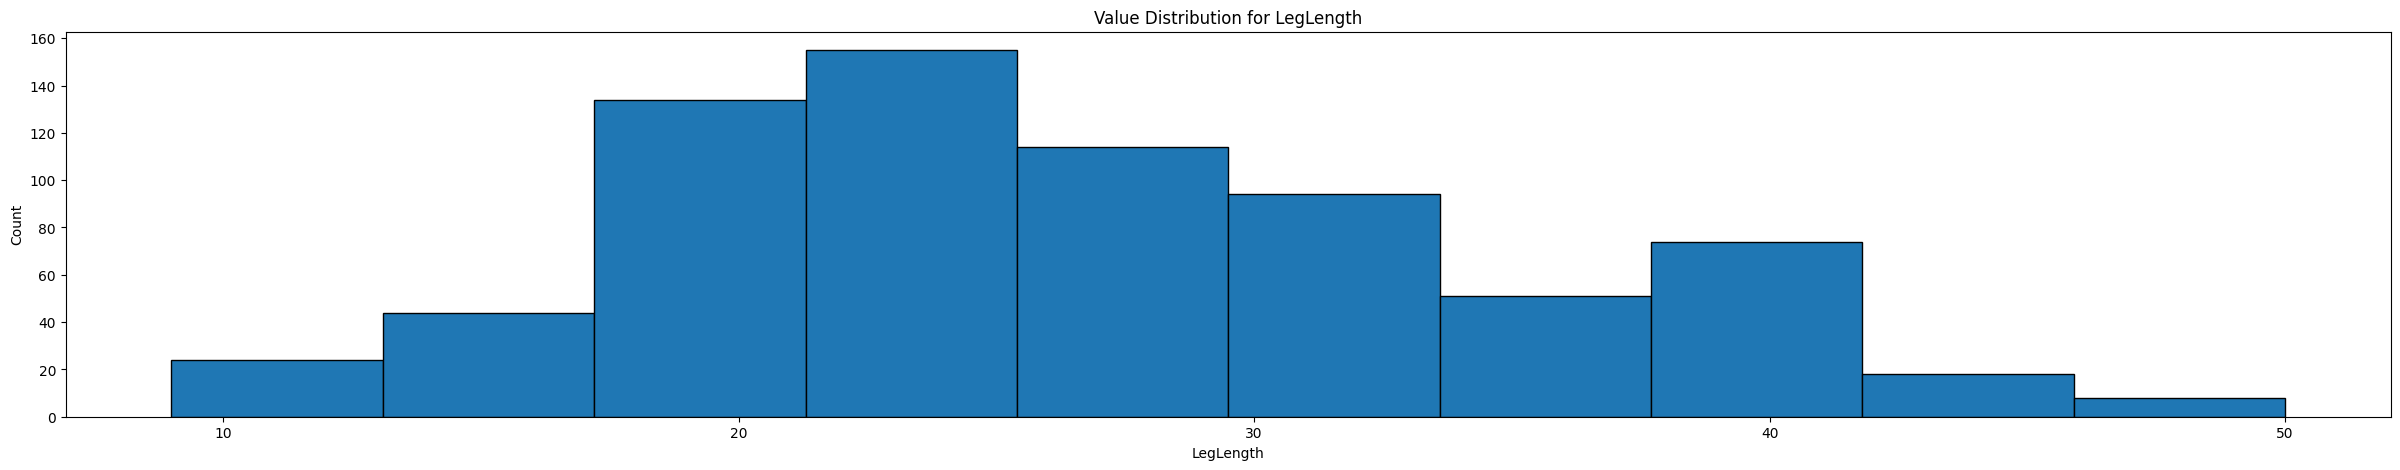

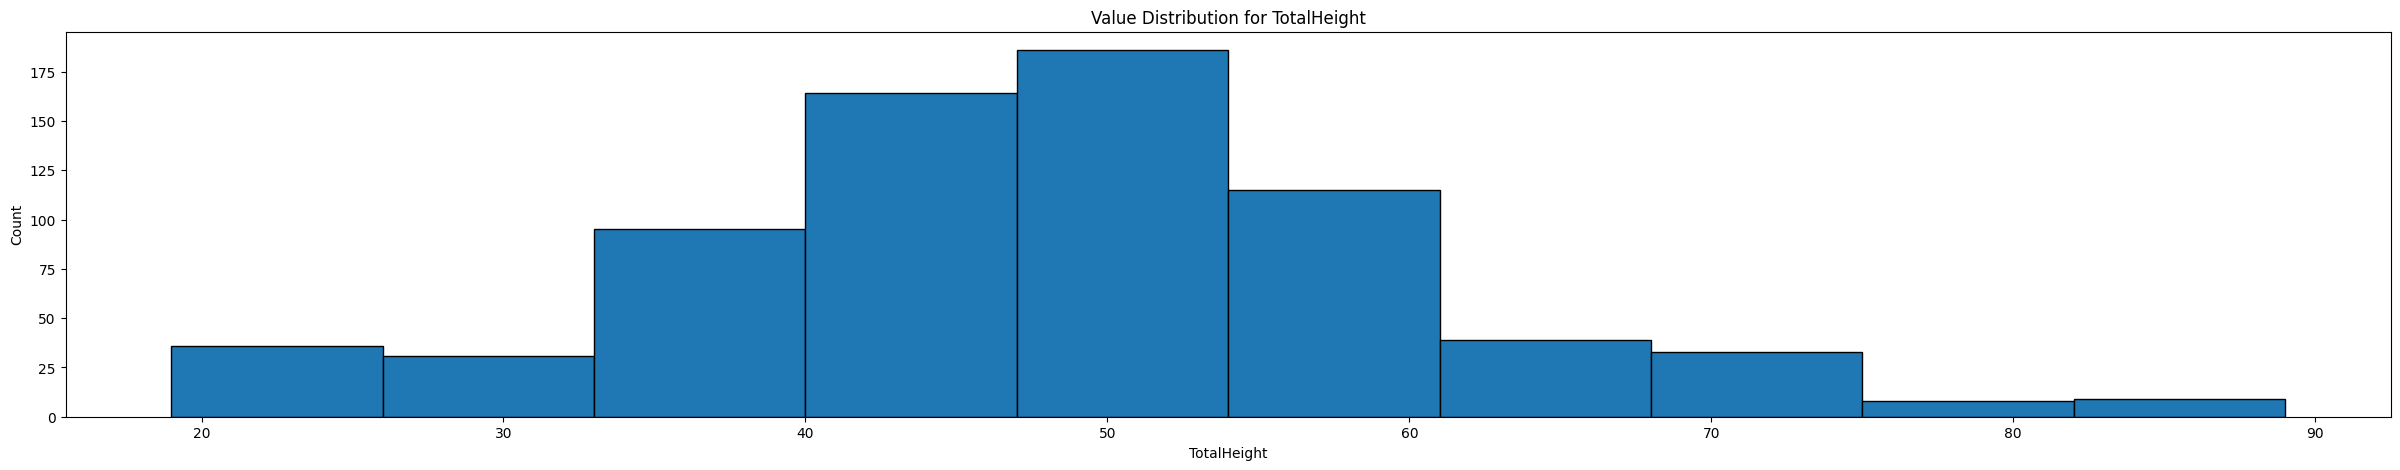

In [5]:
labels = output_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

PROCESSED DATA

In [6]:
df = pd.read_csv(Path(r"..\data\processed\dataset_measure.csv").resolve())

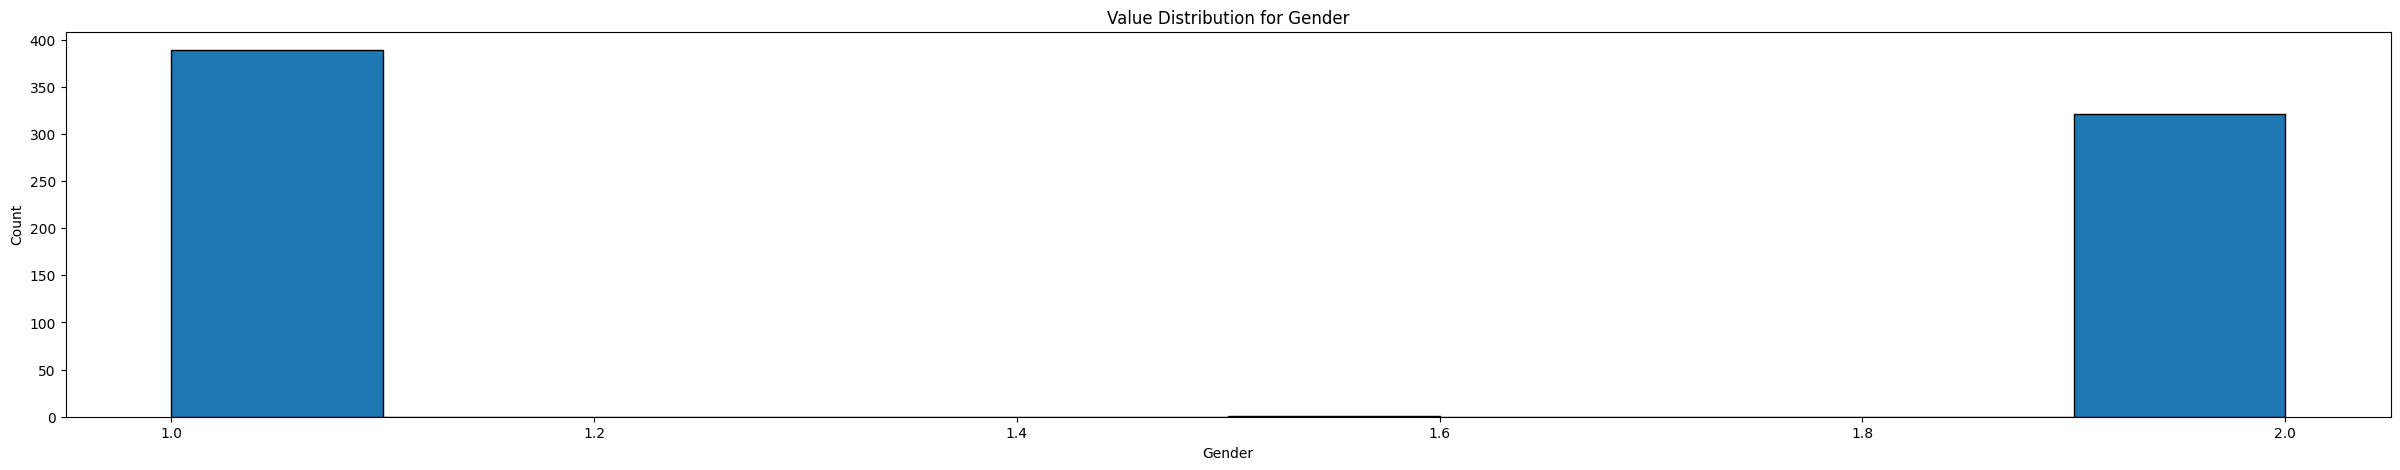

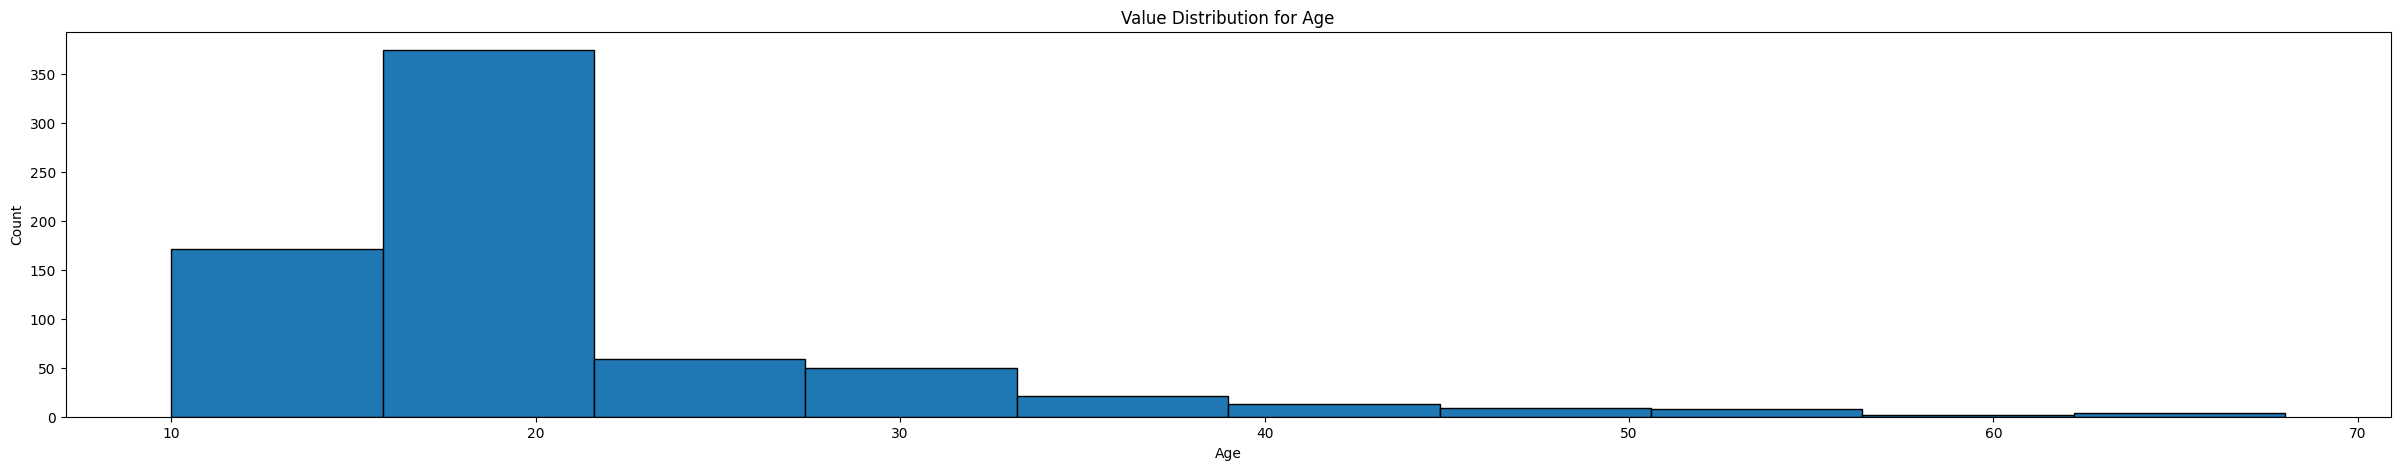

In [7]:
labels = input_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

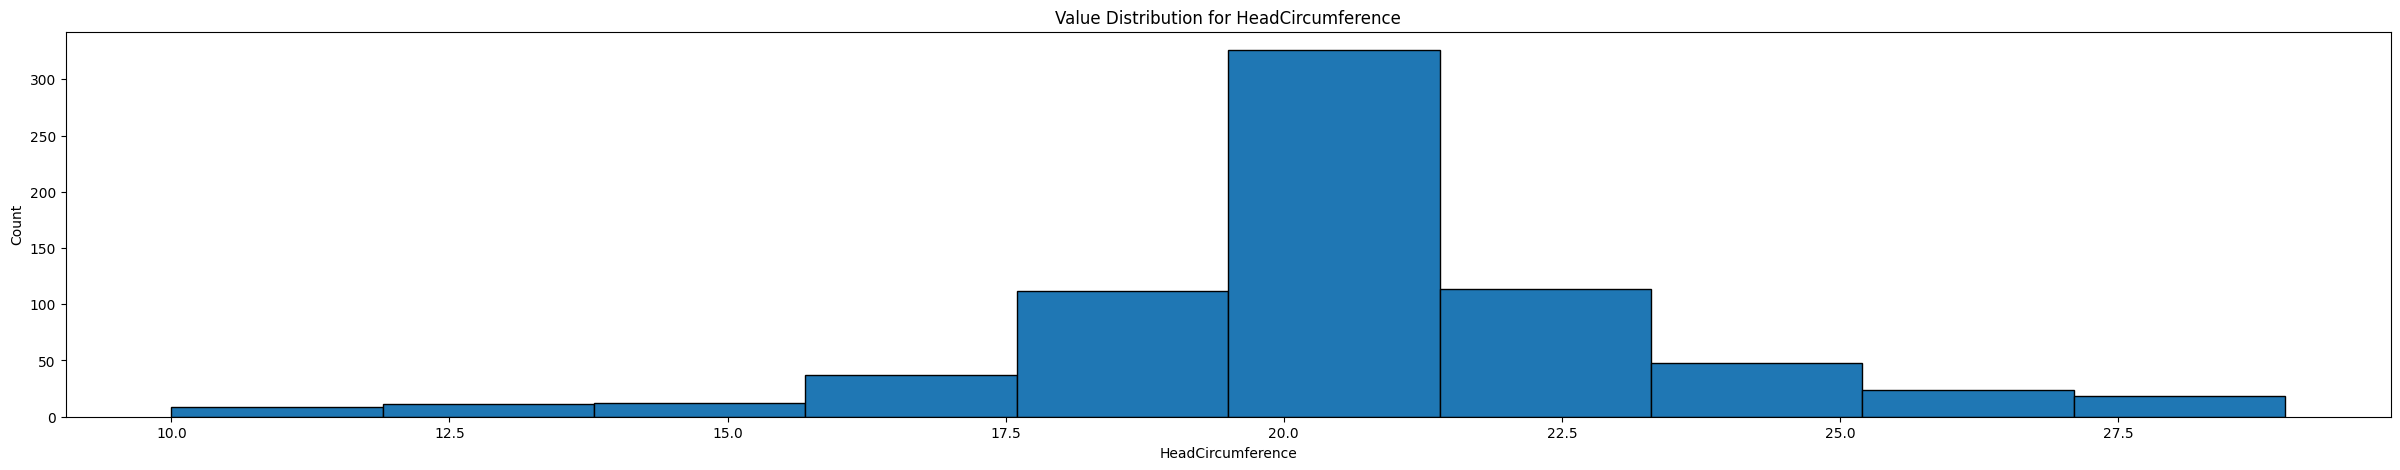

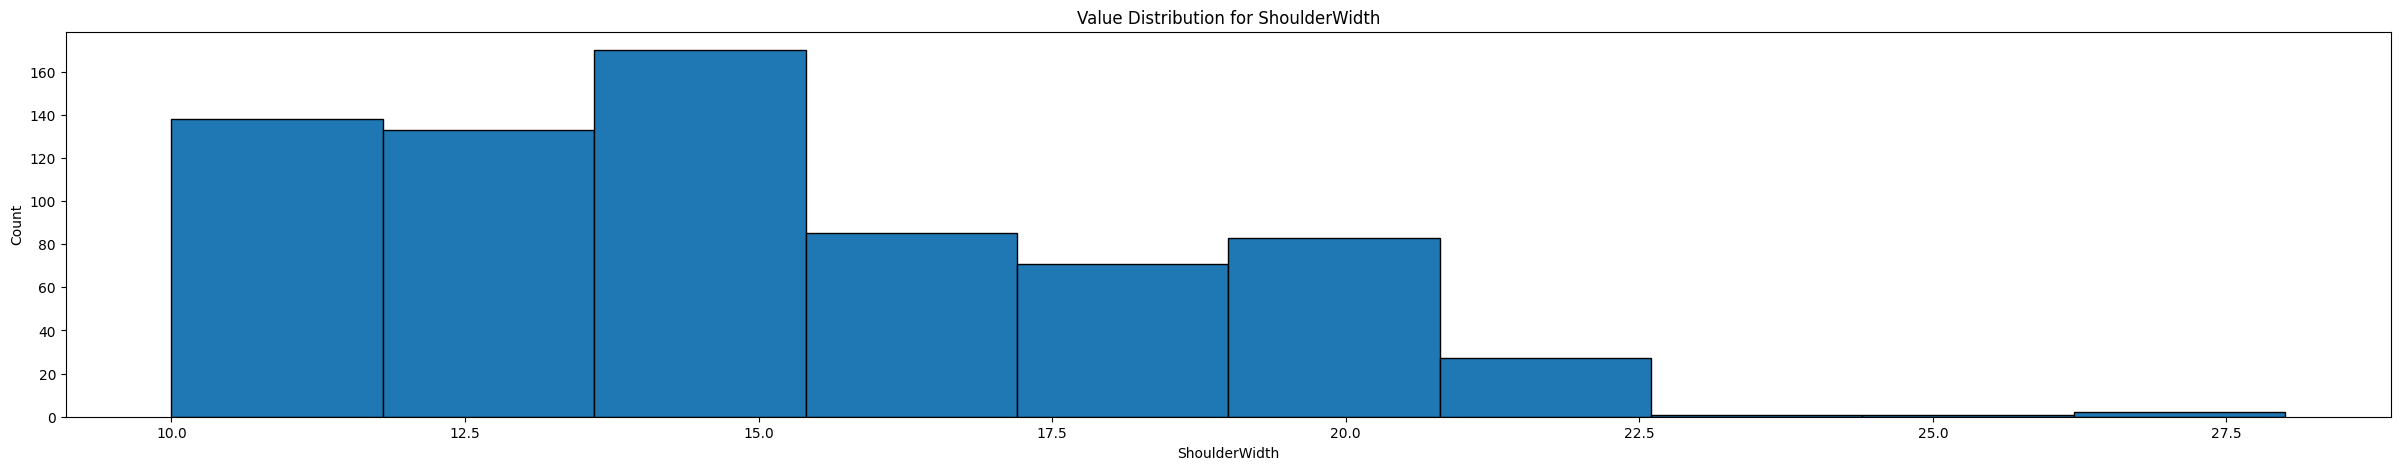

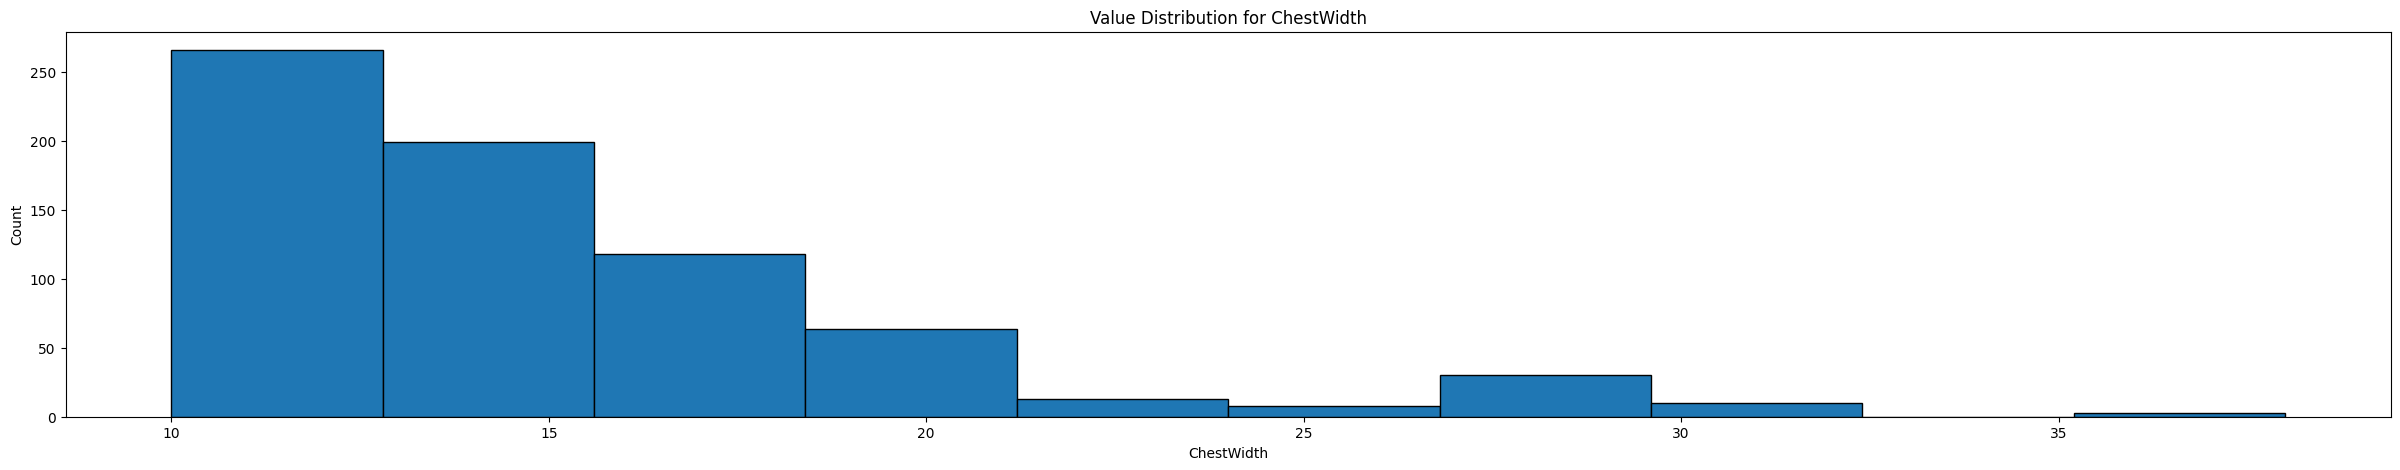

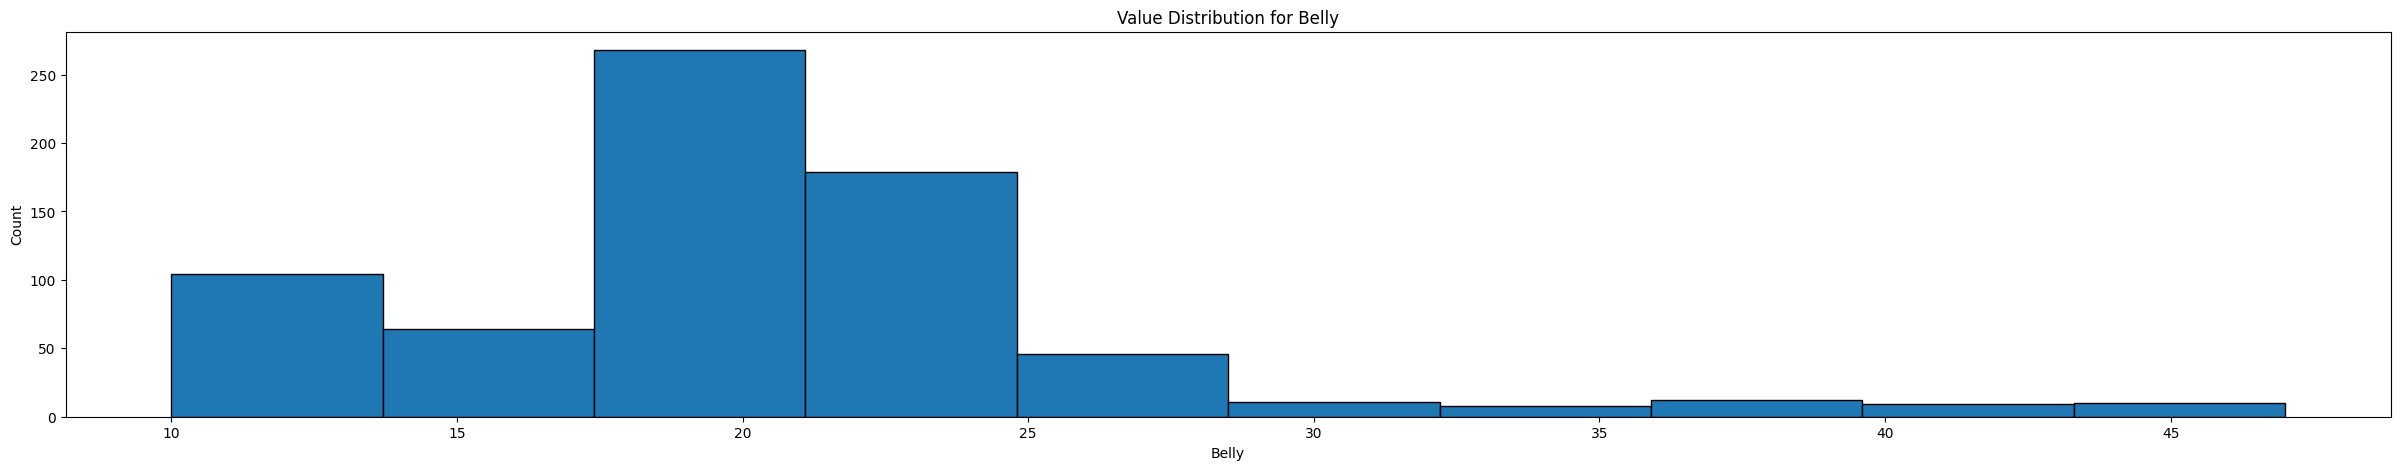

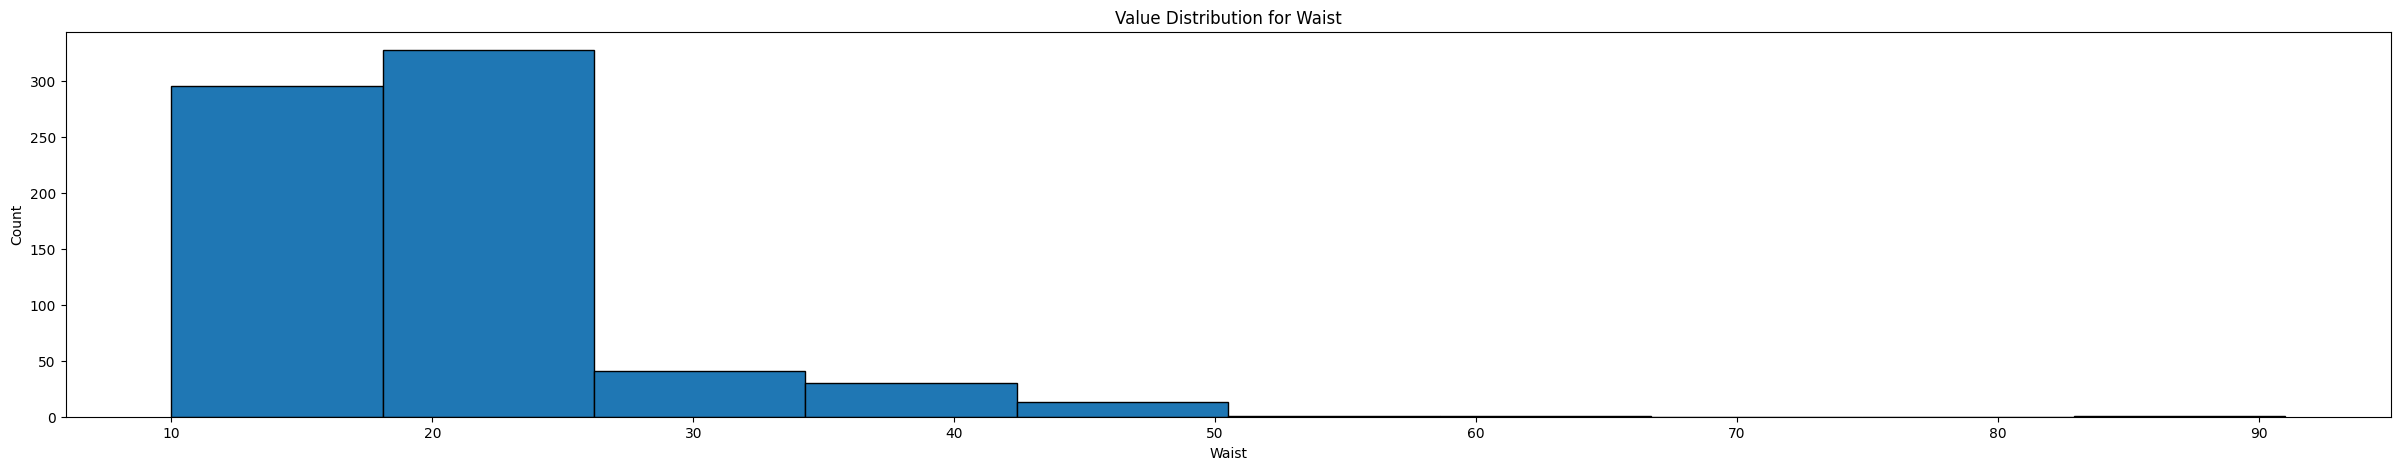

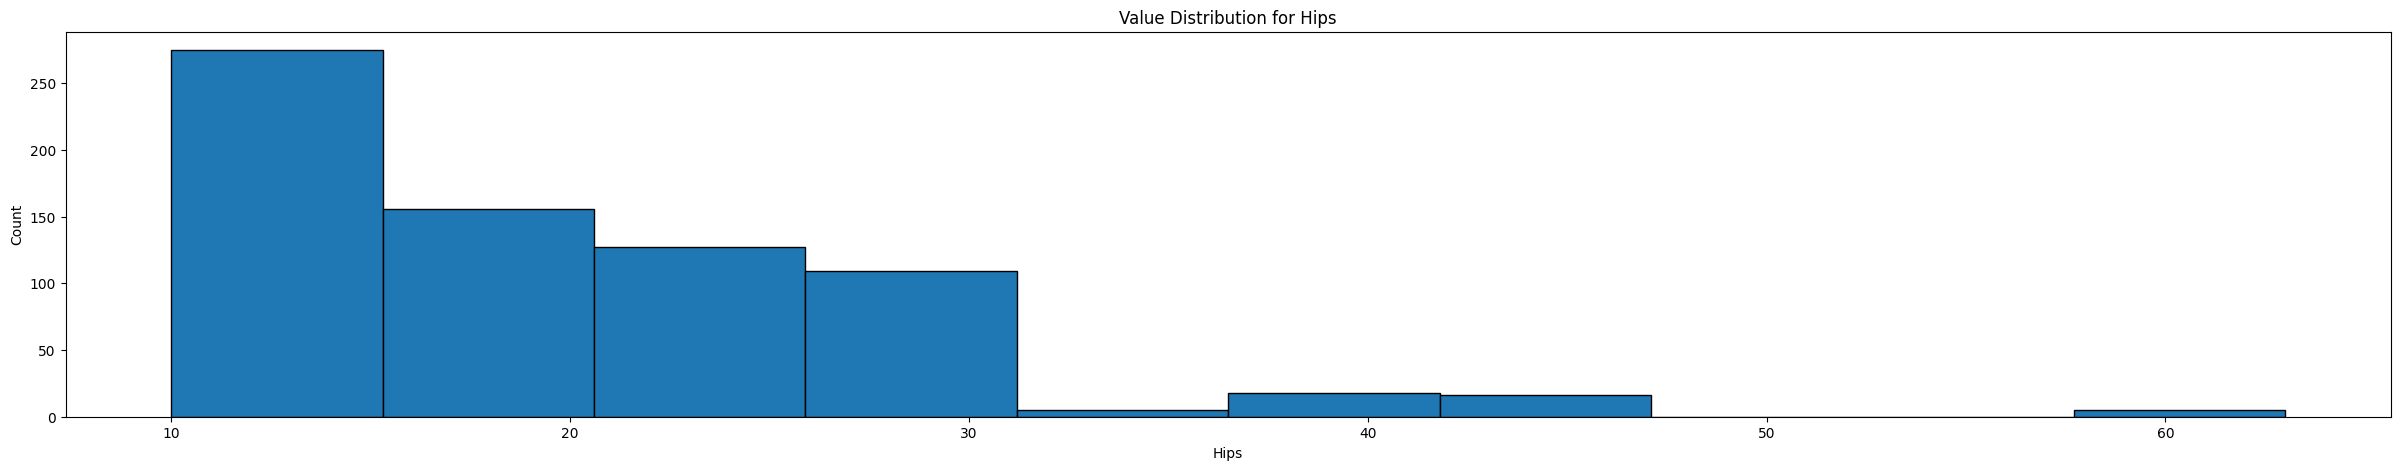

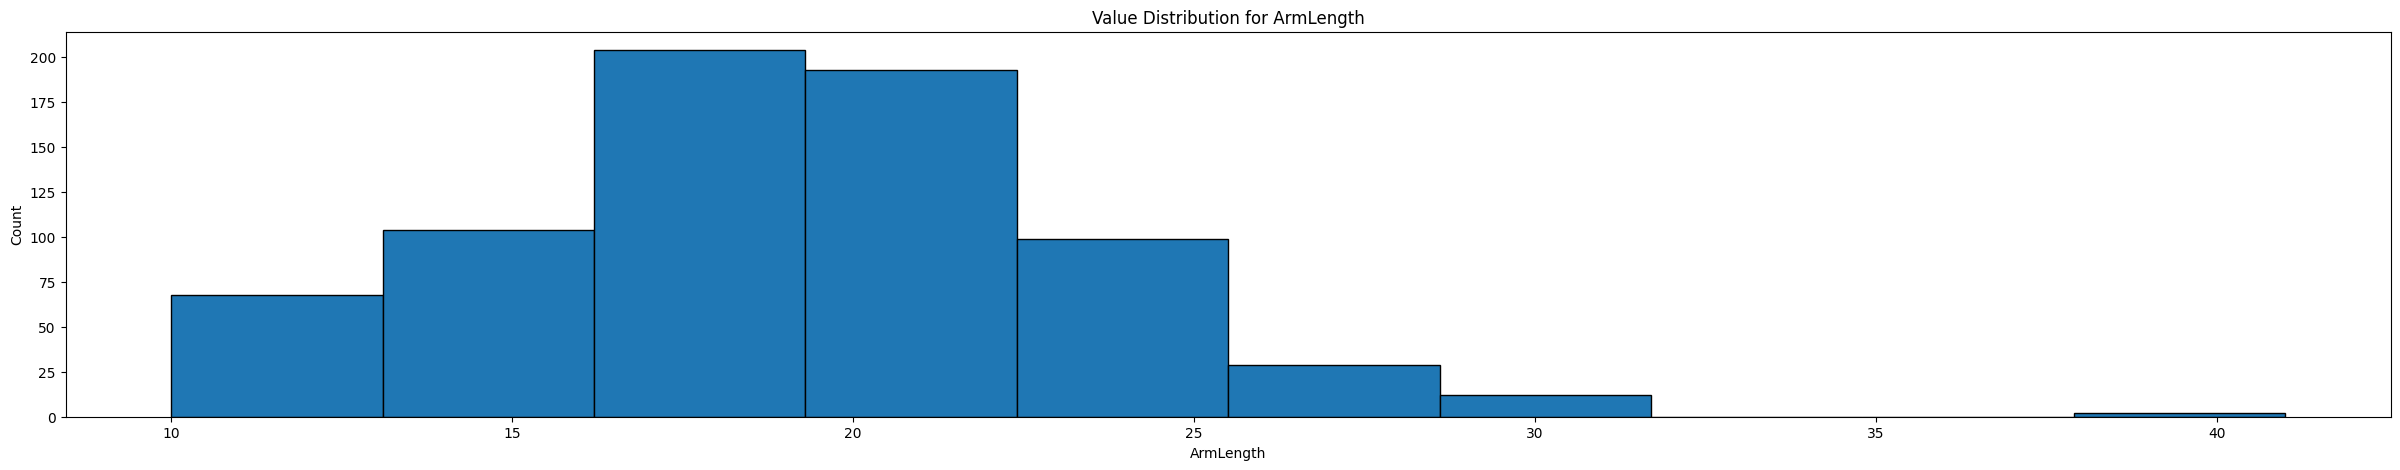

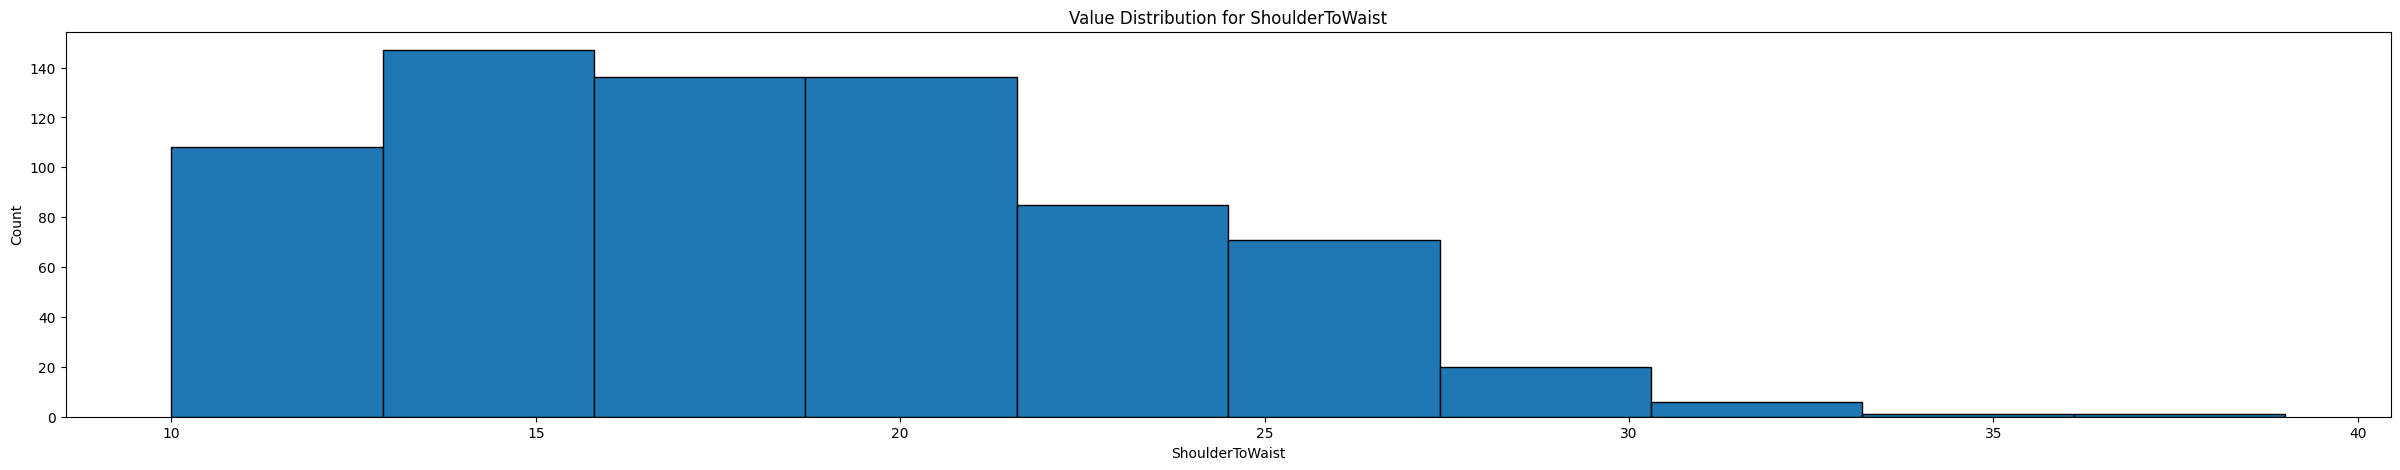

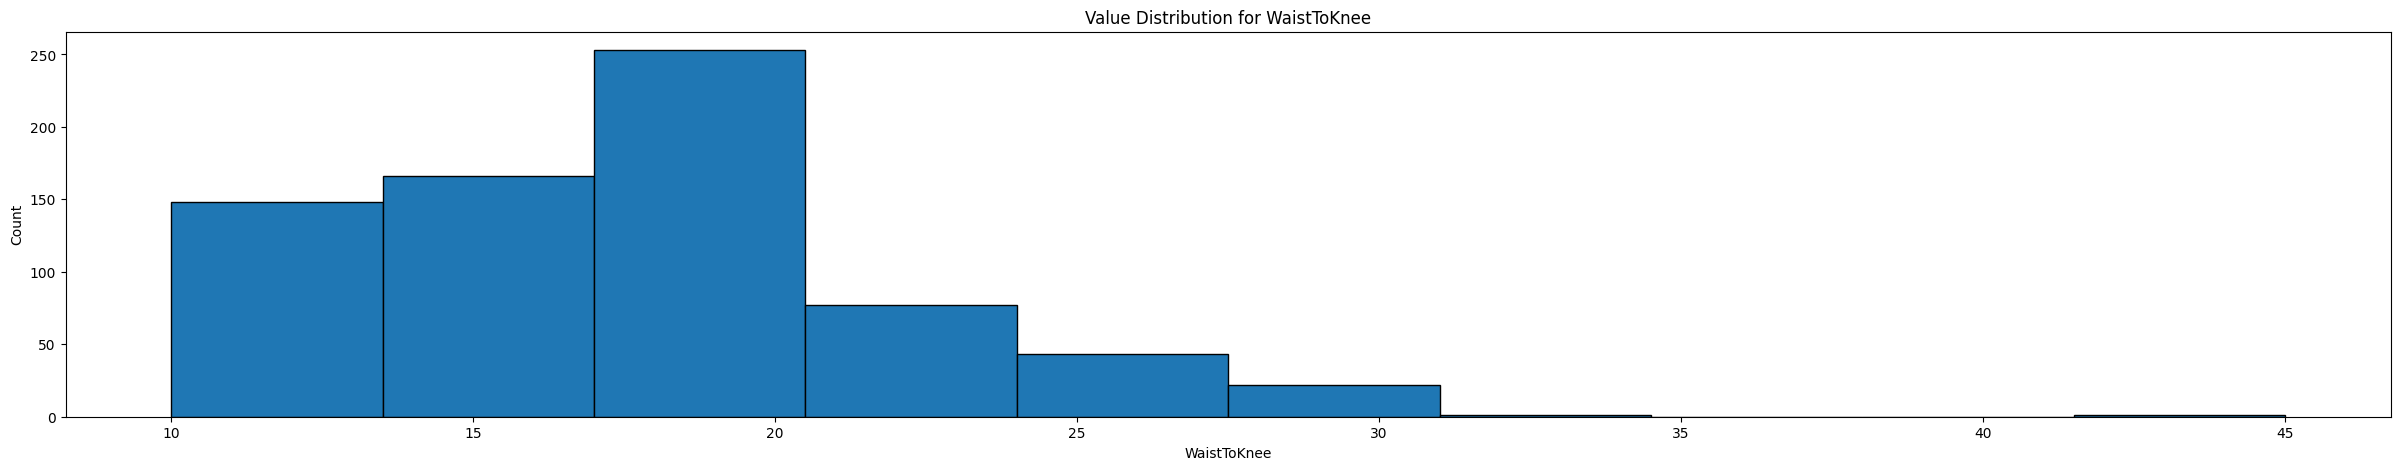

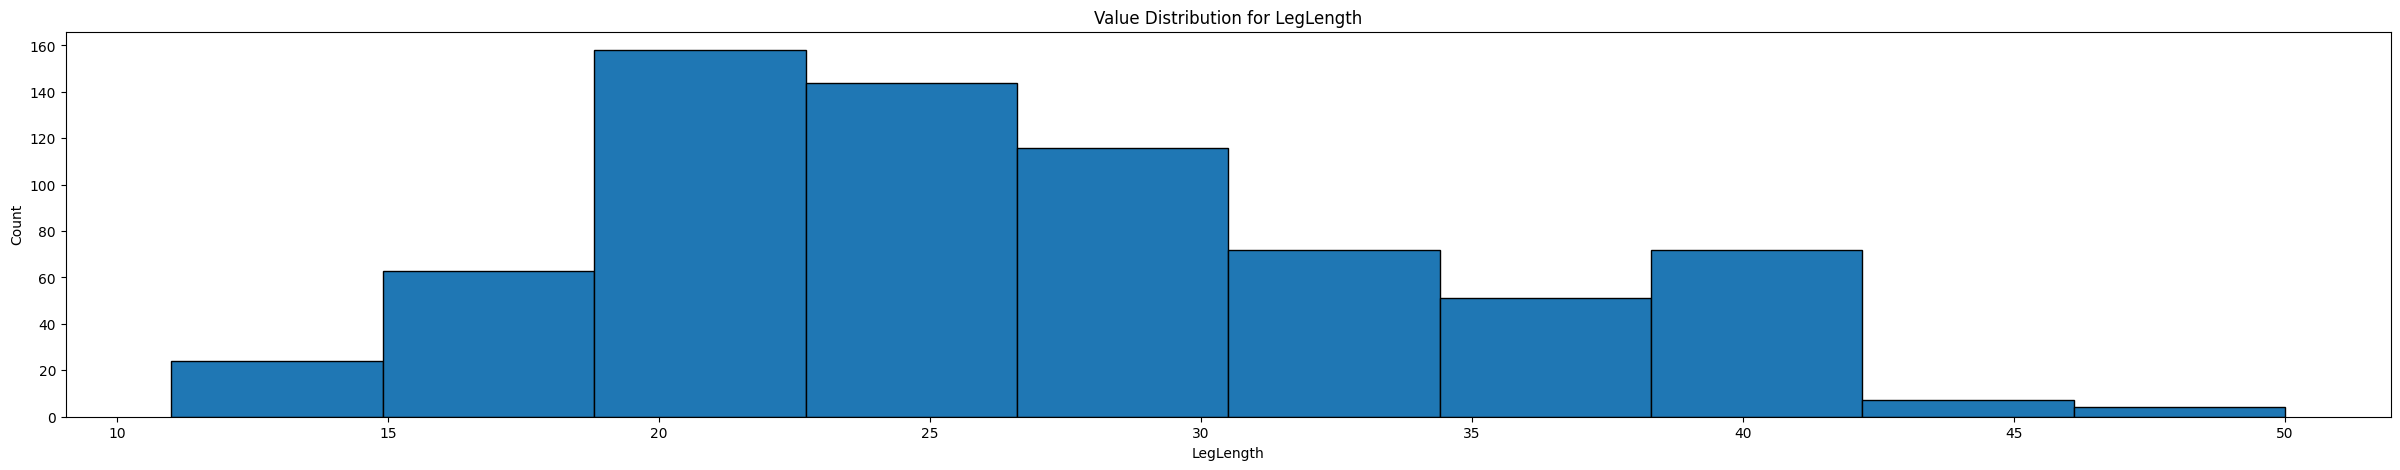

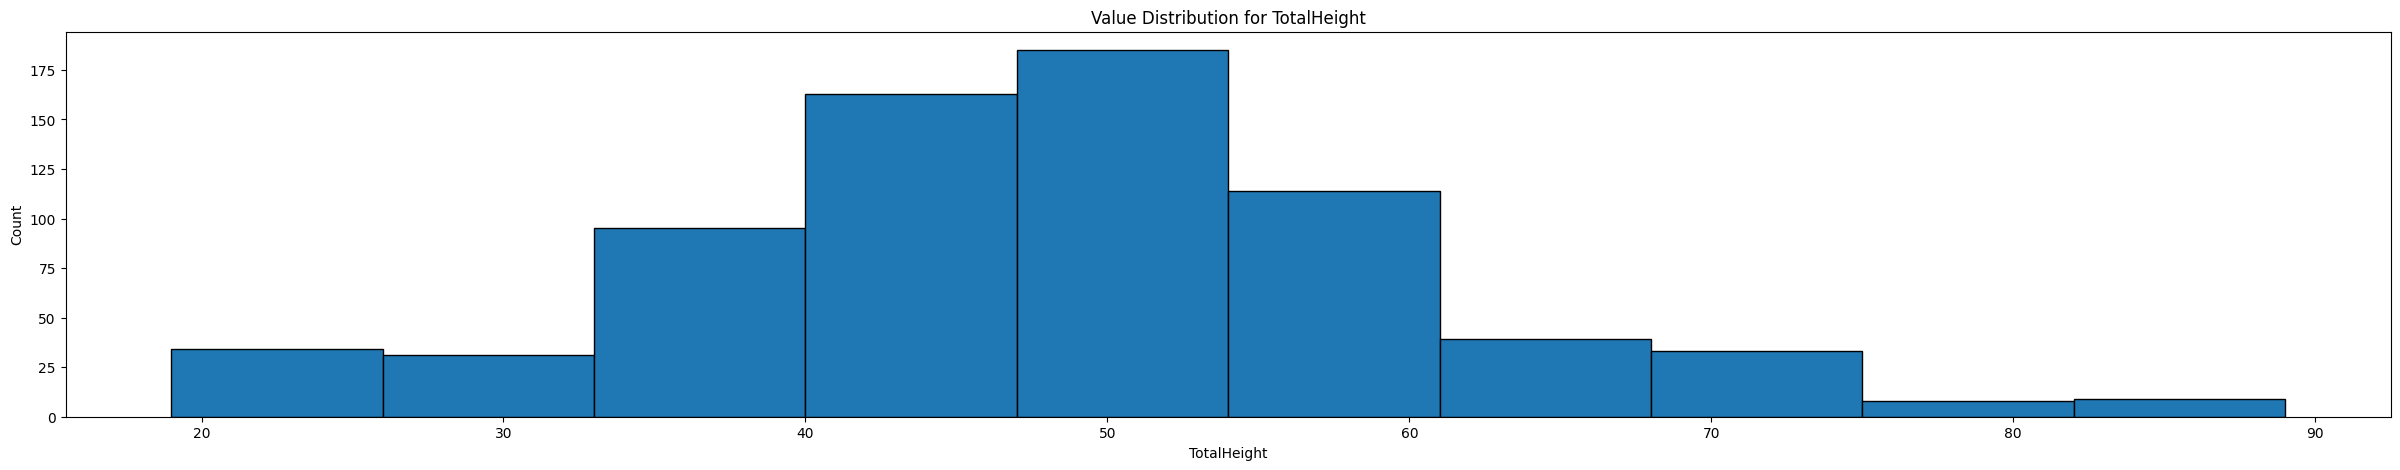

In [8]:
labels = output_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

EVALUATION

In [9]:
metrics = pd.read_csv(Path(r"..\results\metrics\metric.csv").resolve())

In [10]:
metrics

,MAE,MSE,RMSE,R2
0,4.716546,40.02036,6.326165,0.655395


In [11]:
test = pd.read_csv(Path(r"..\results\dataframe\test.csv").resolve())
pred = pd.read_csv(Path(r"..\results\dataframe\pred.csv").resolve())

In [12]:
figure_path = Path(r"..\results\figures").resolve()

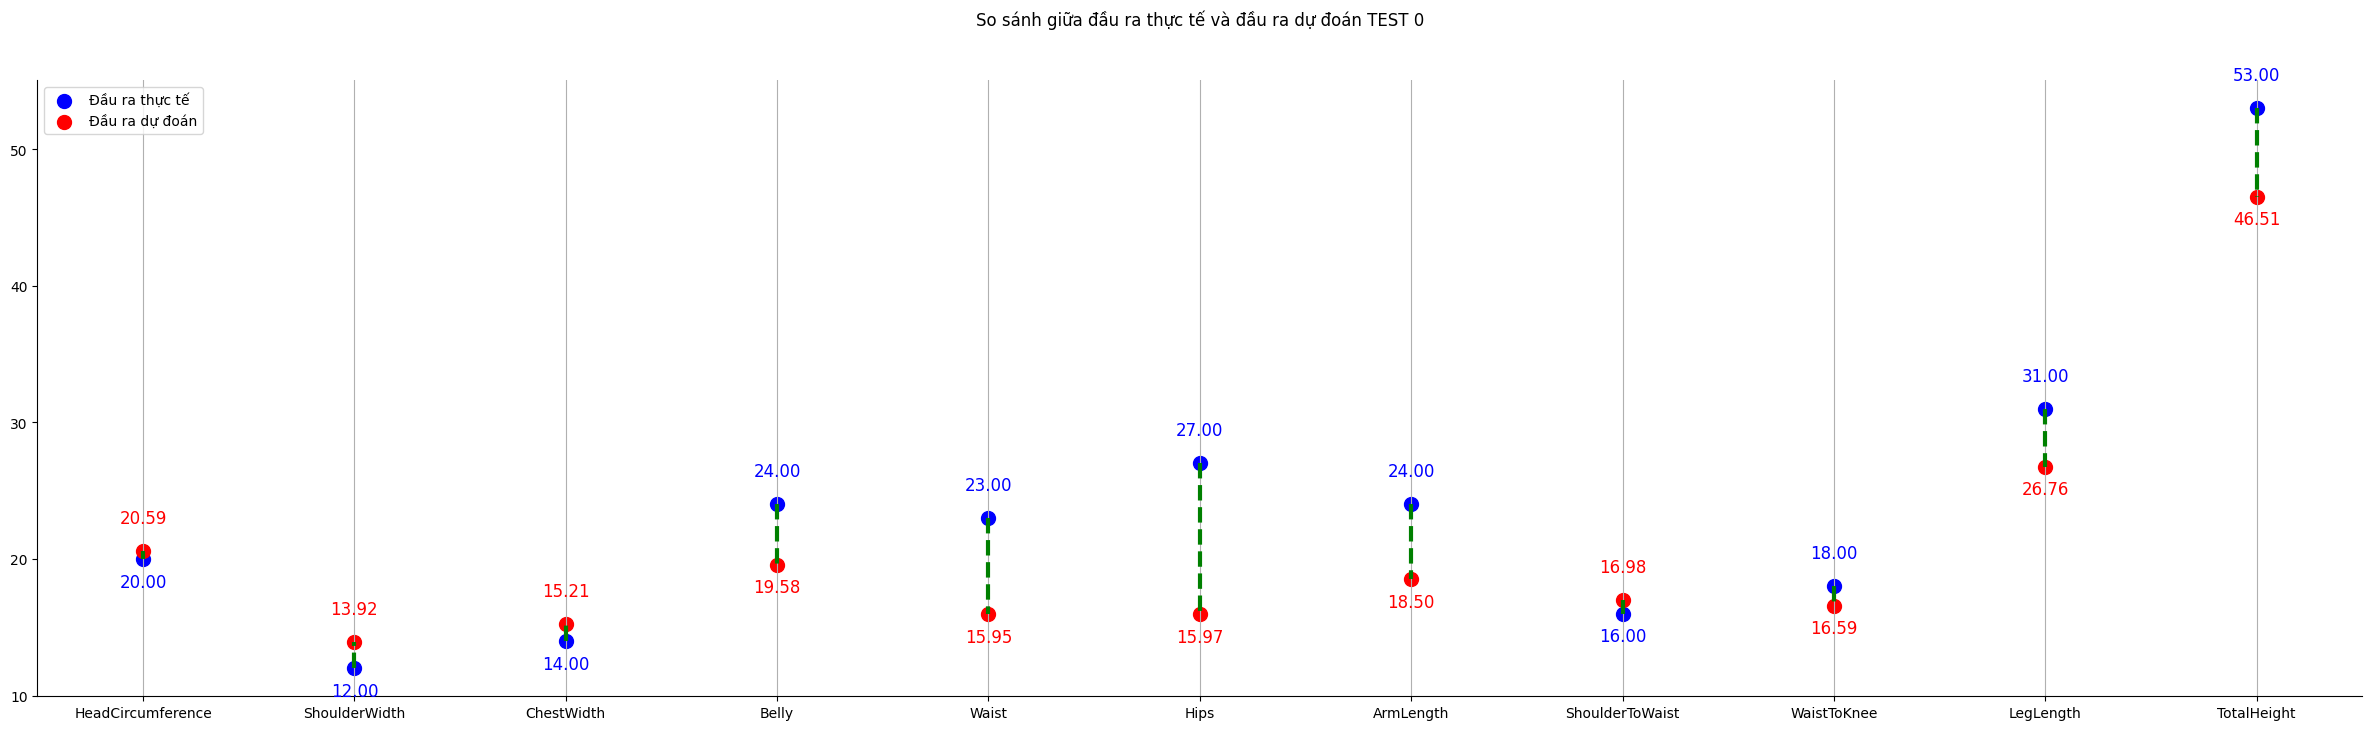

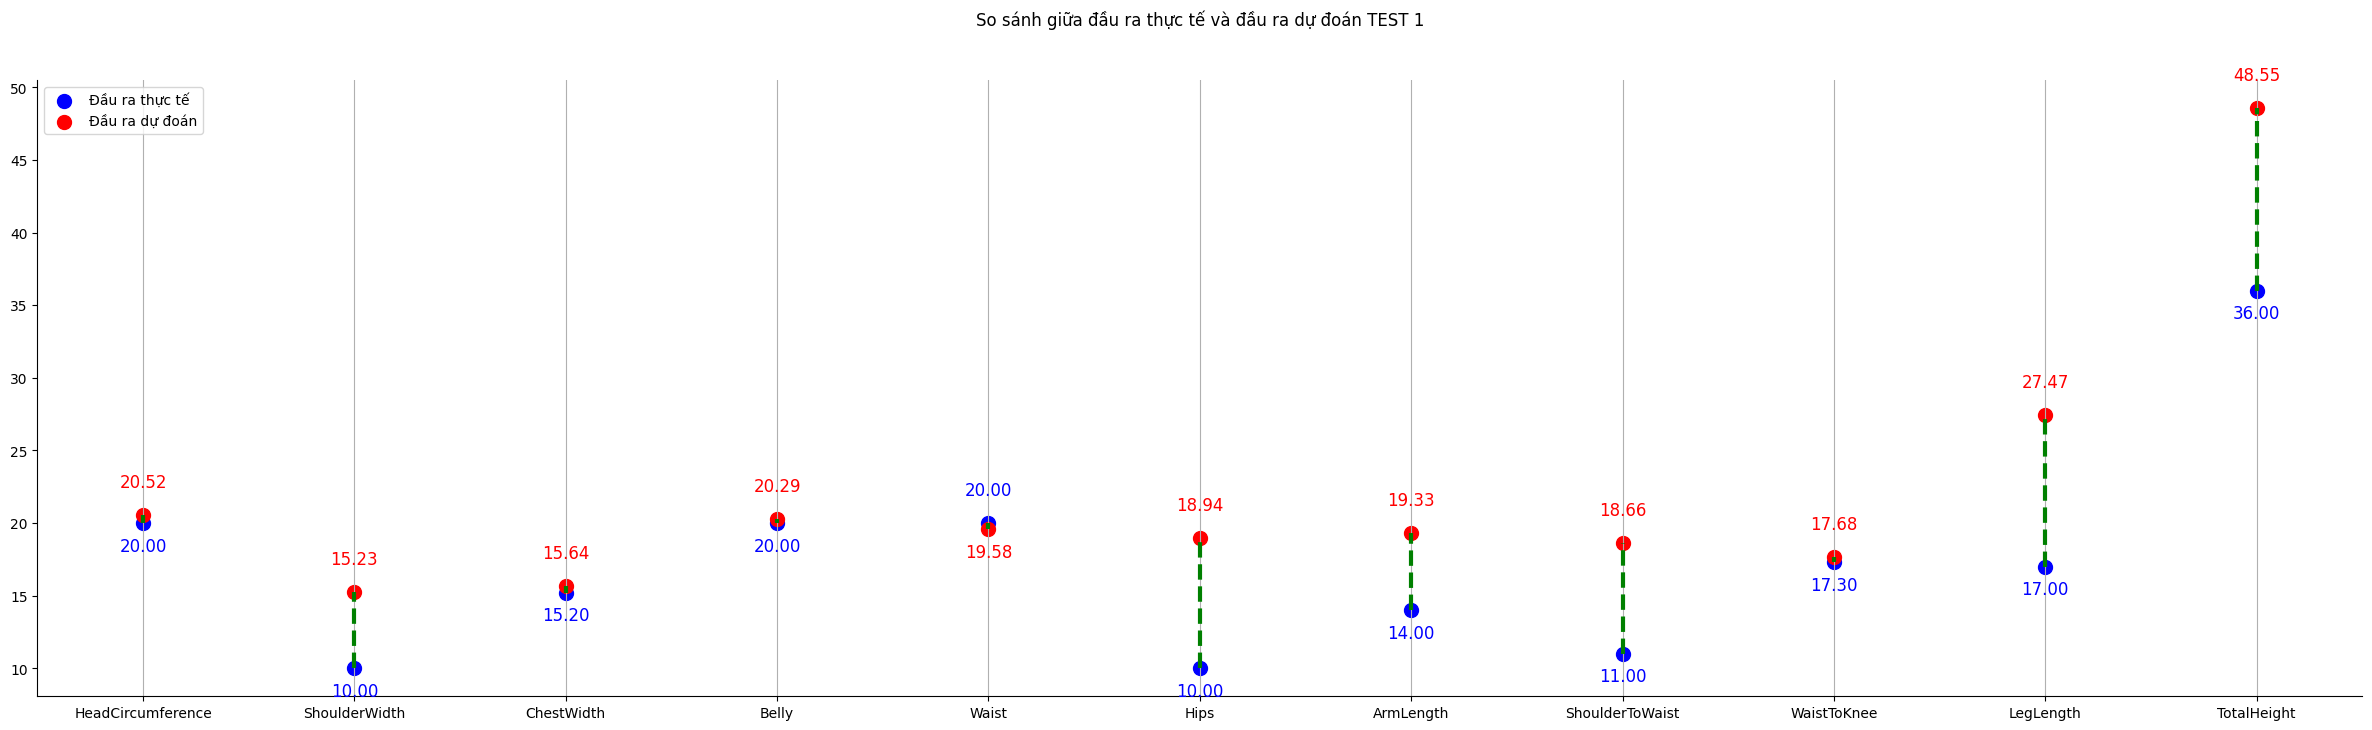

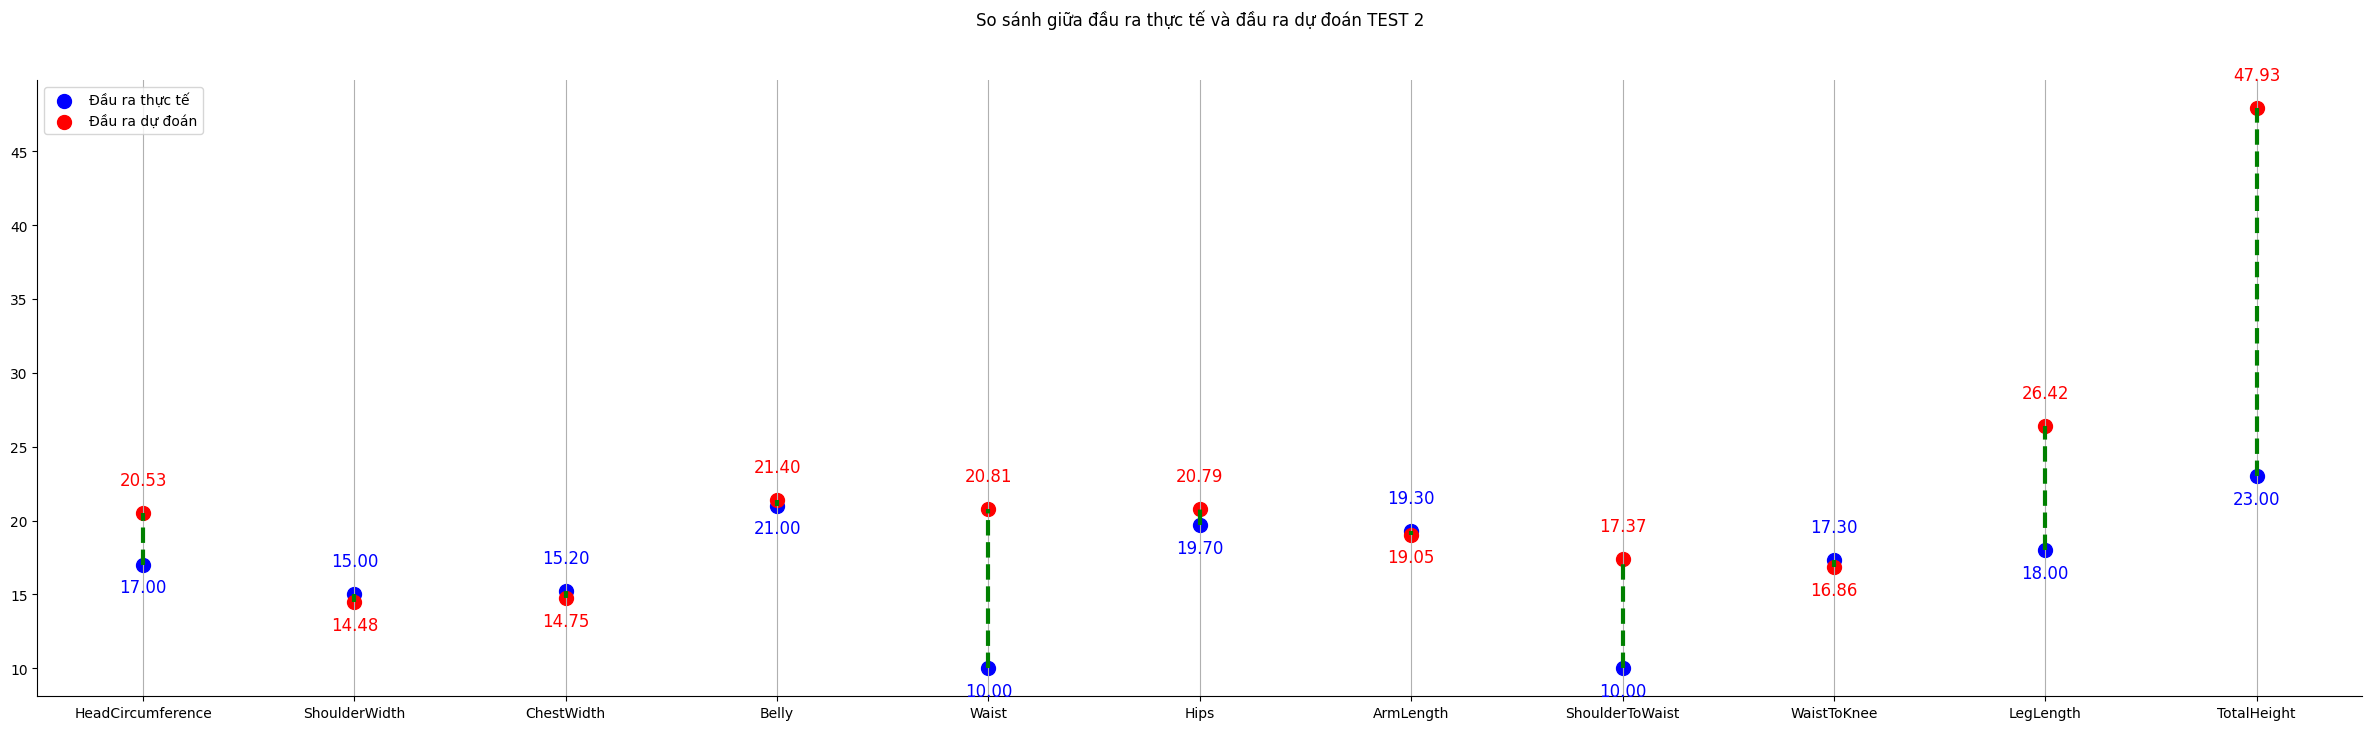

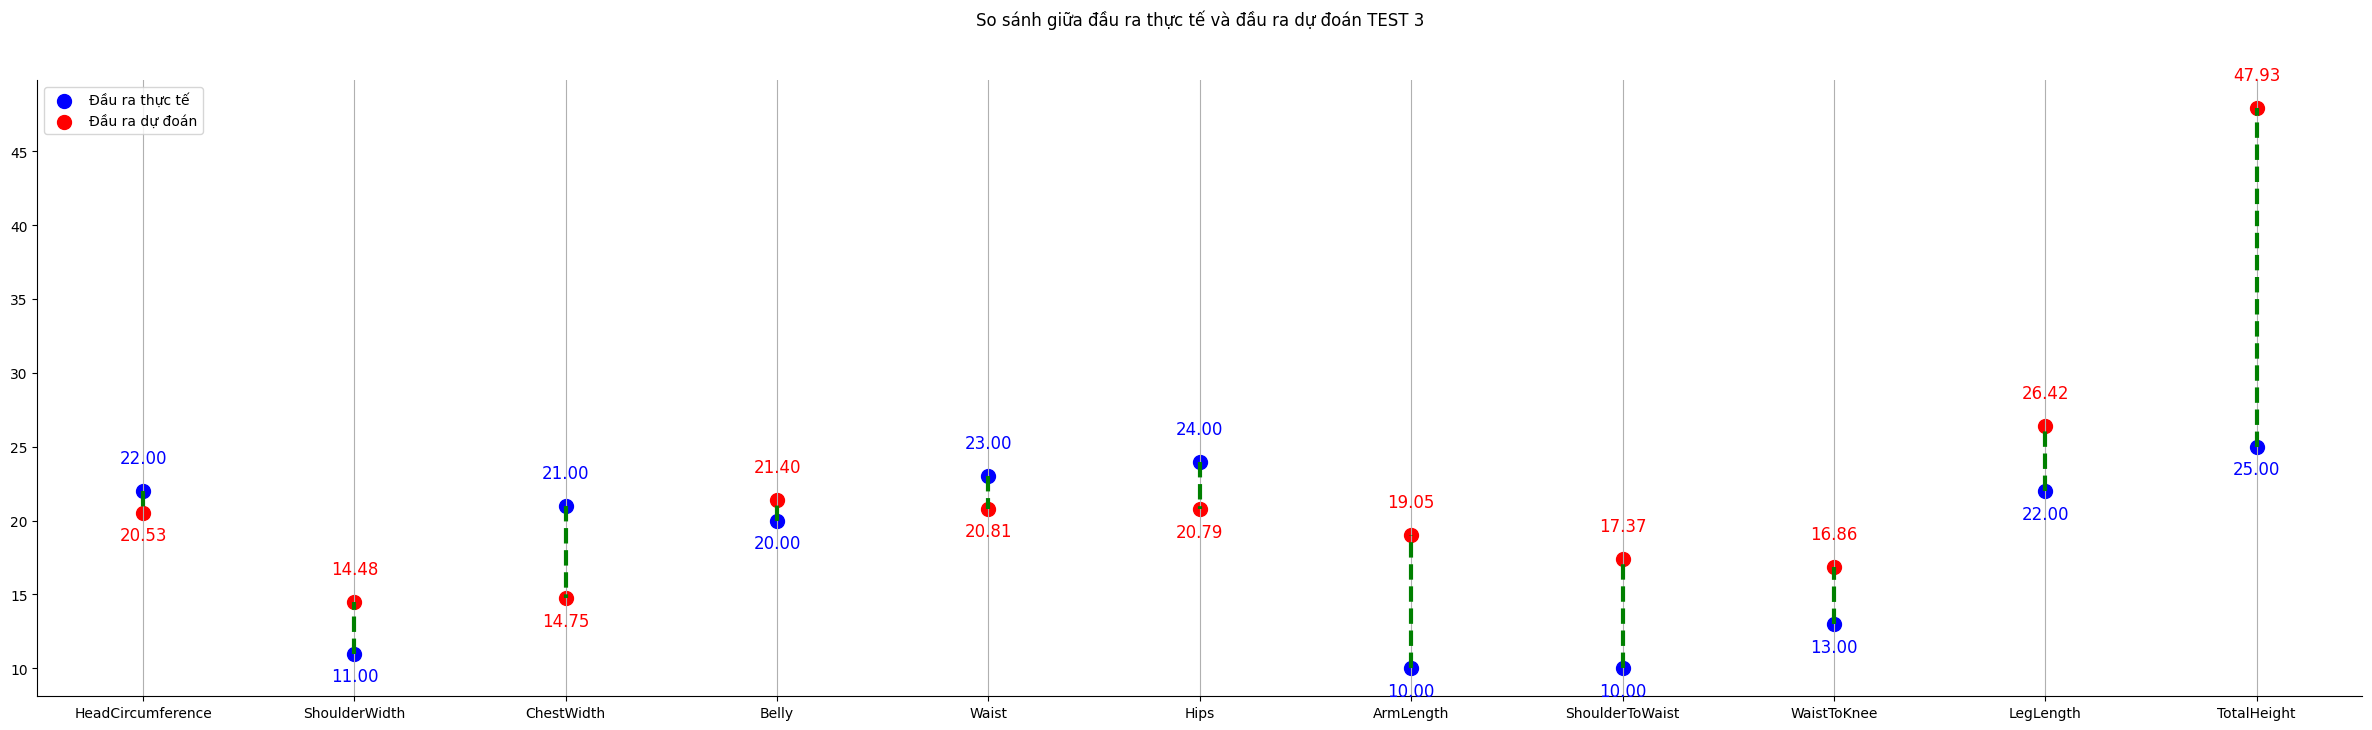

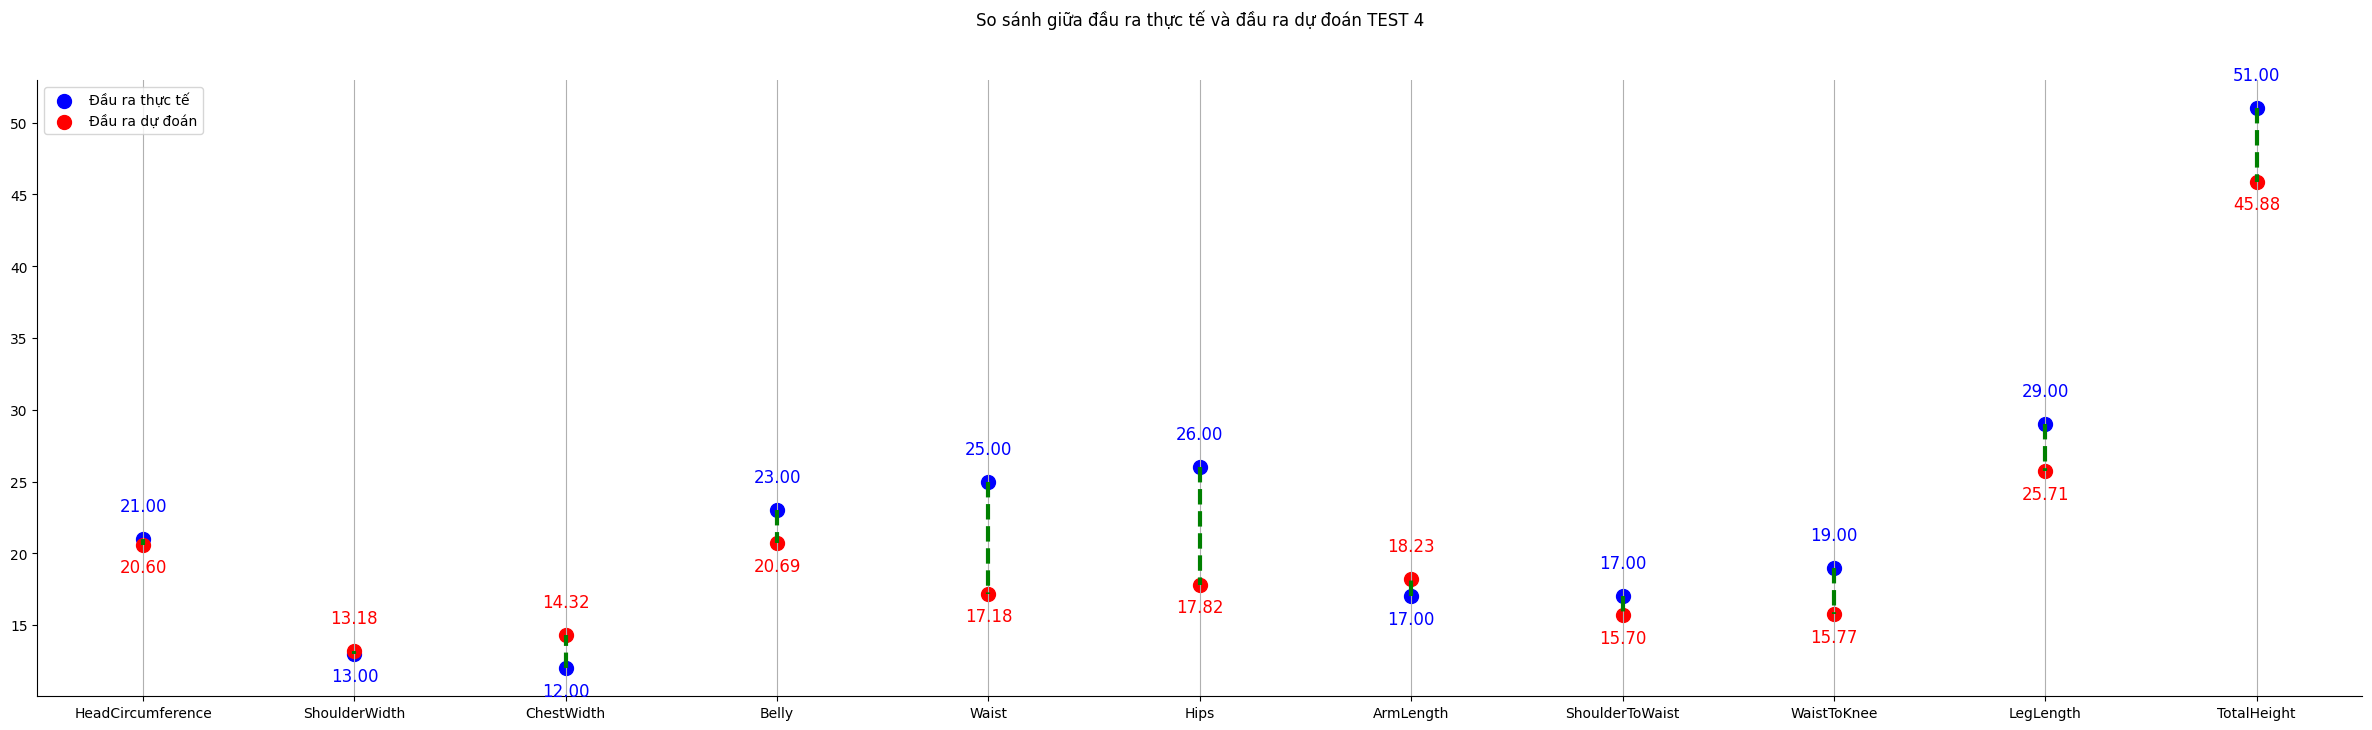

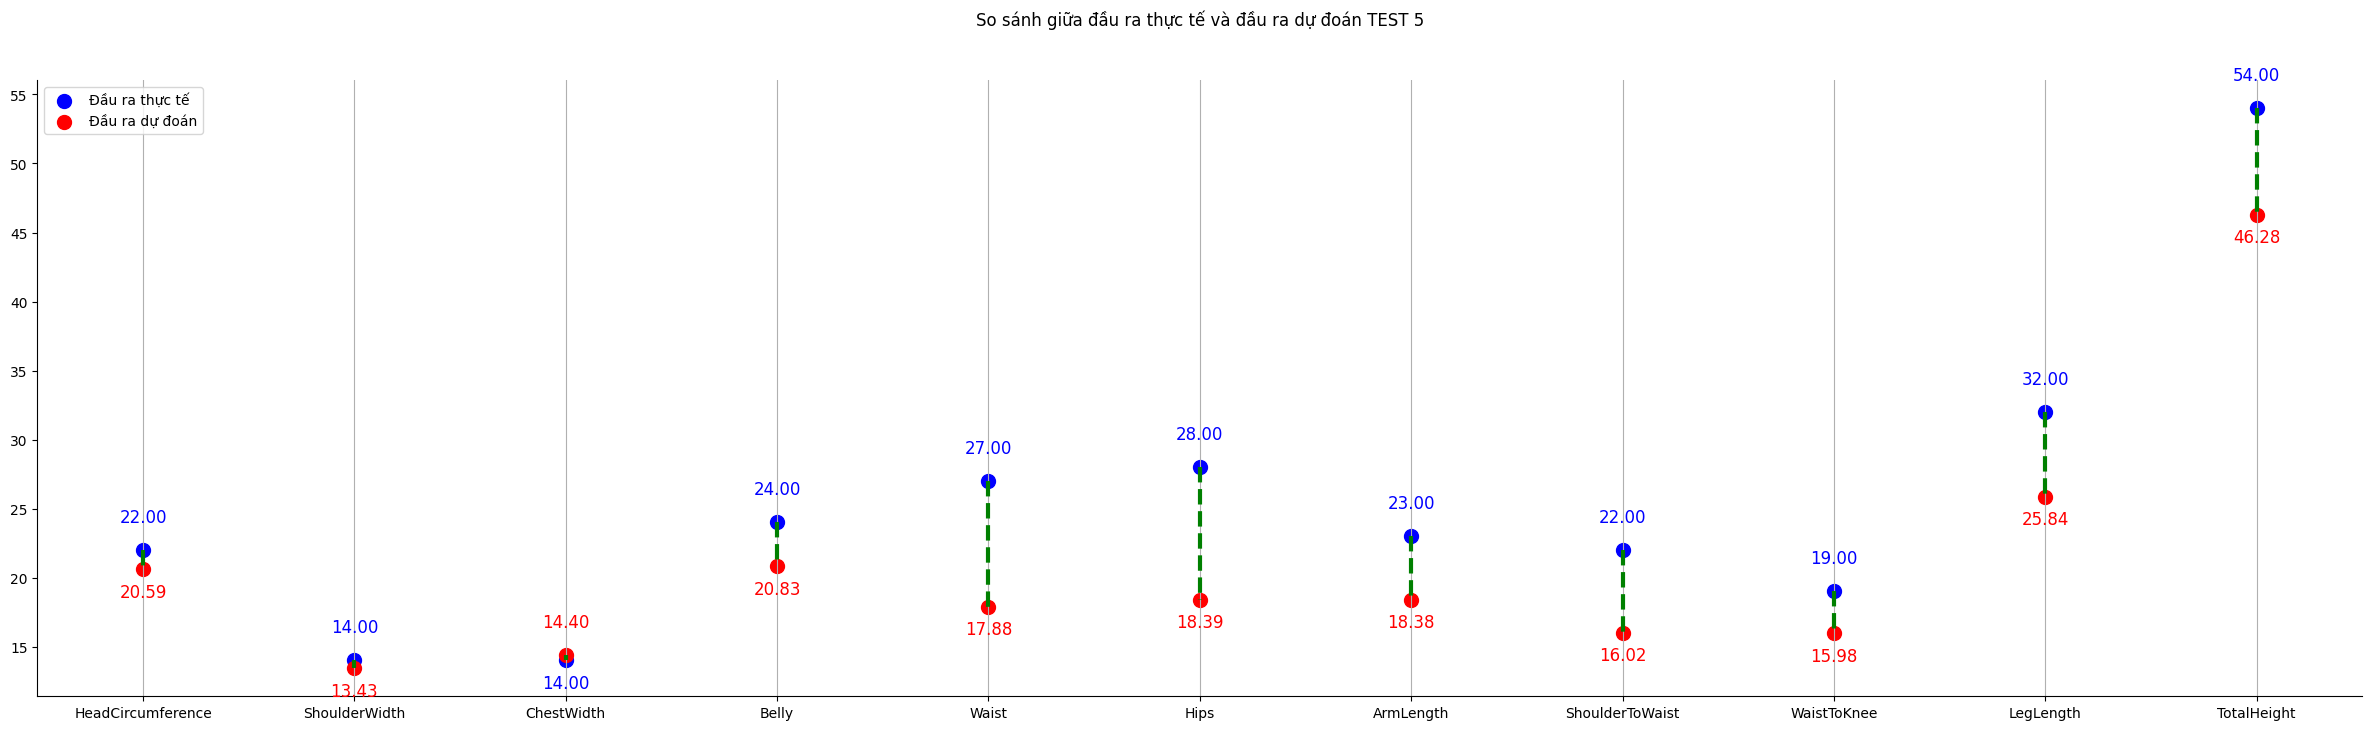

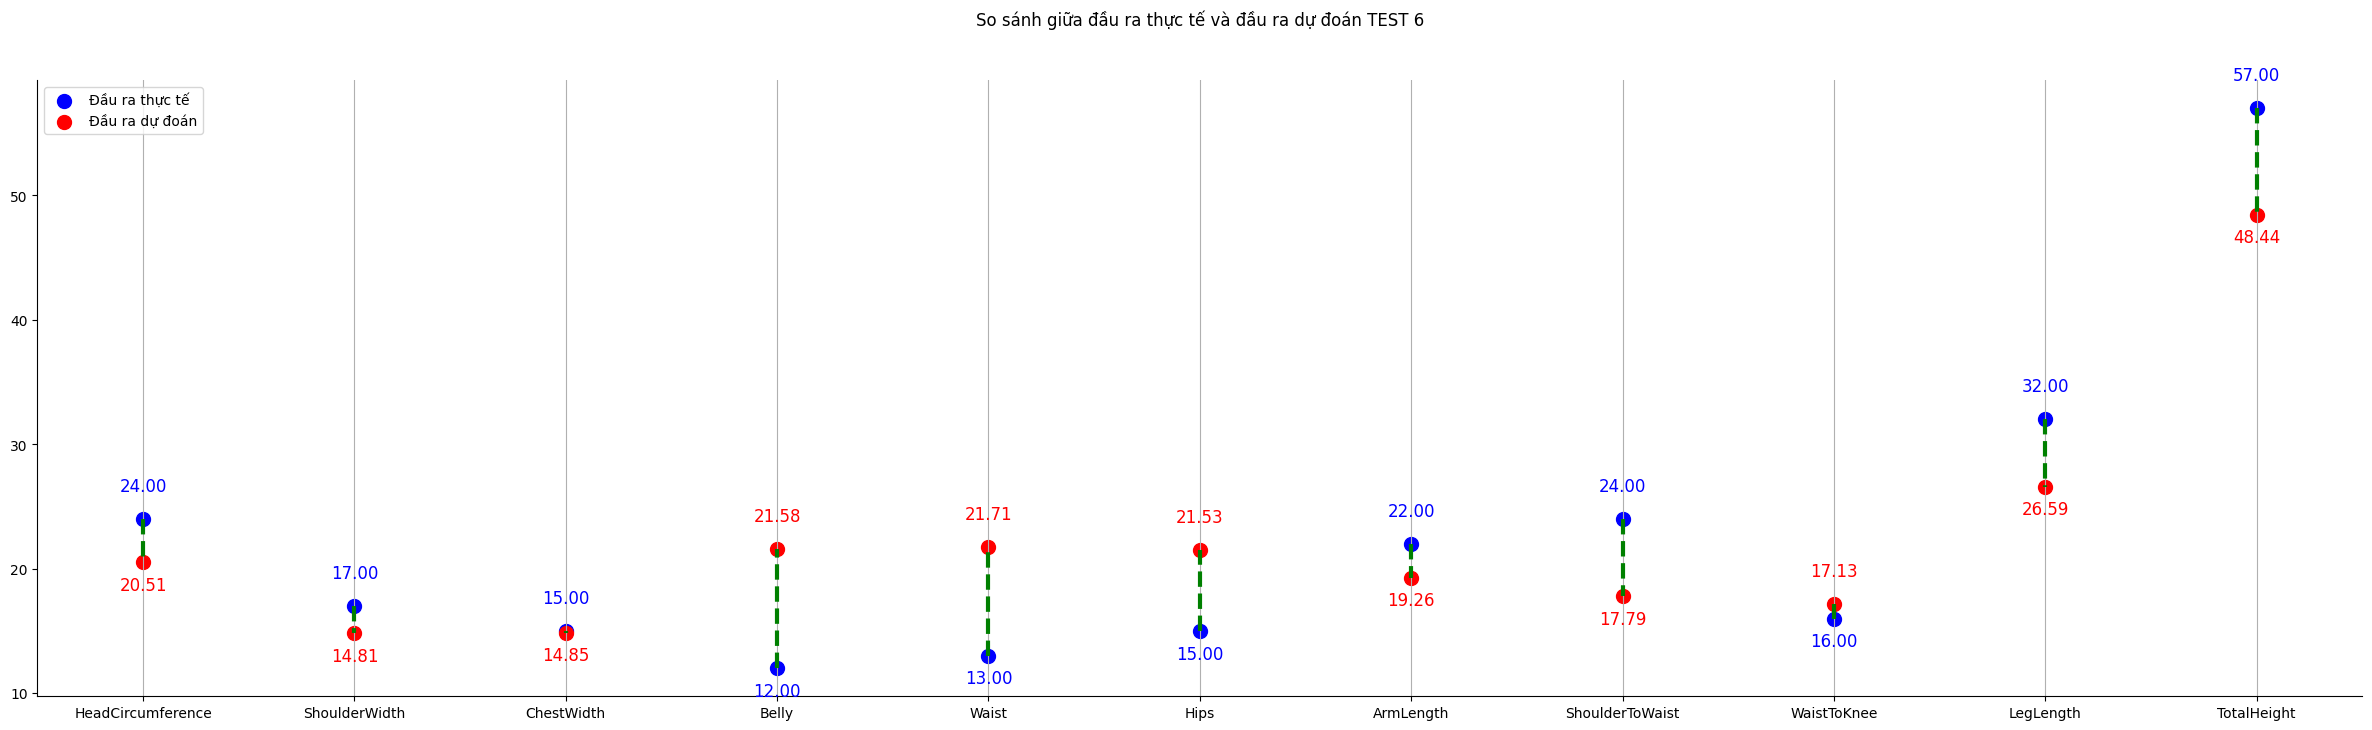

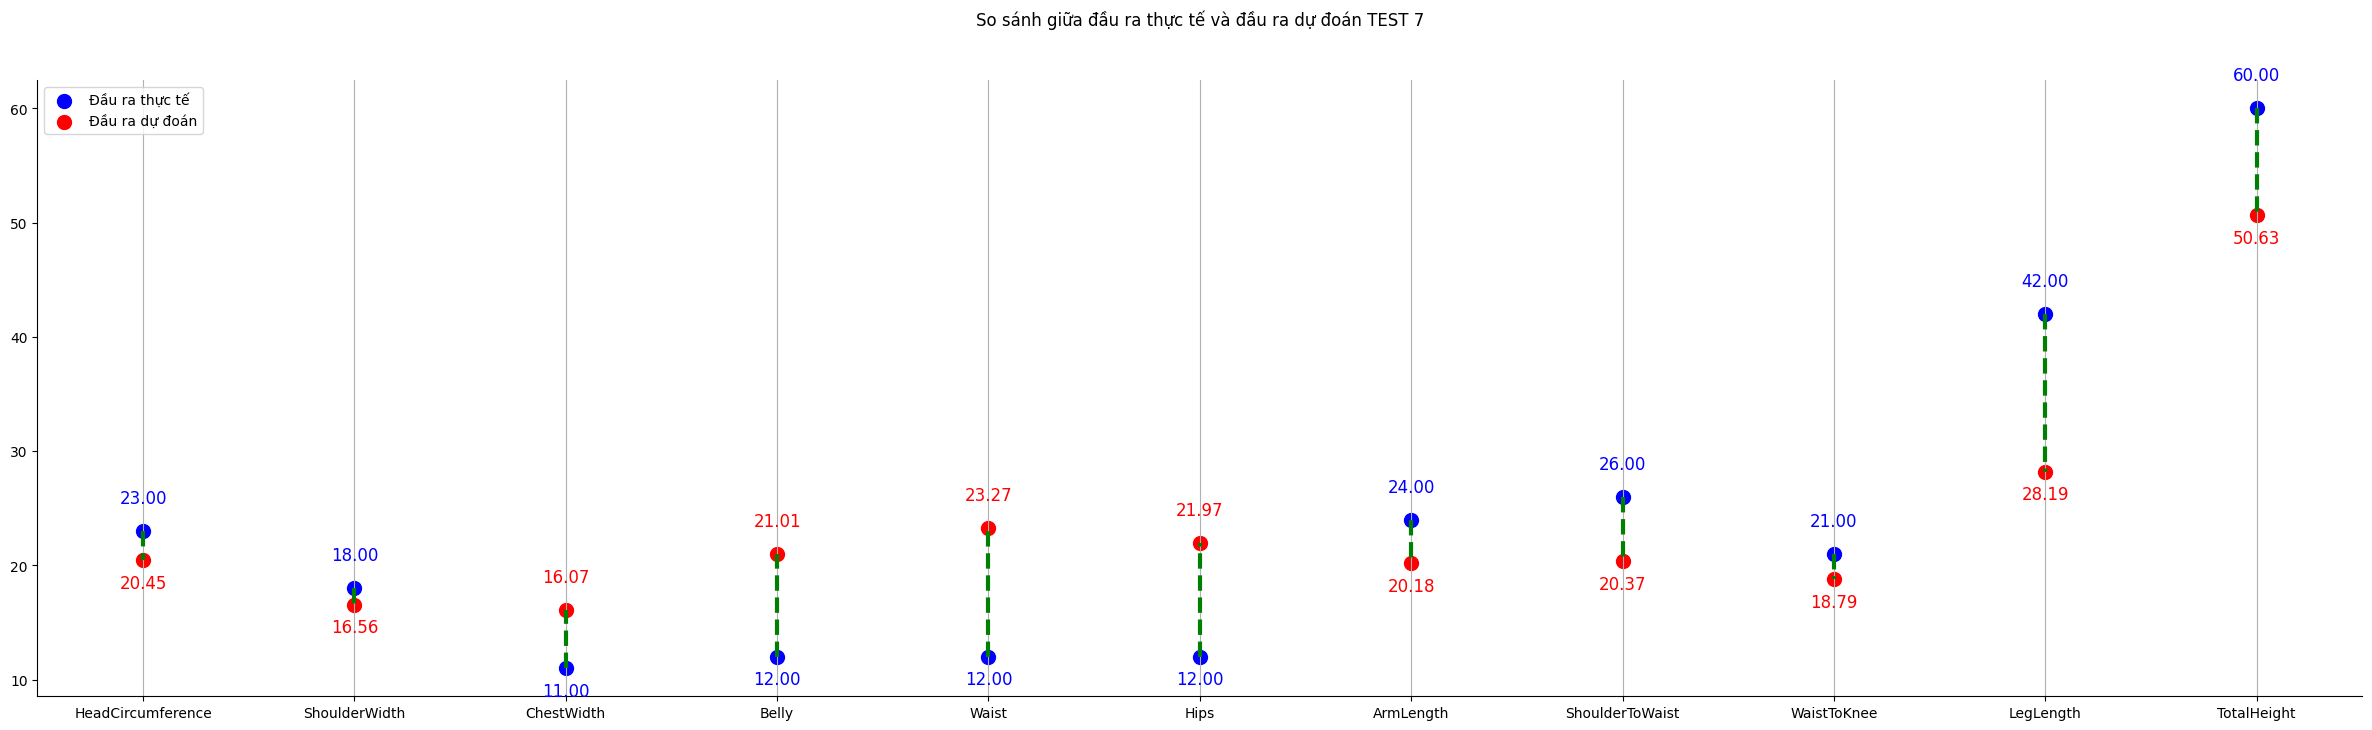

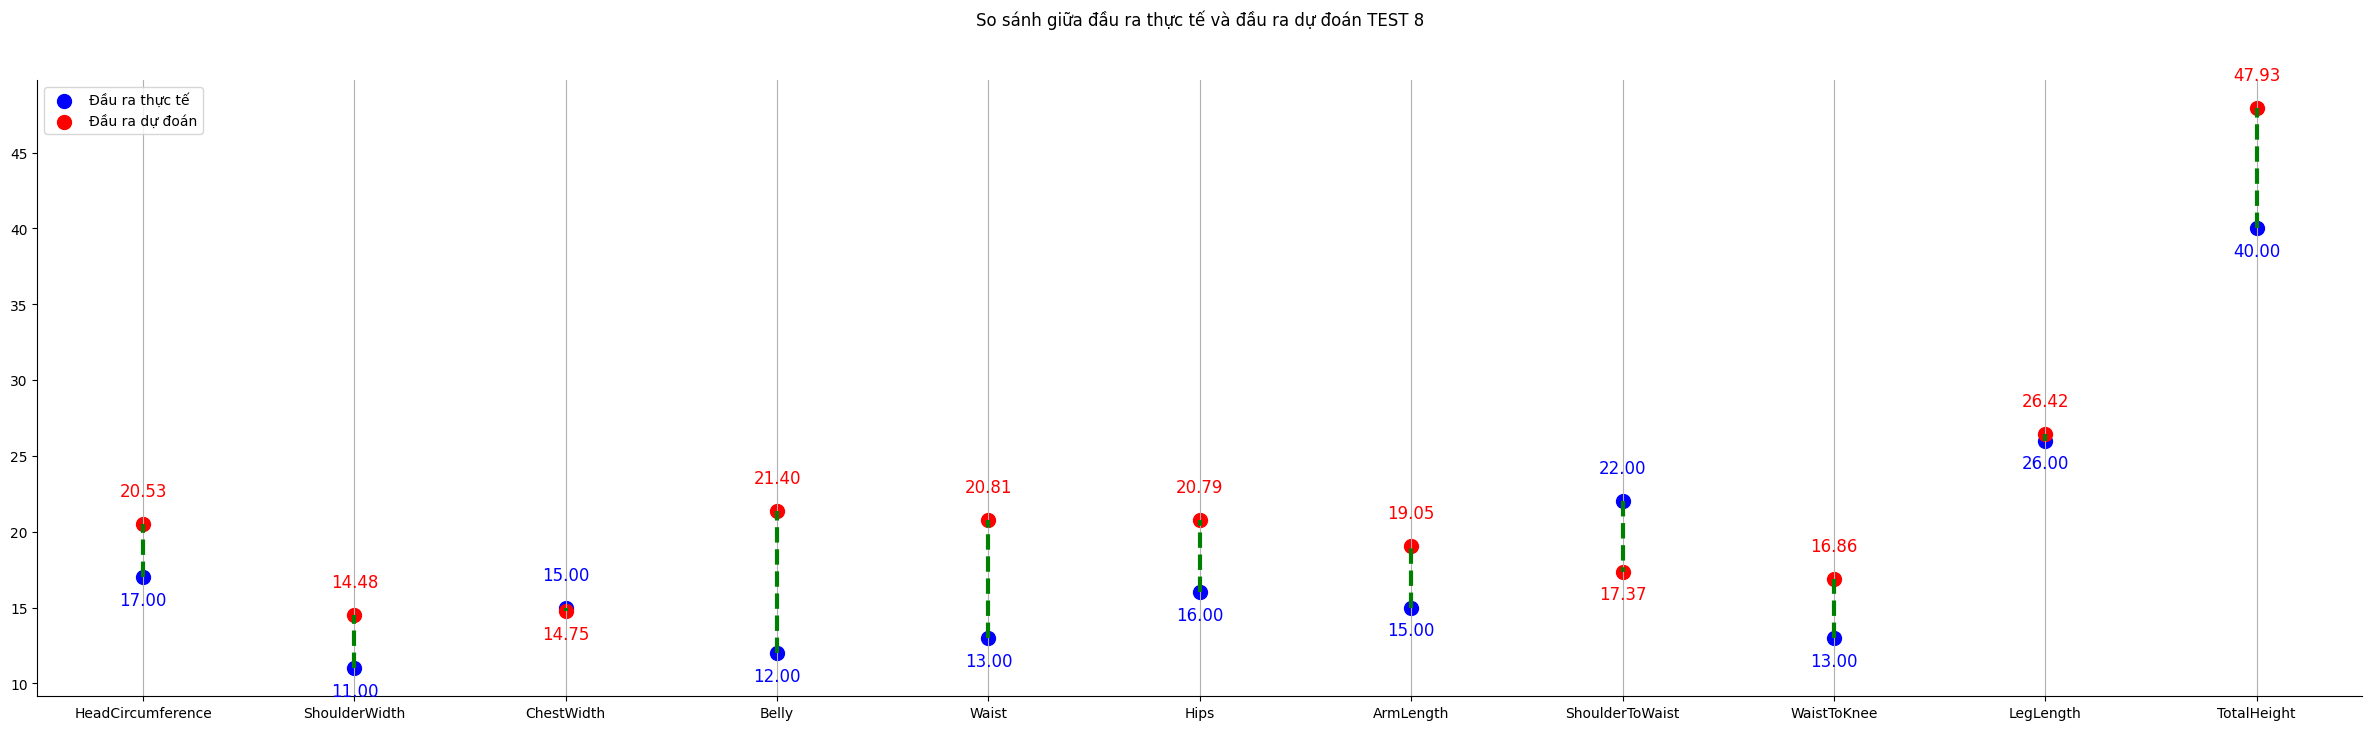

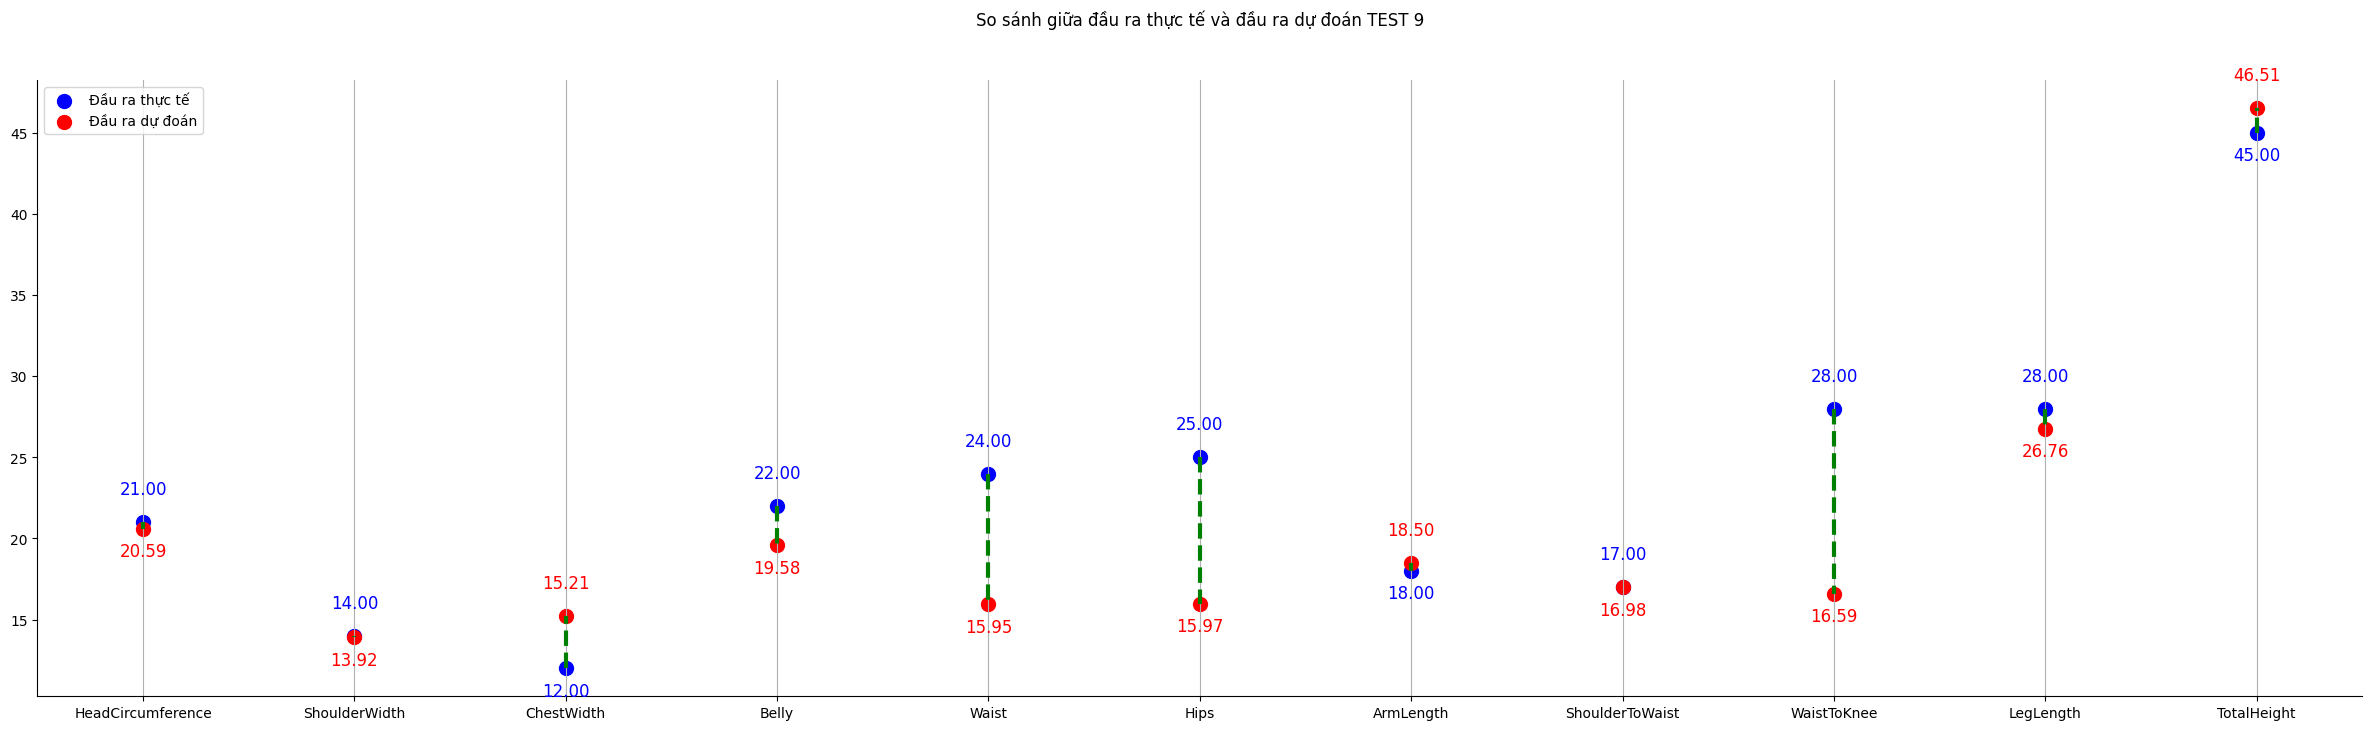

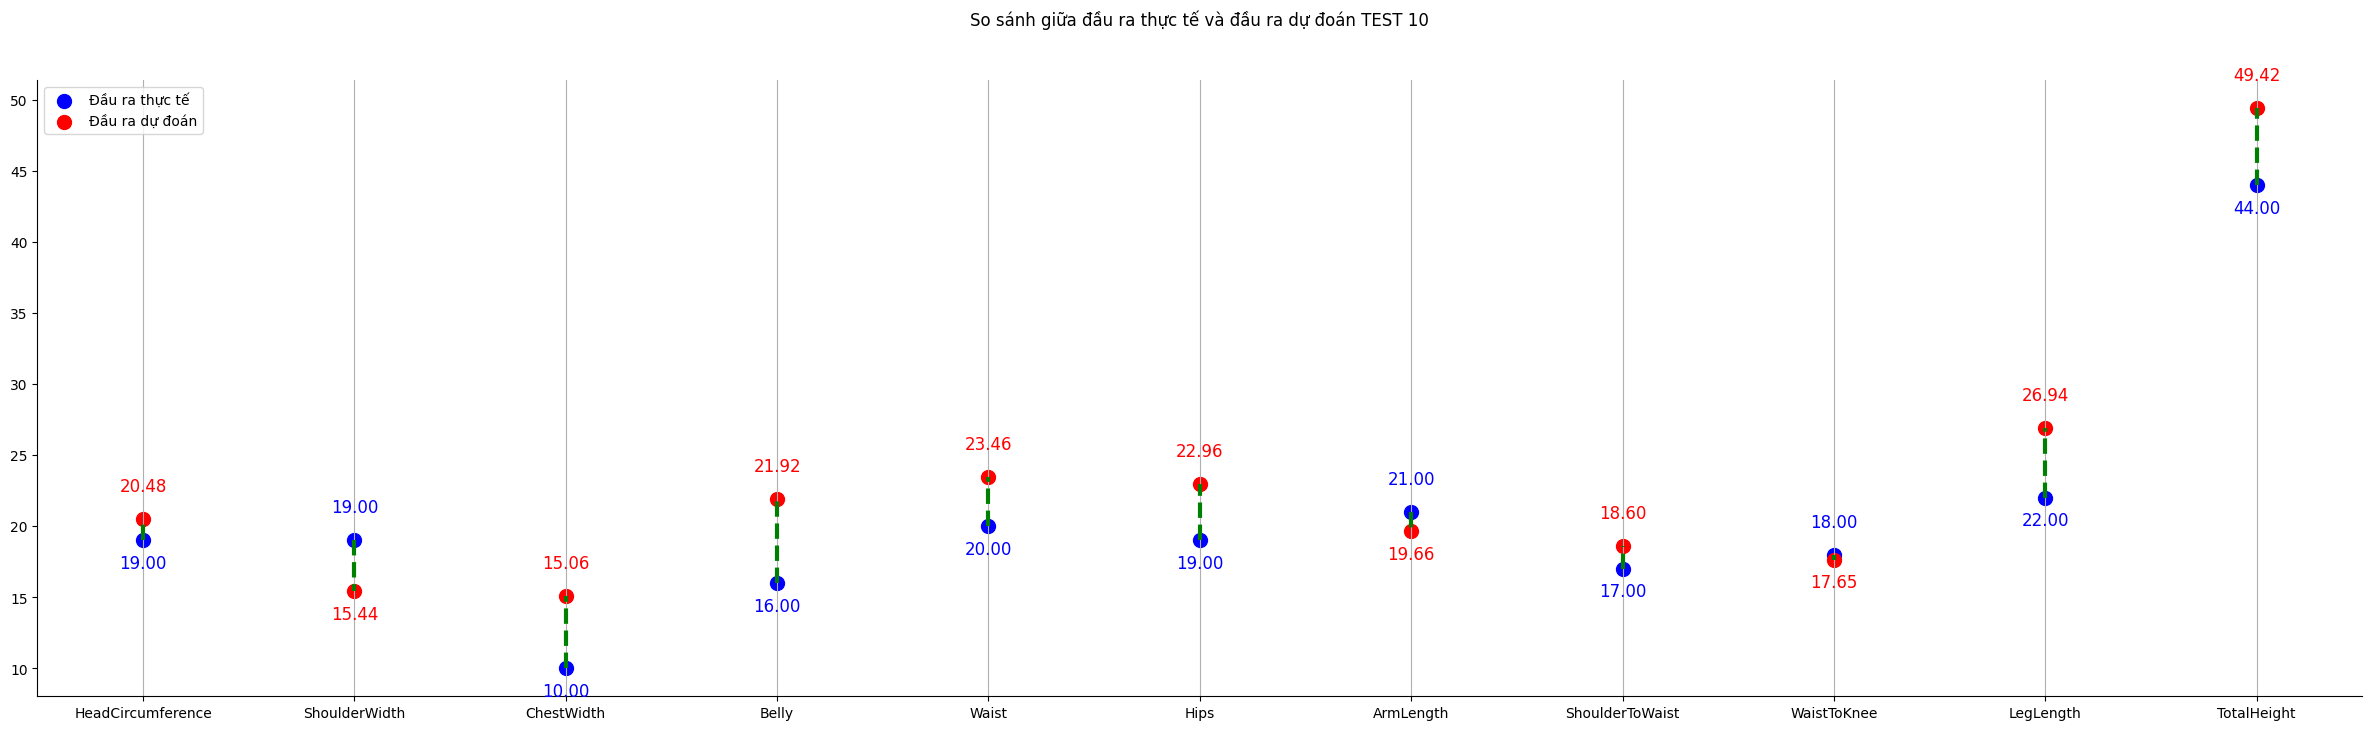

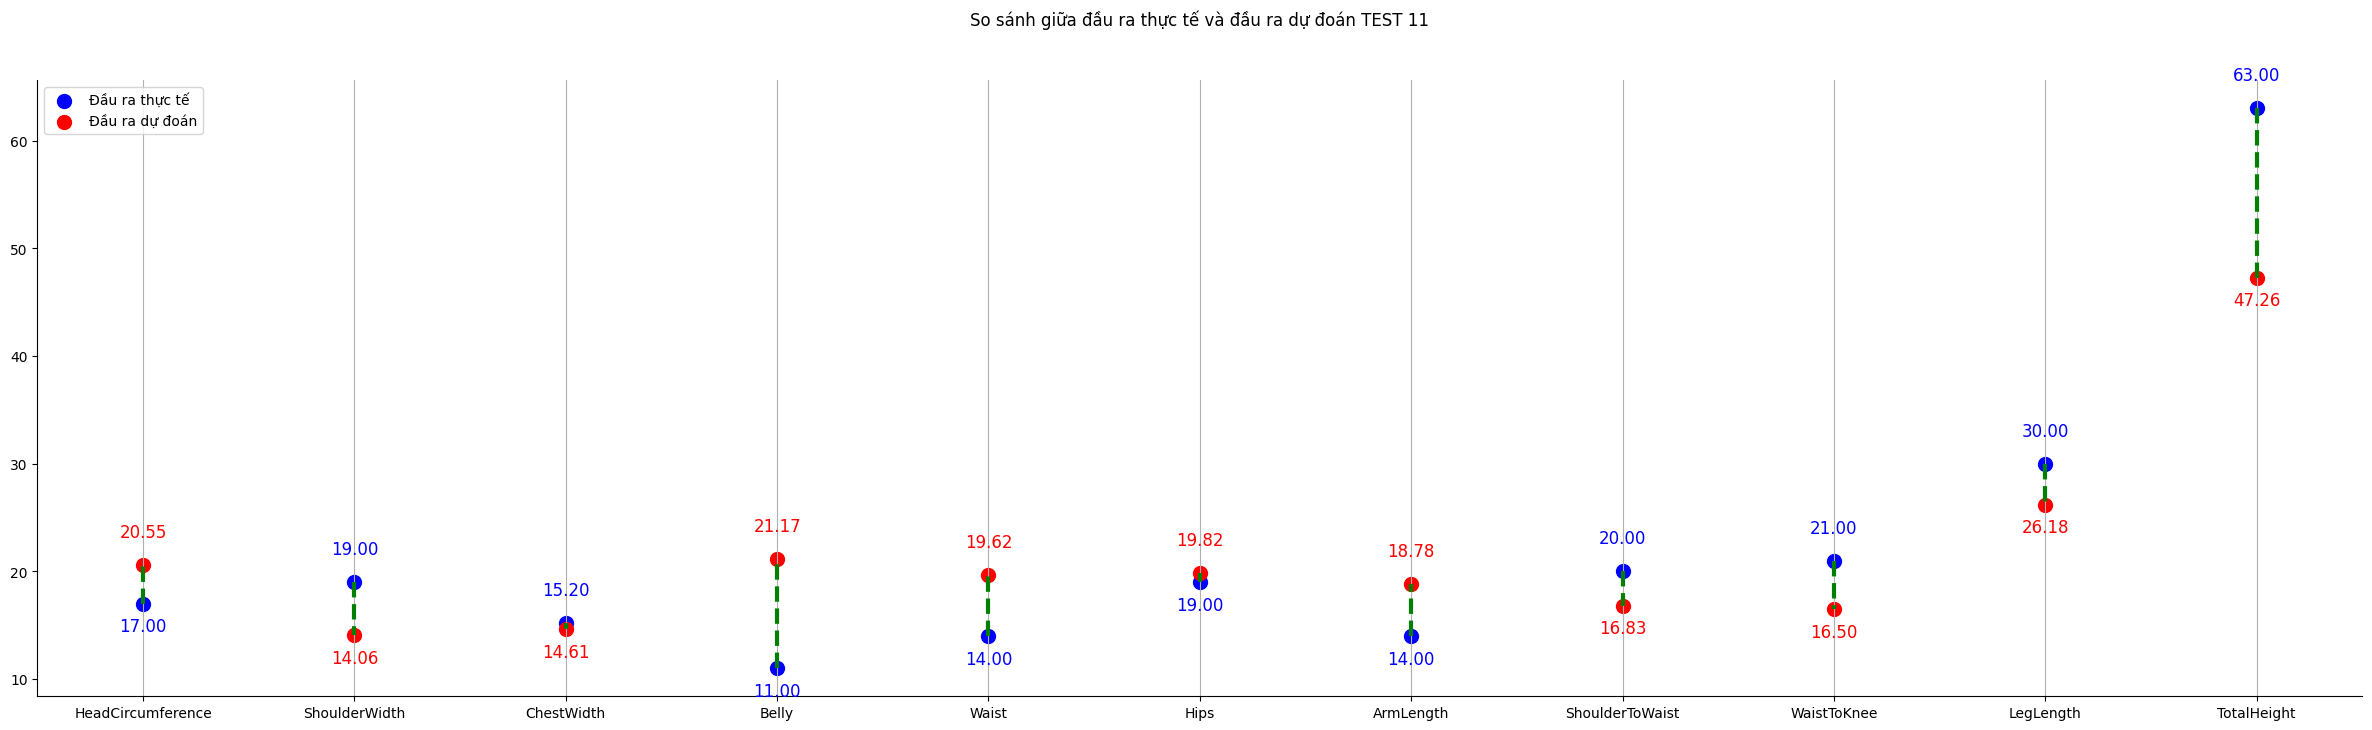

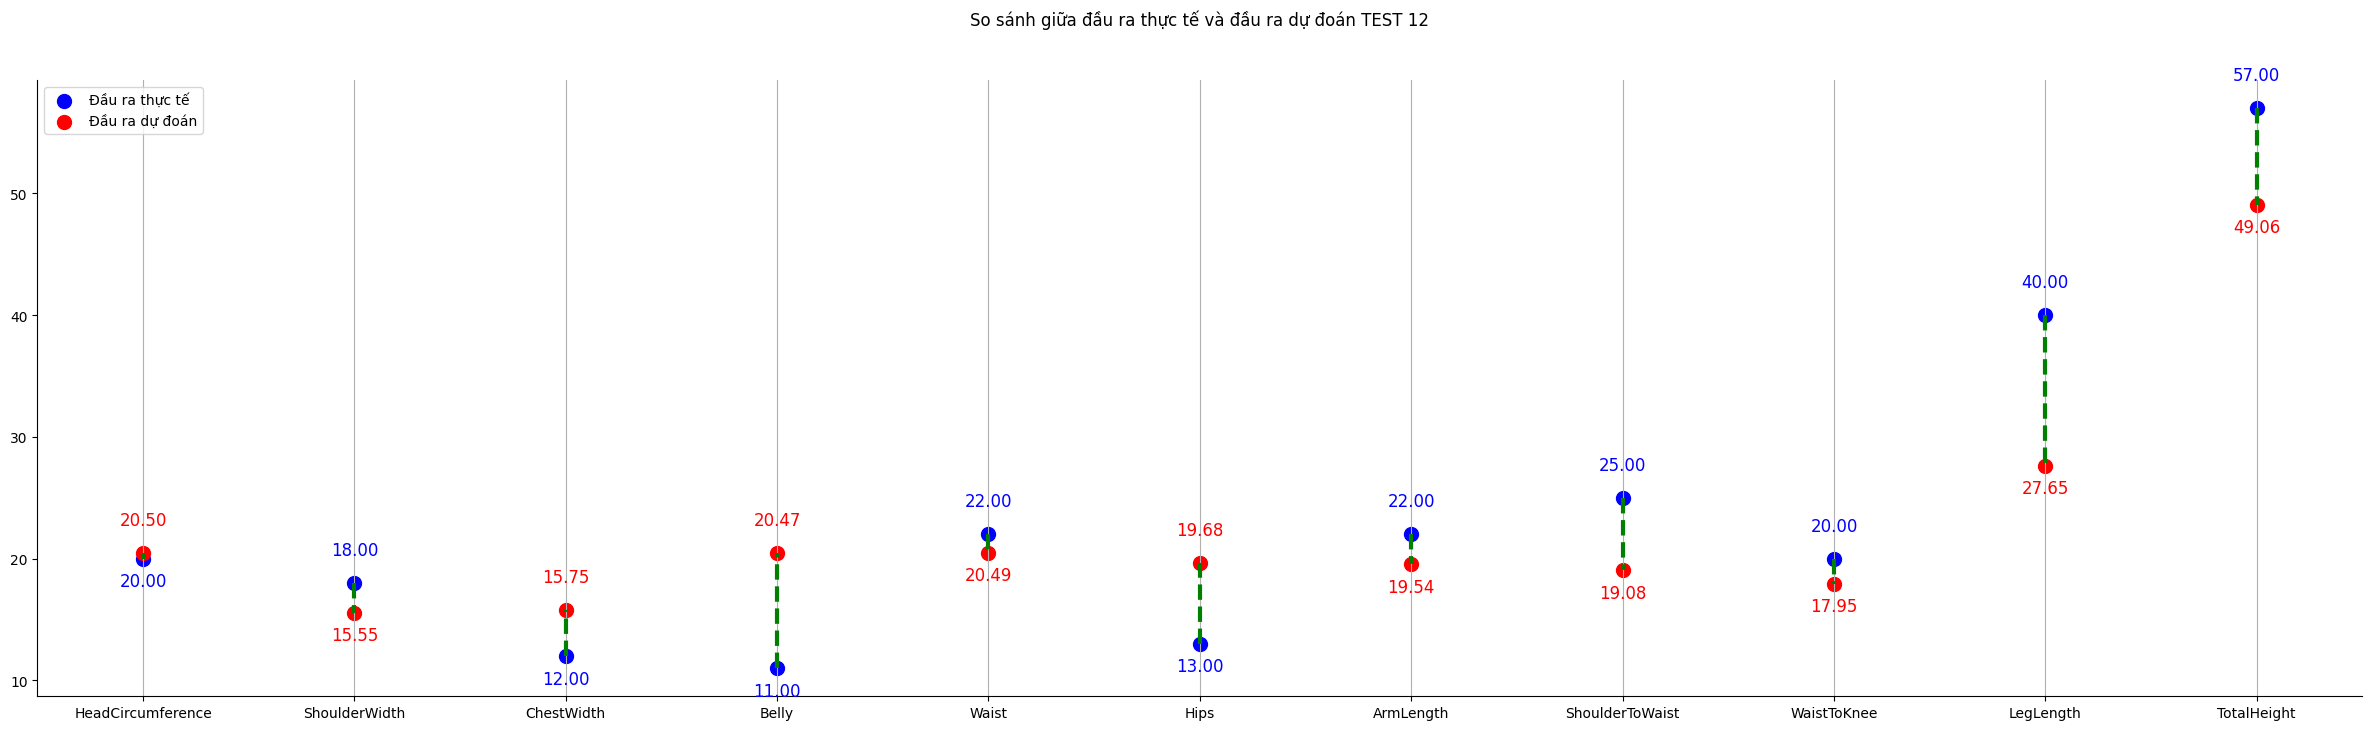

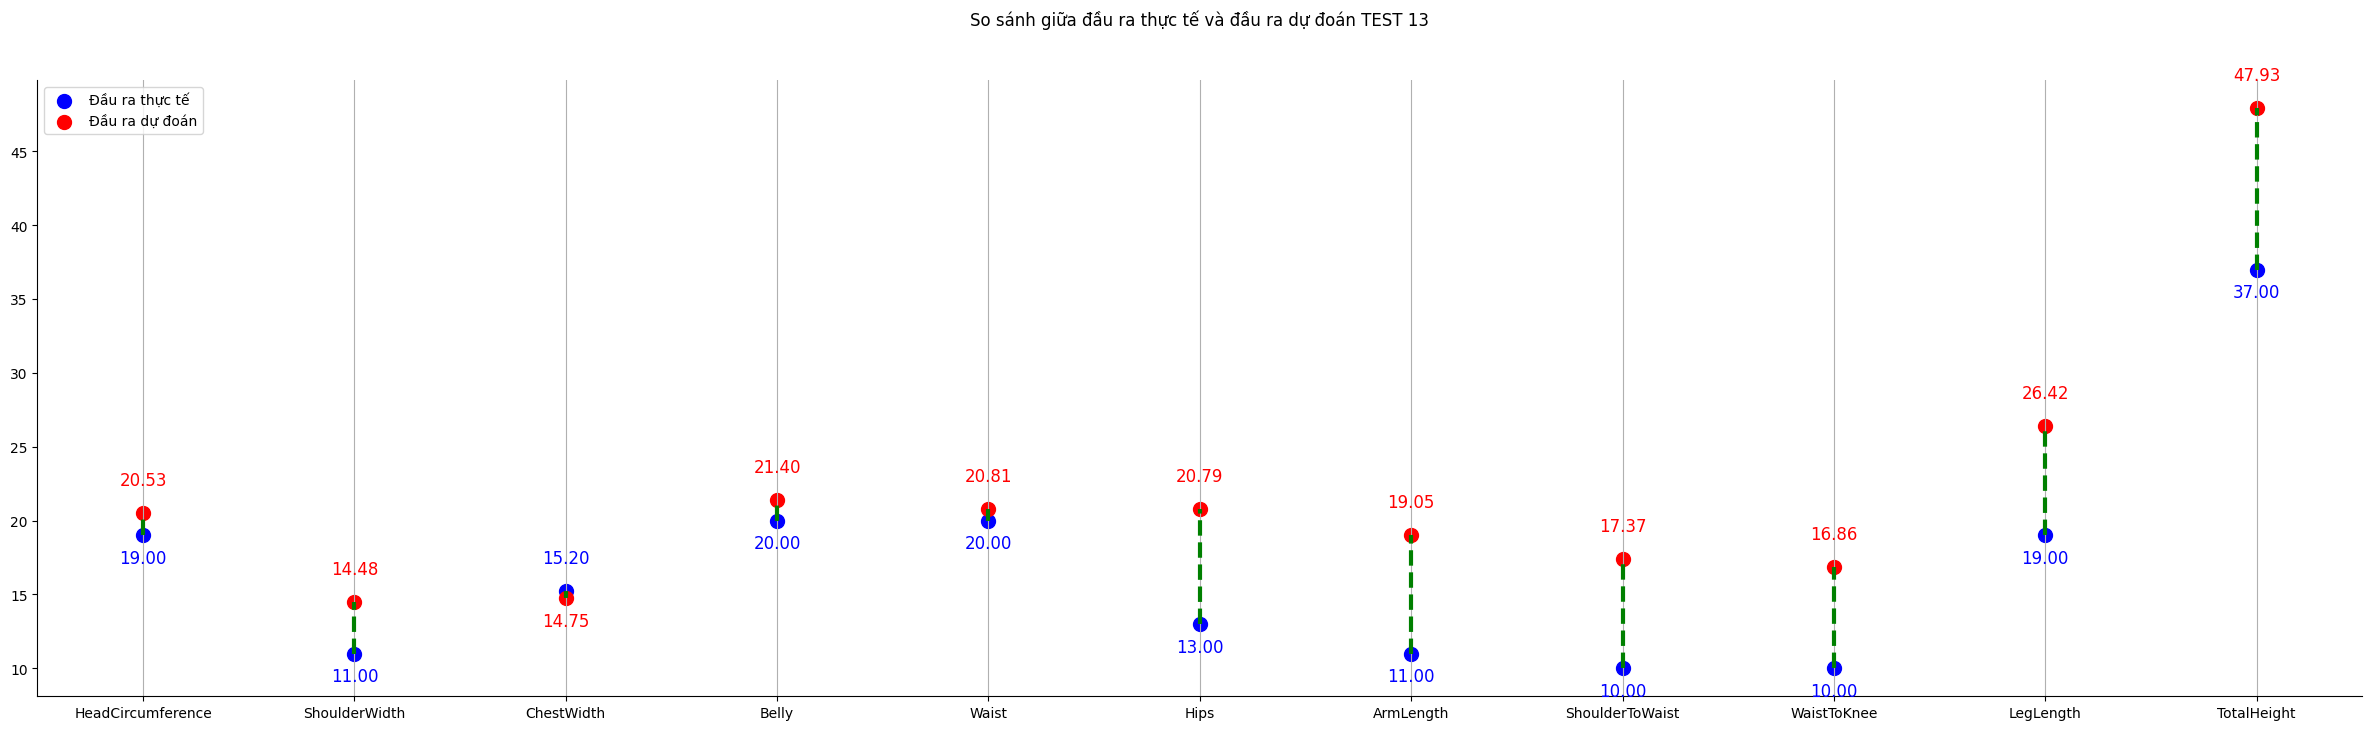

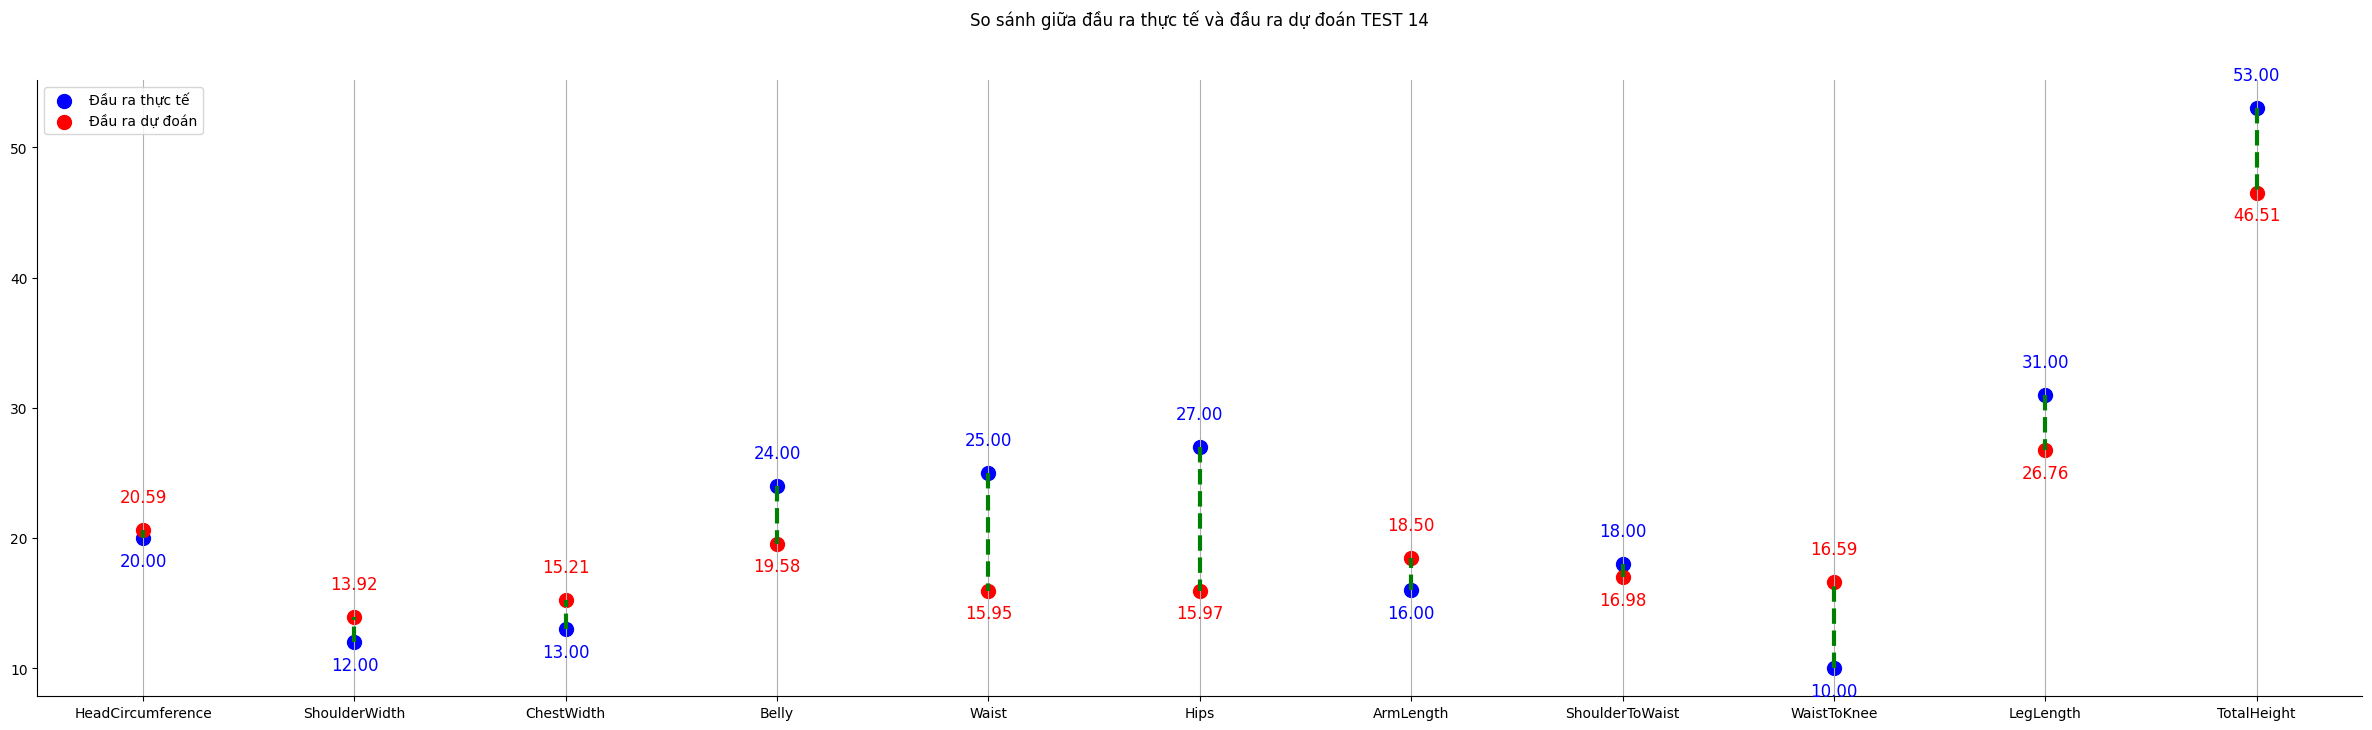

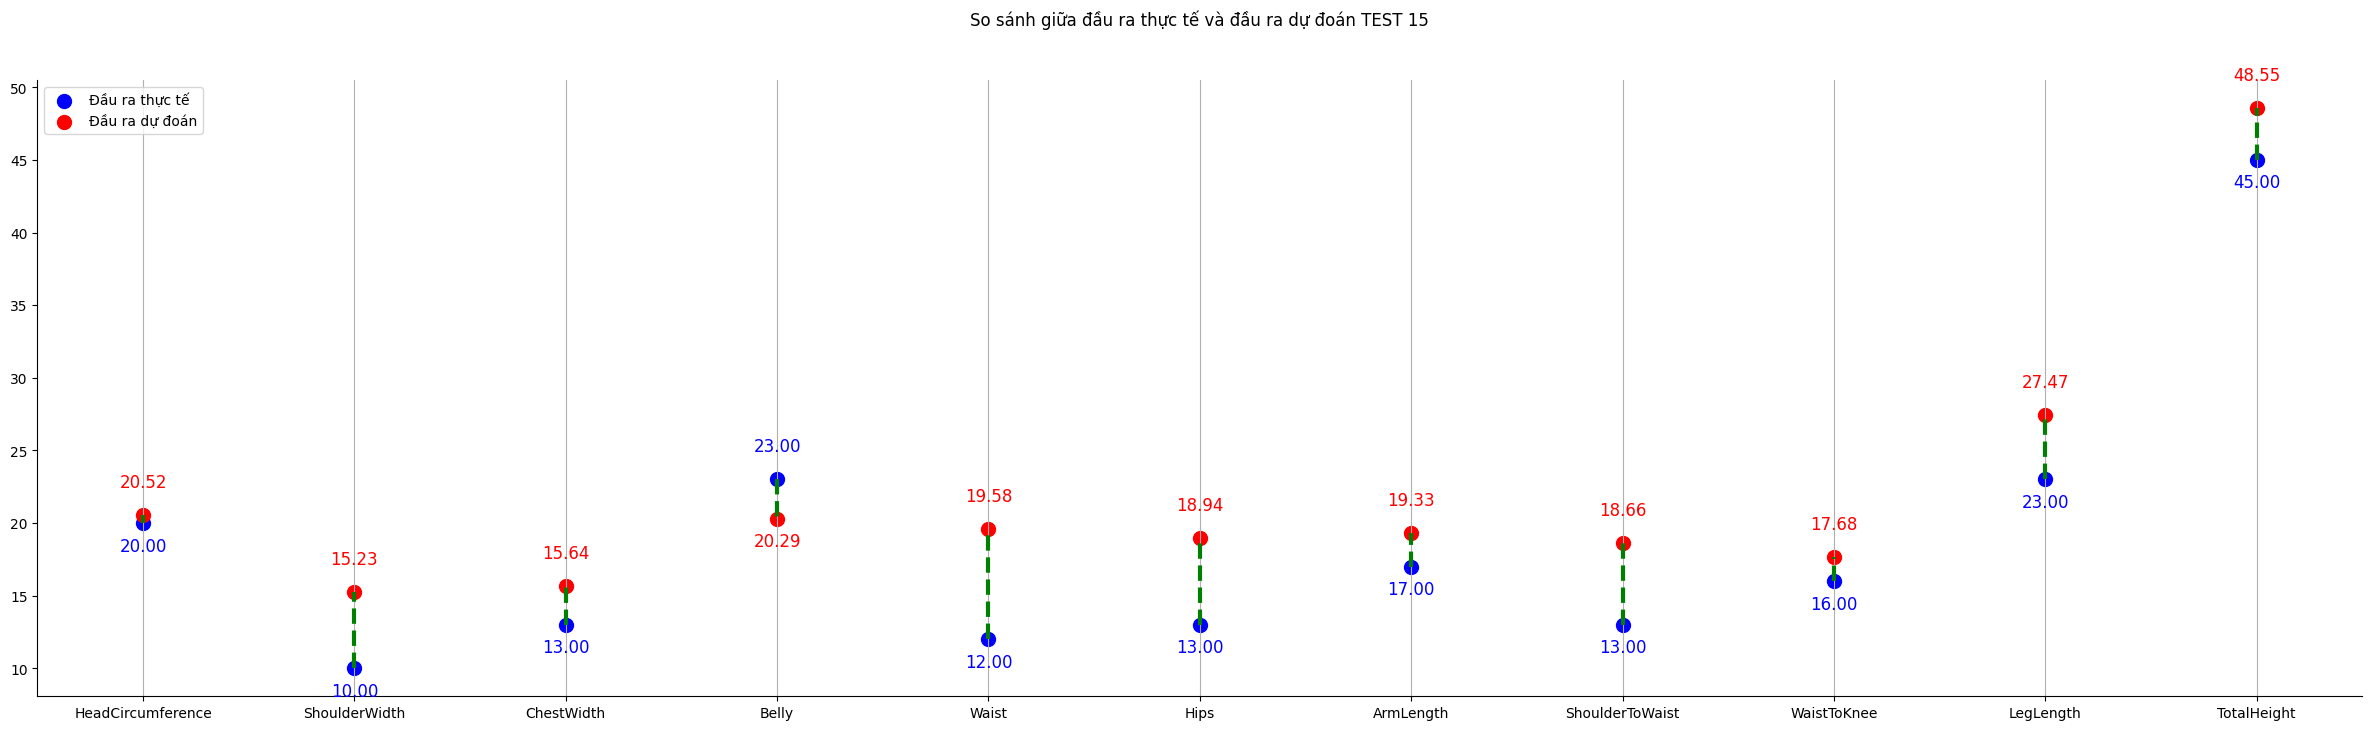

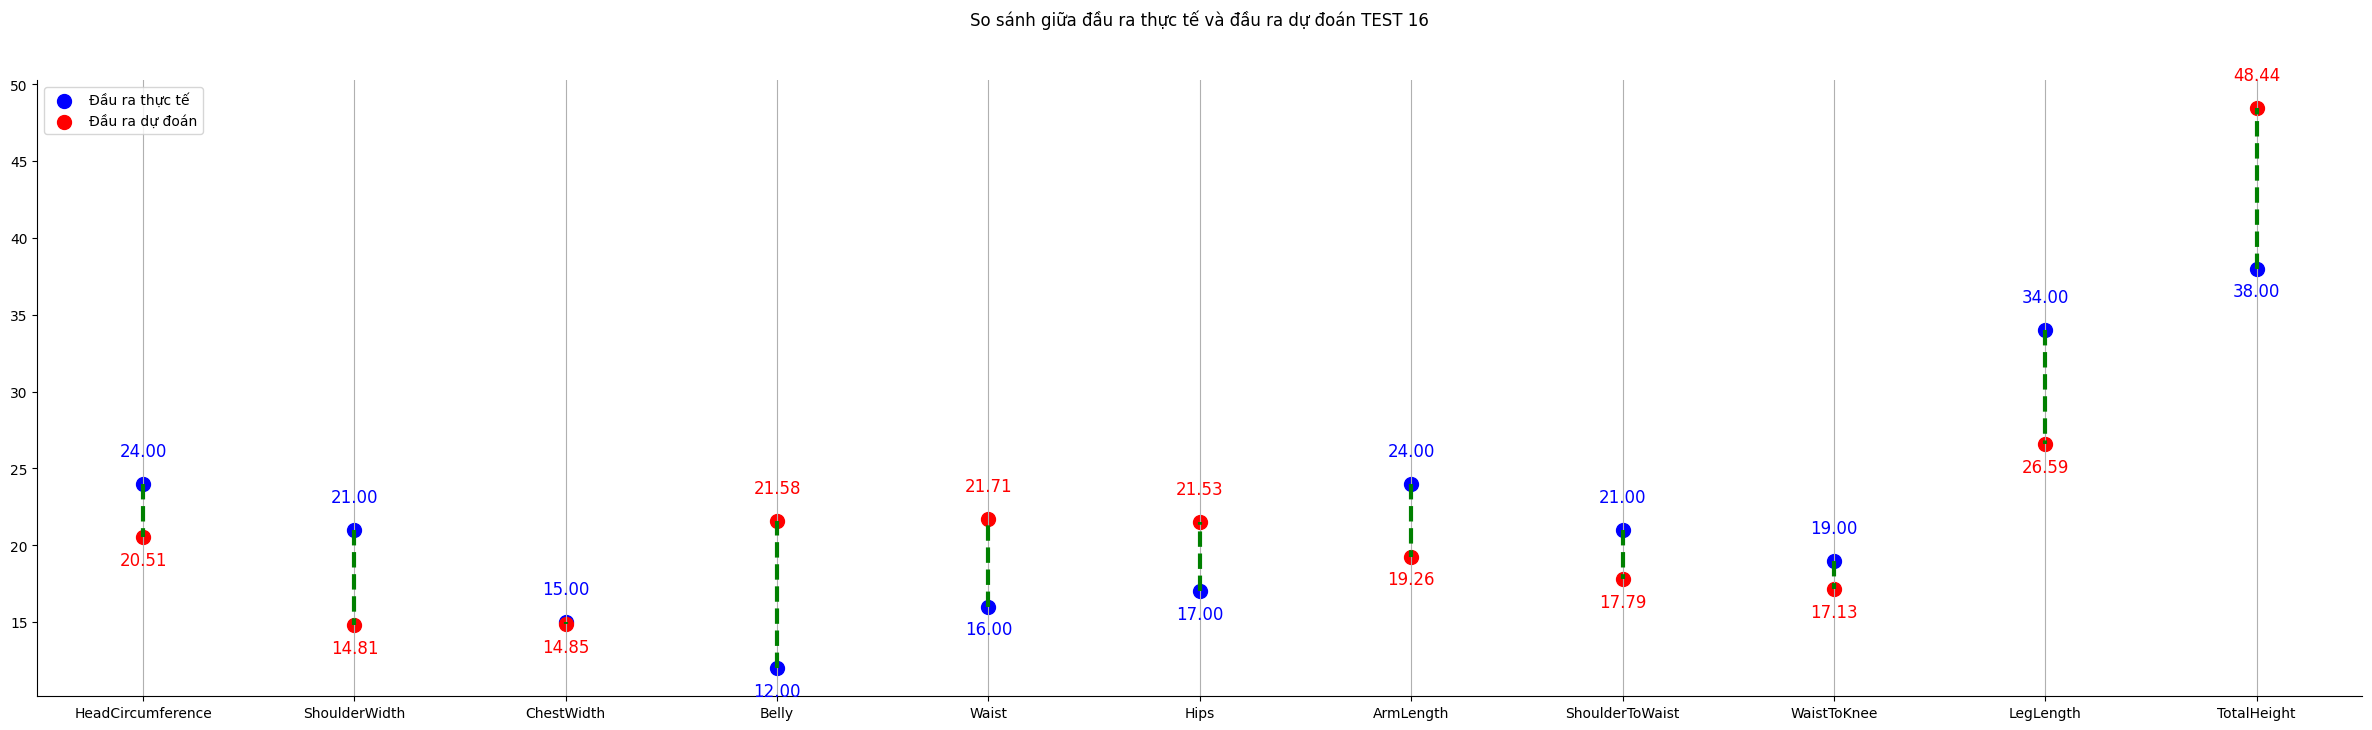

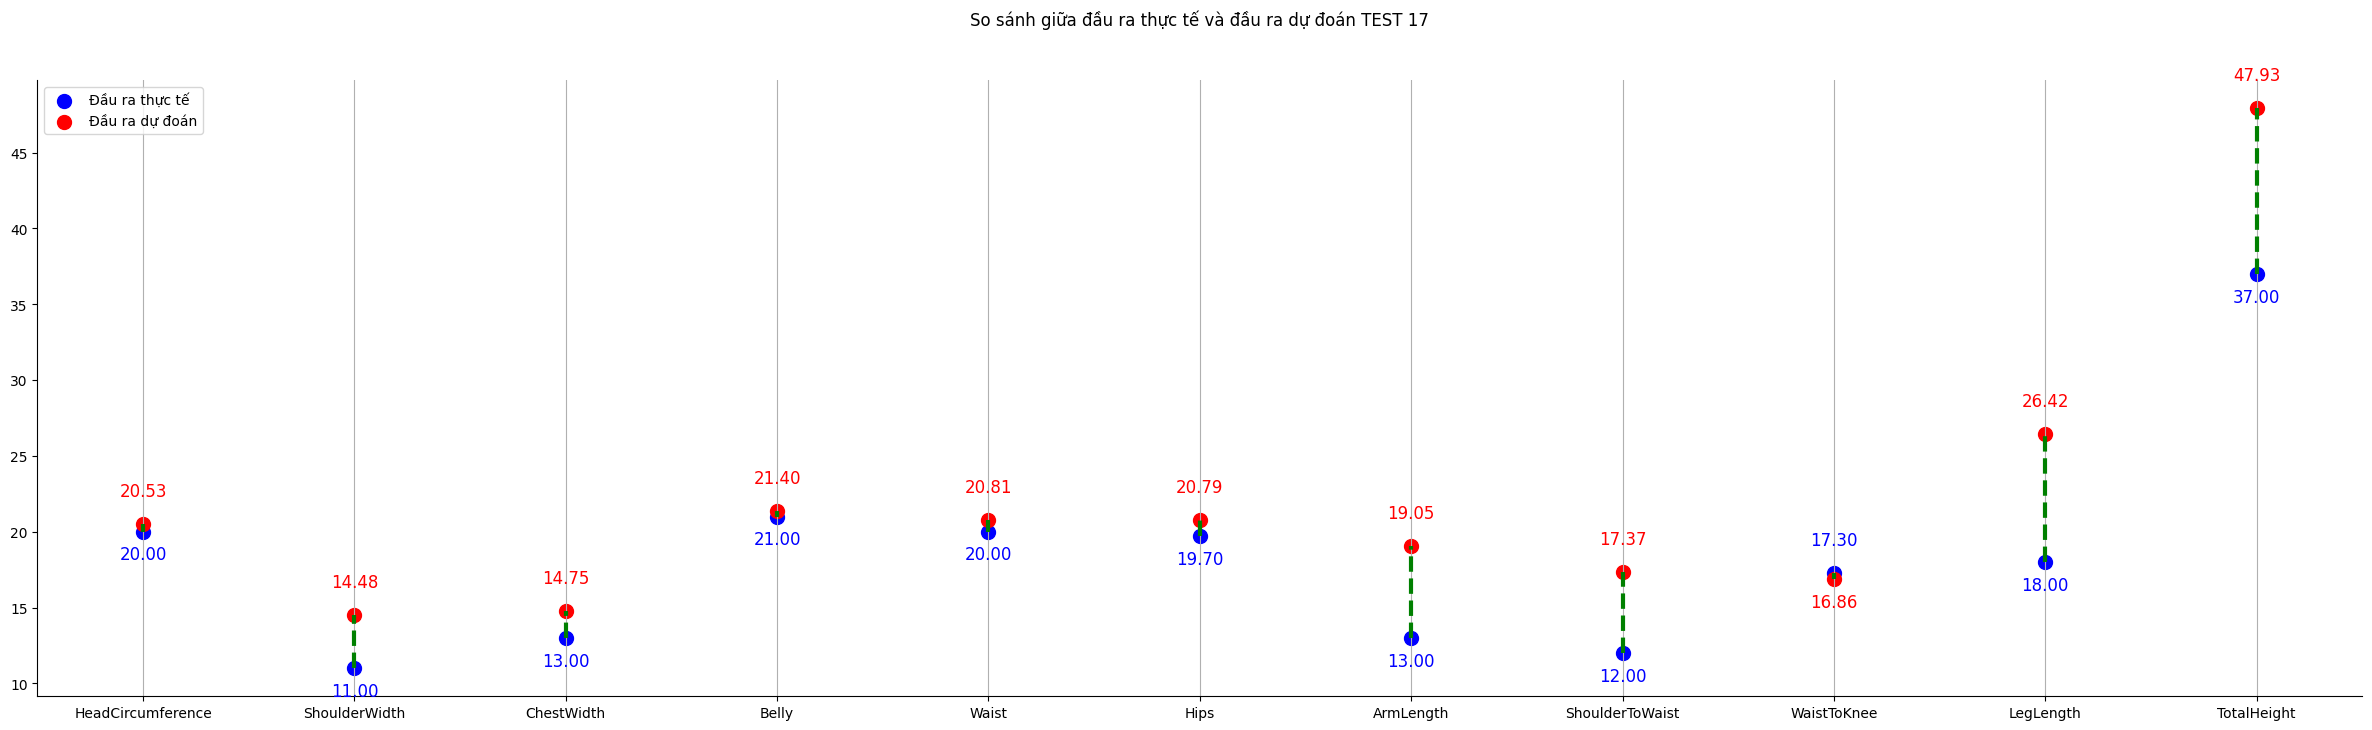

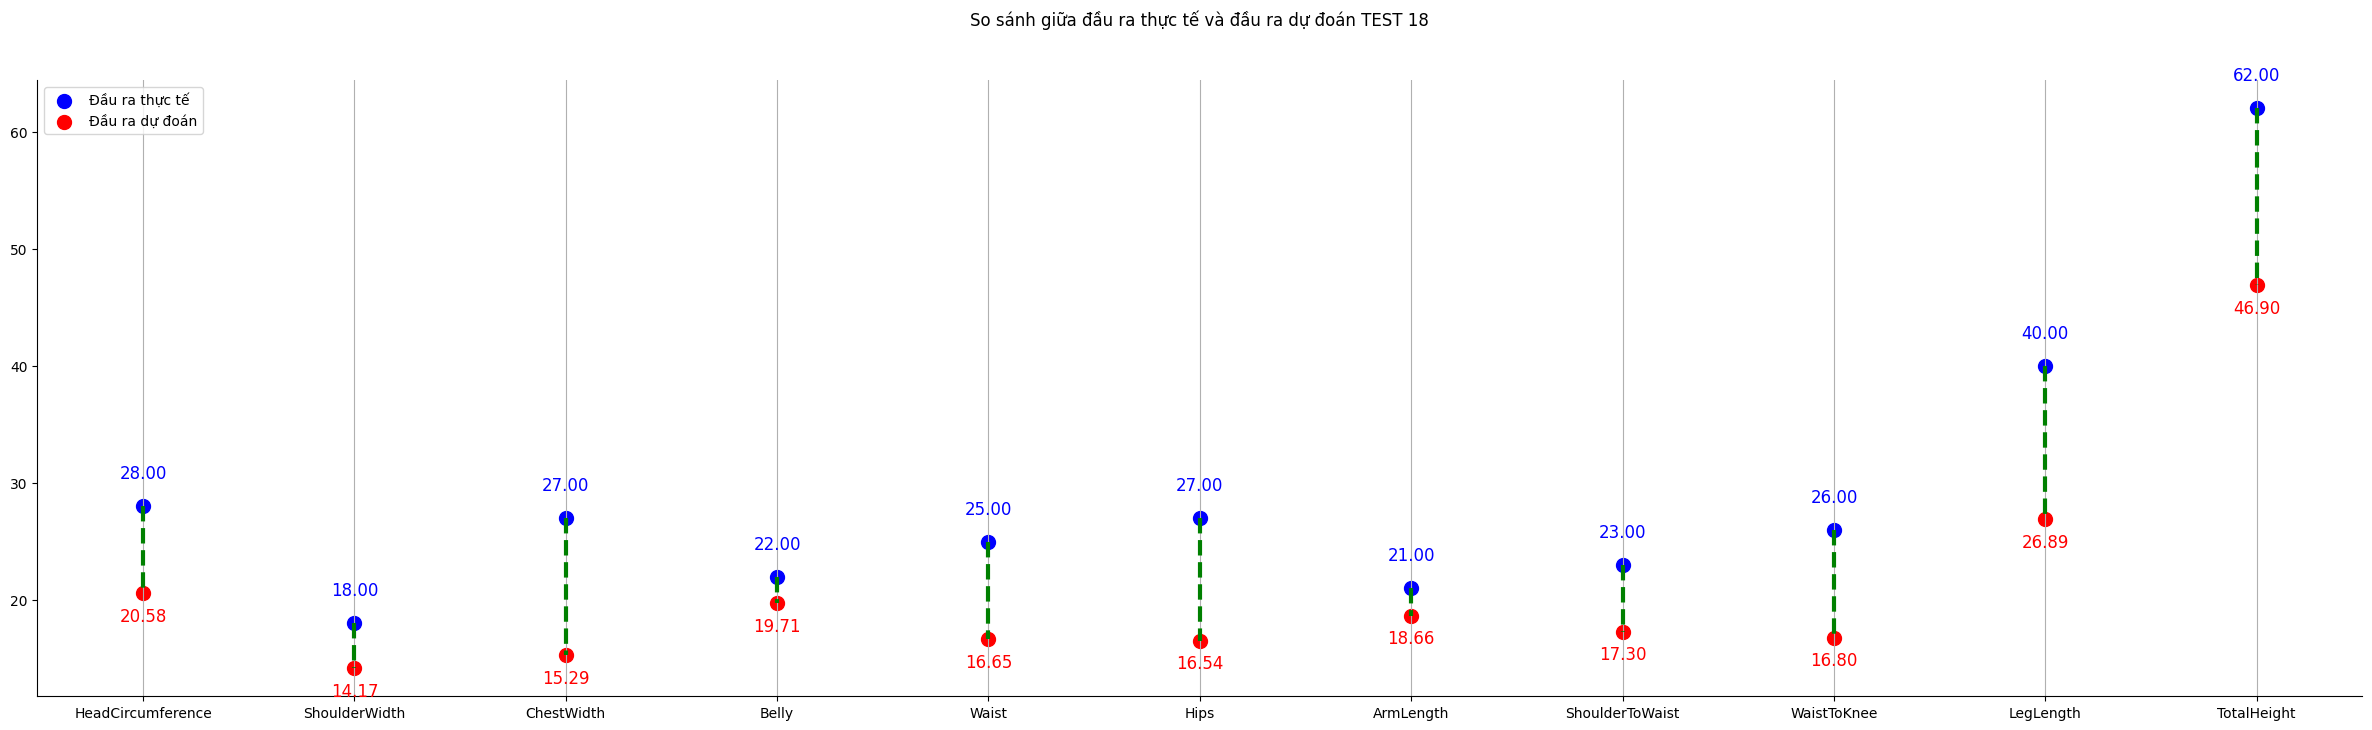

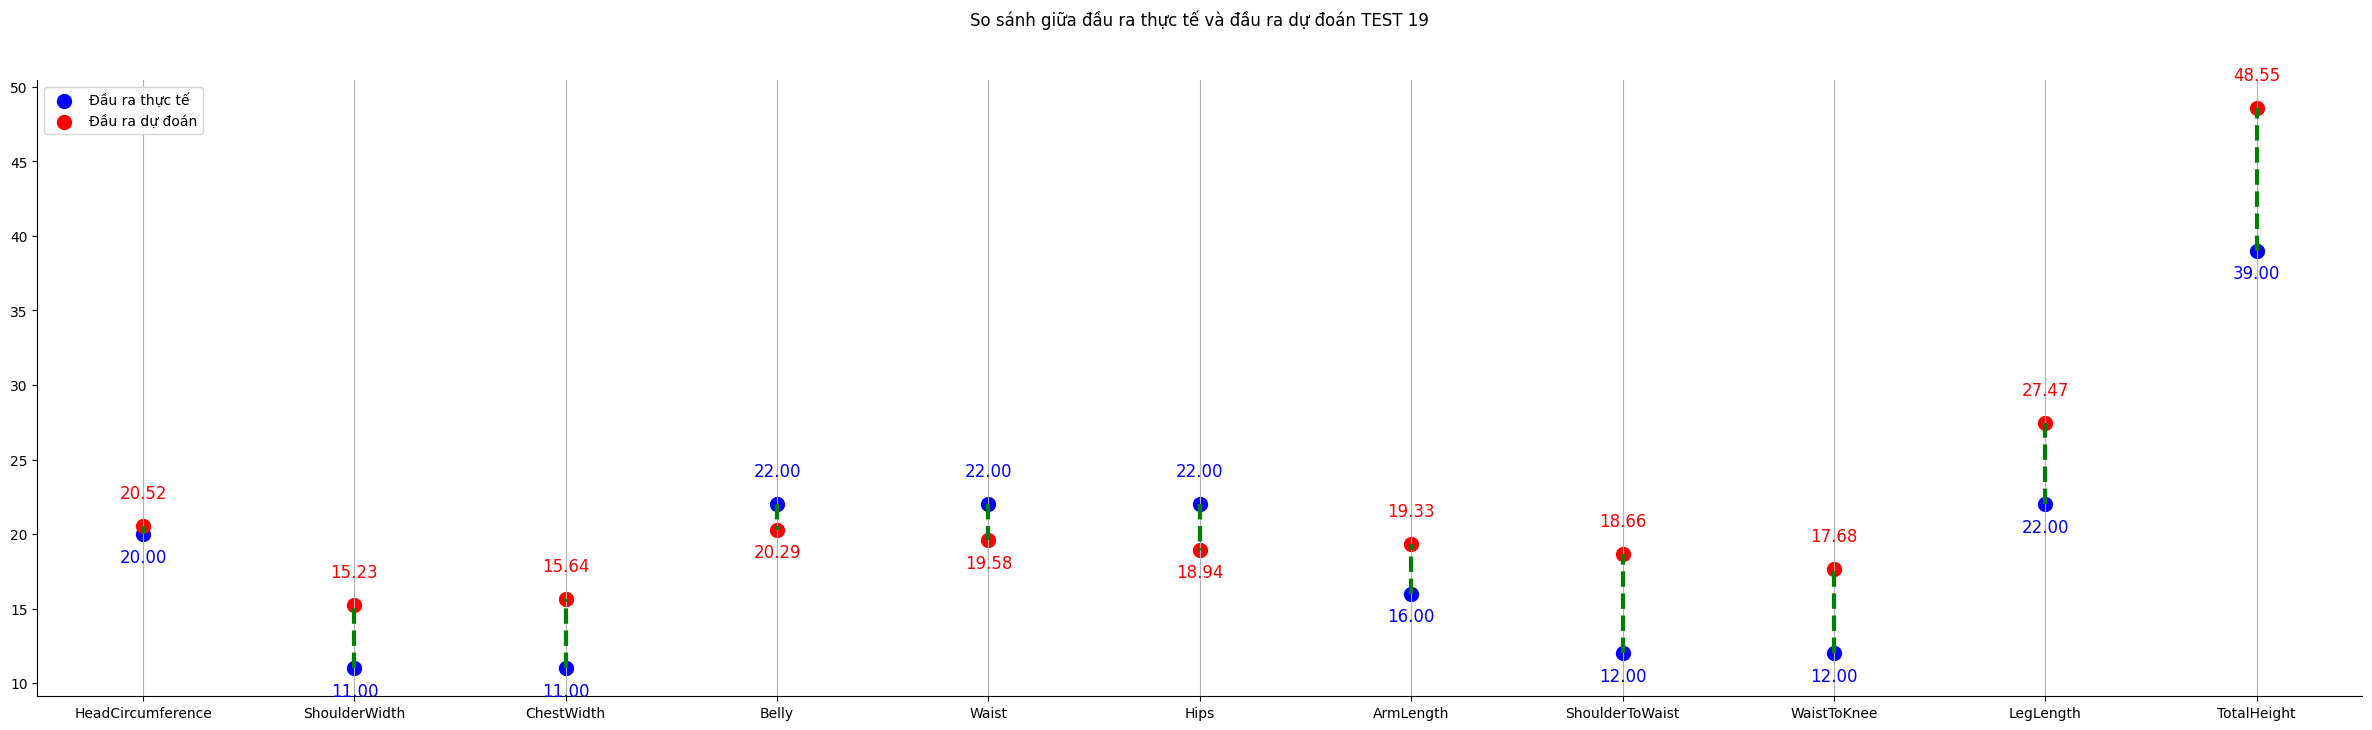

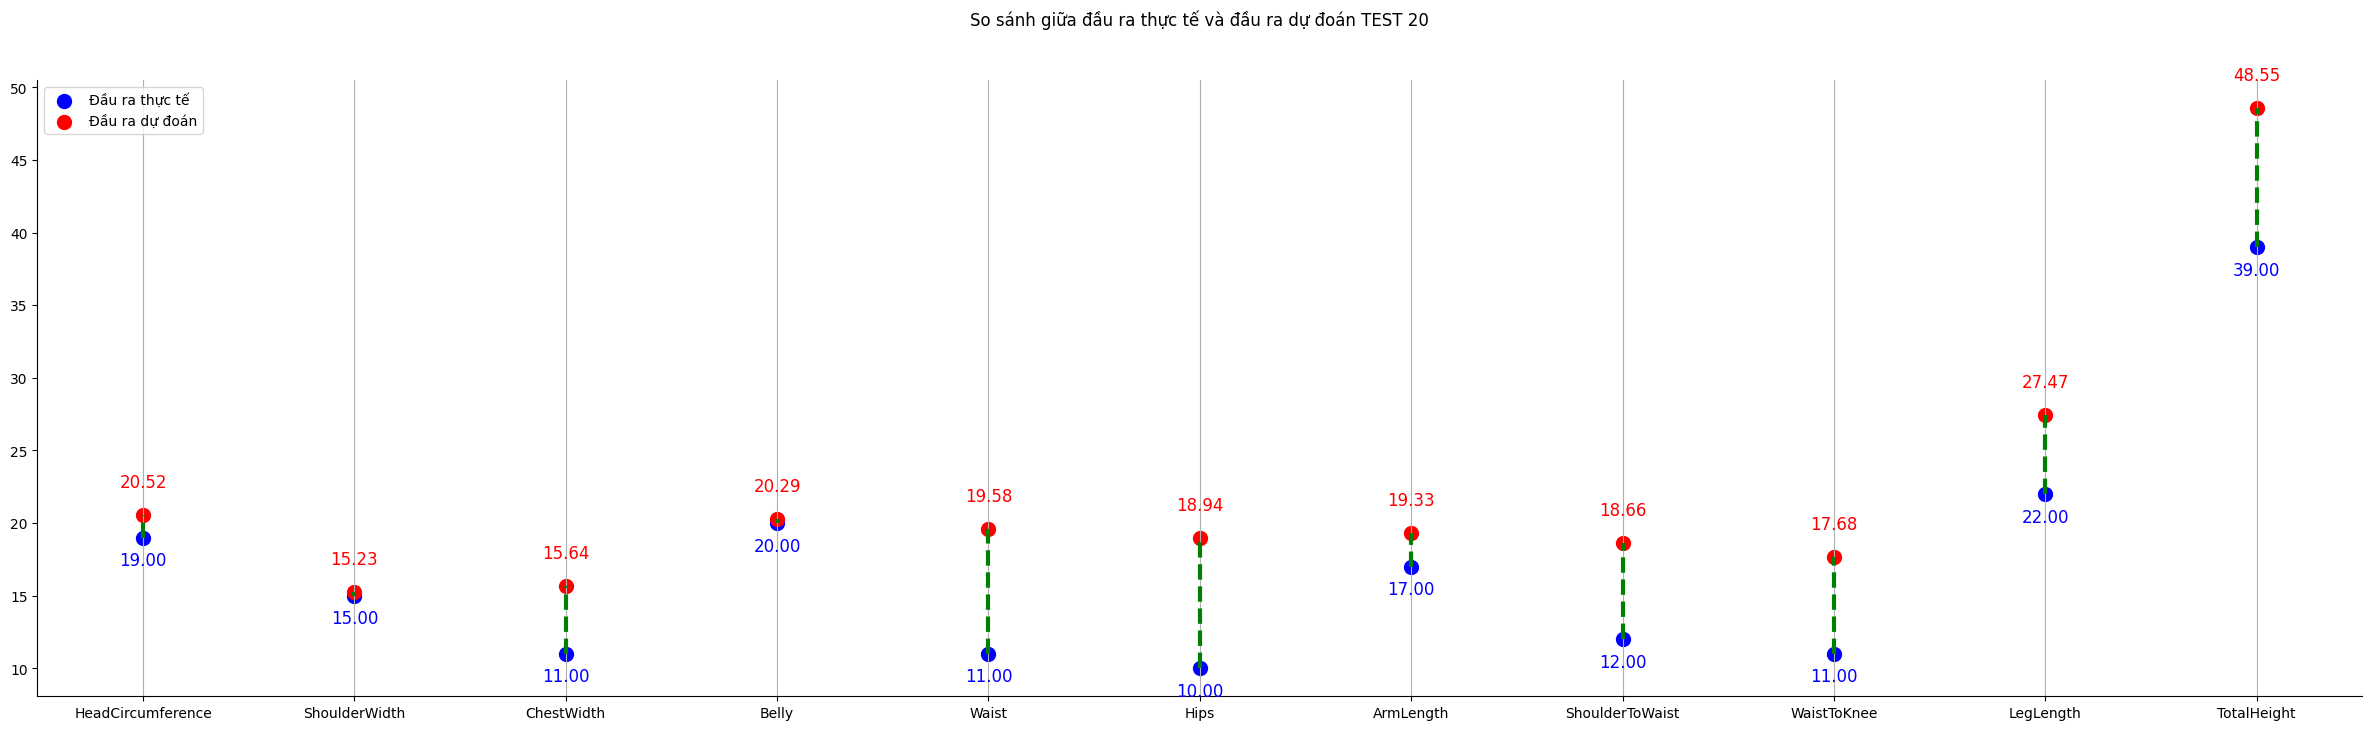

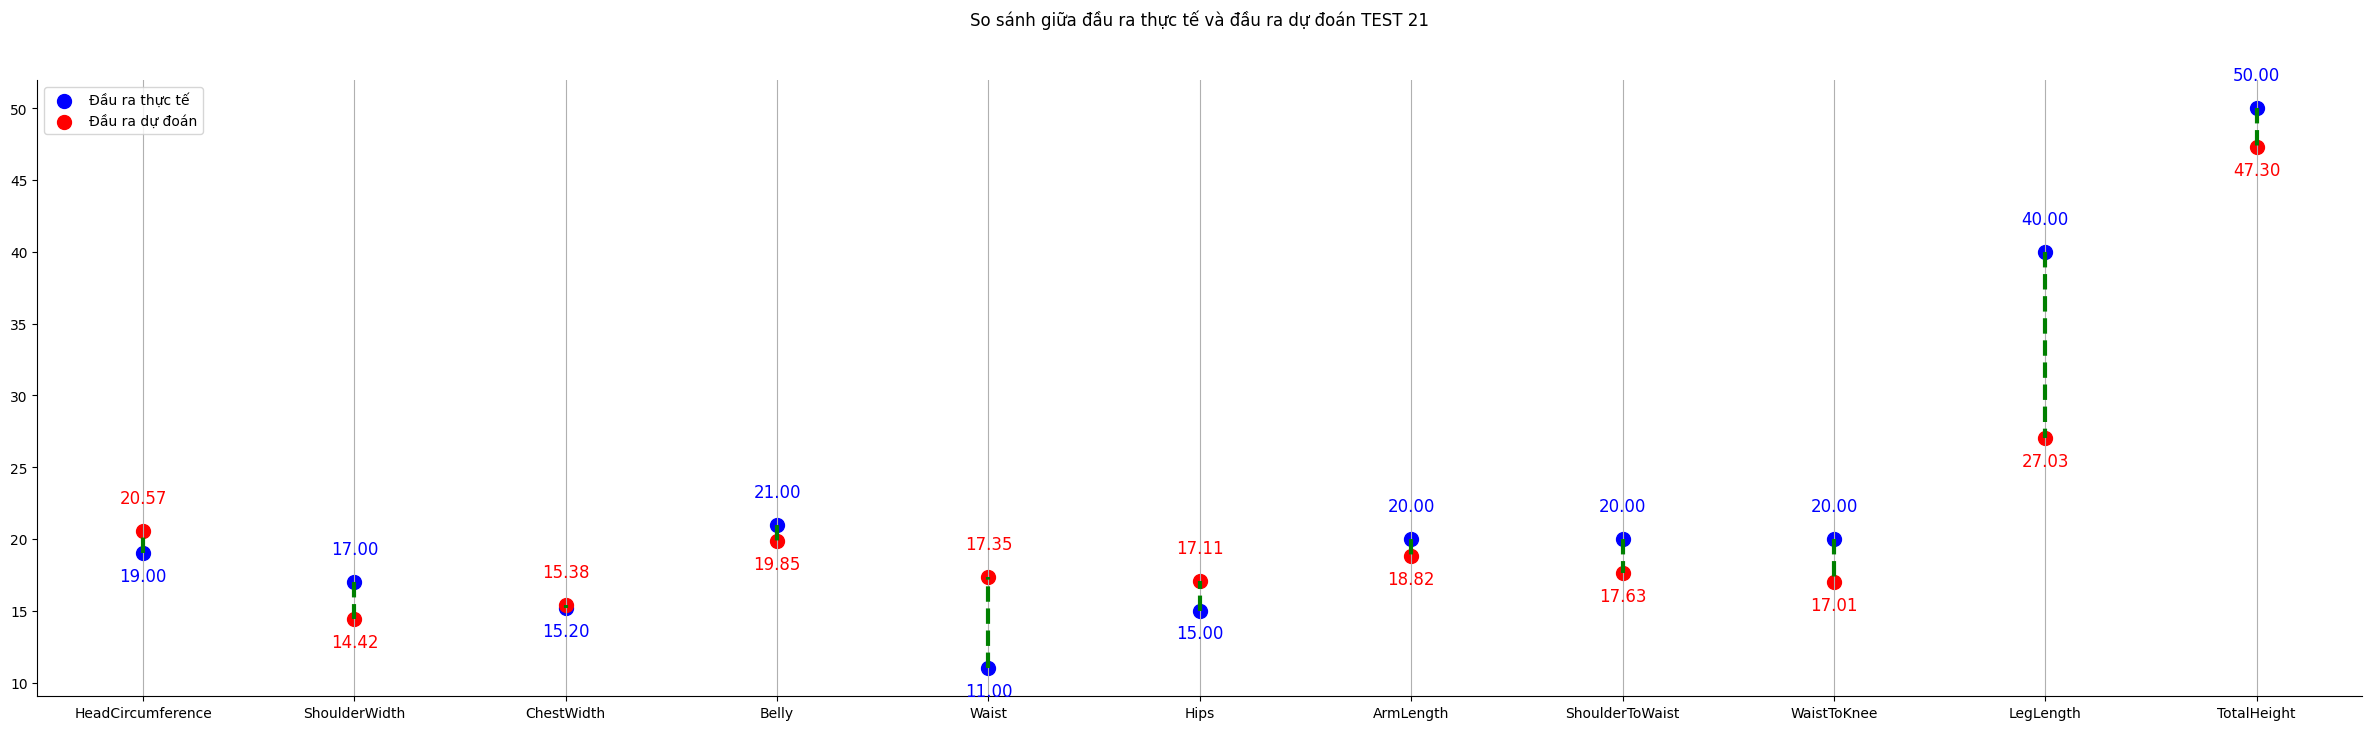

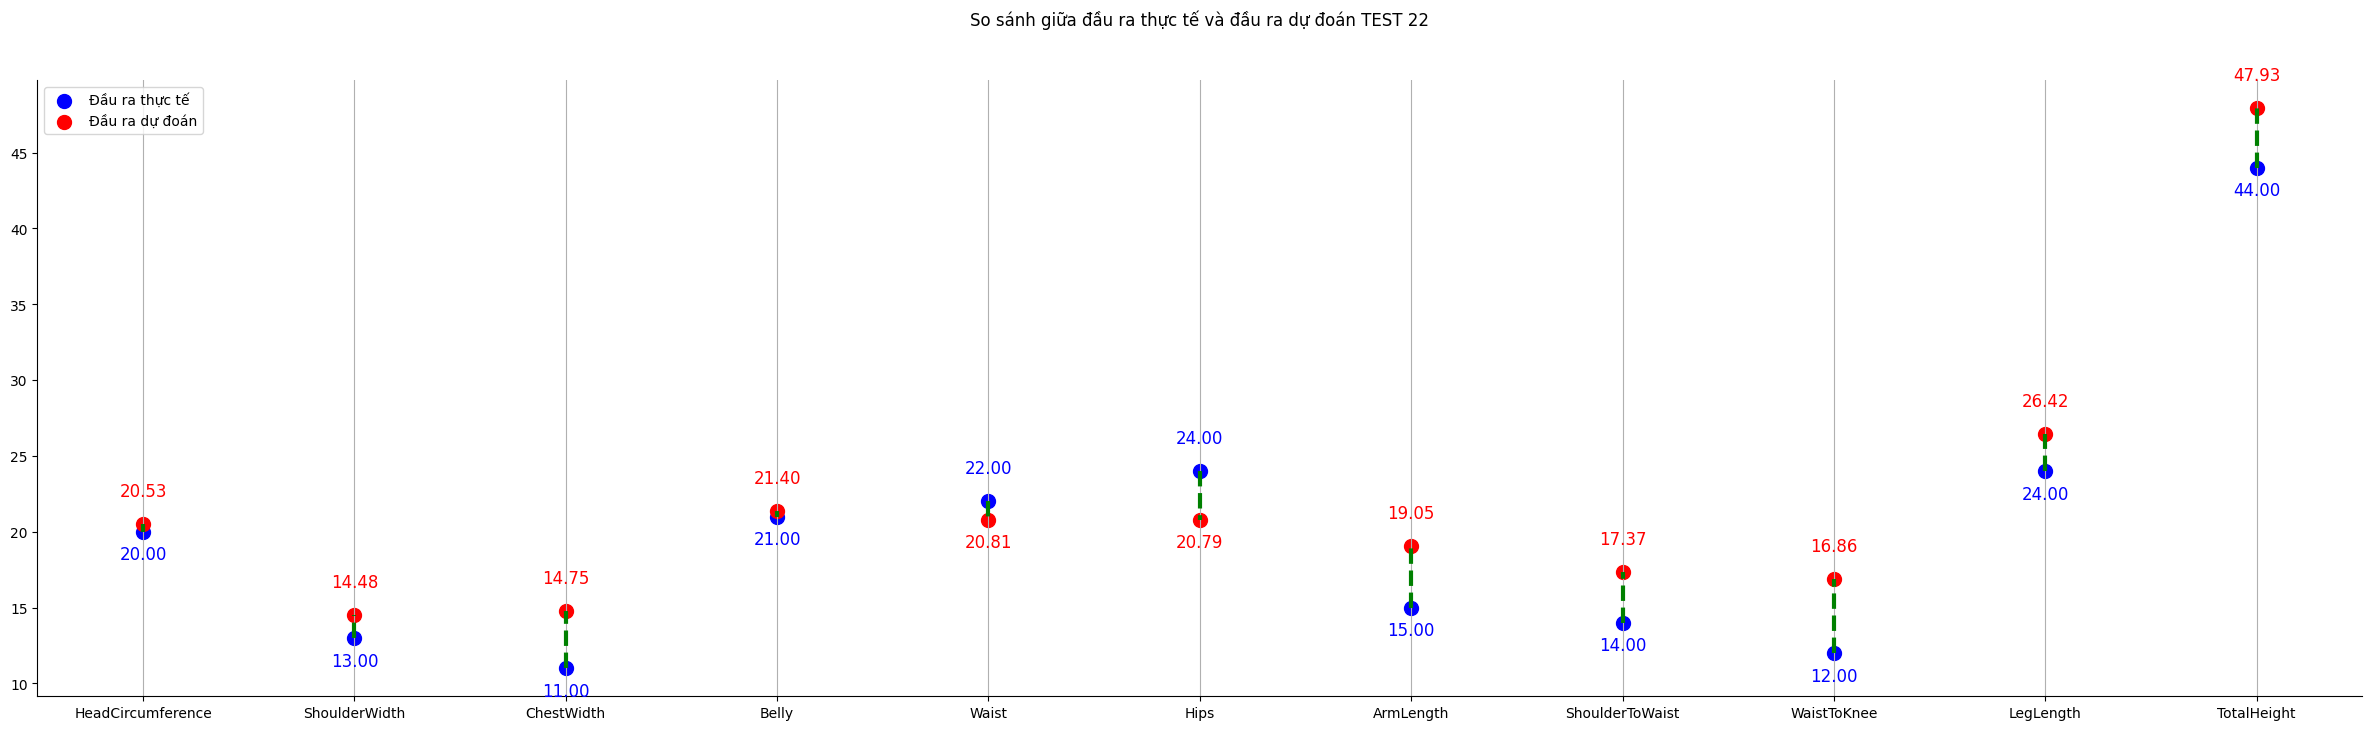

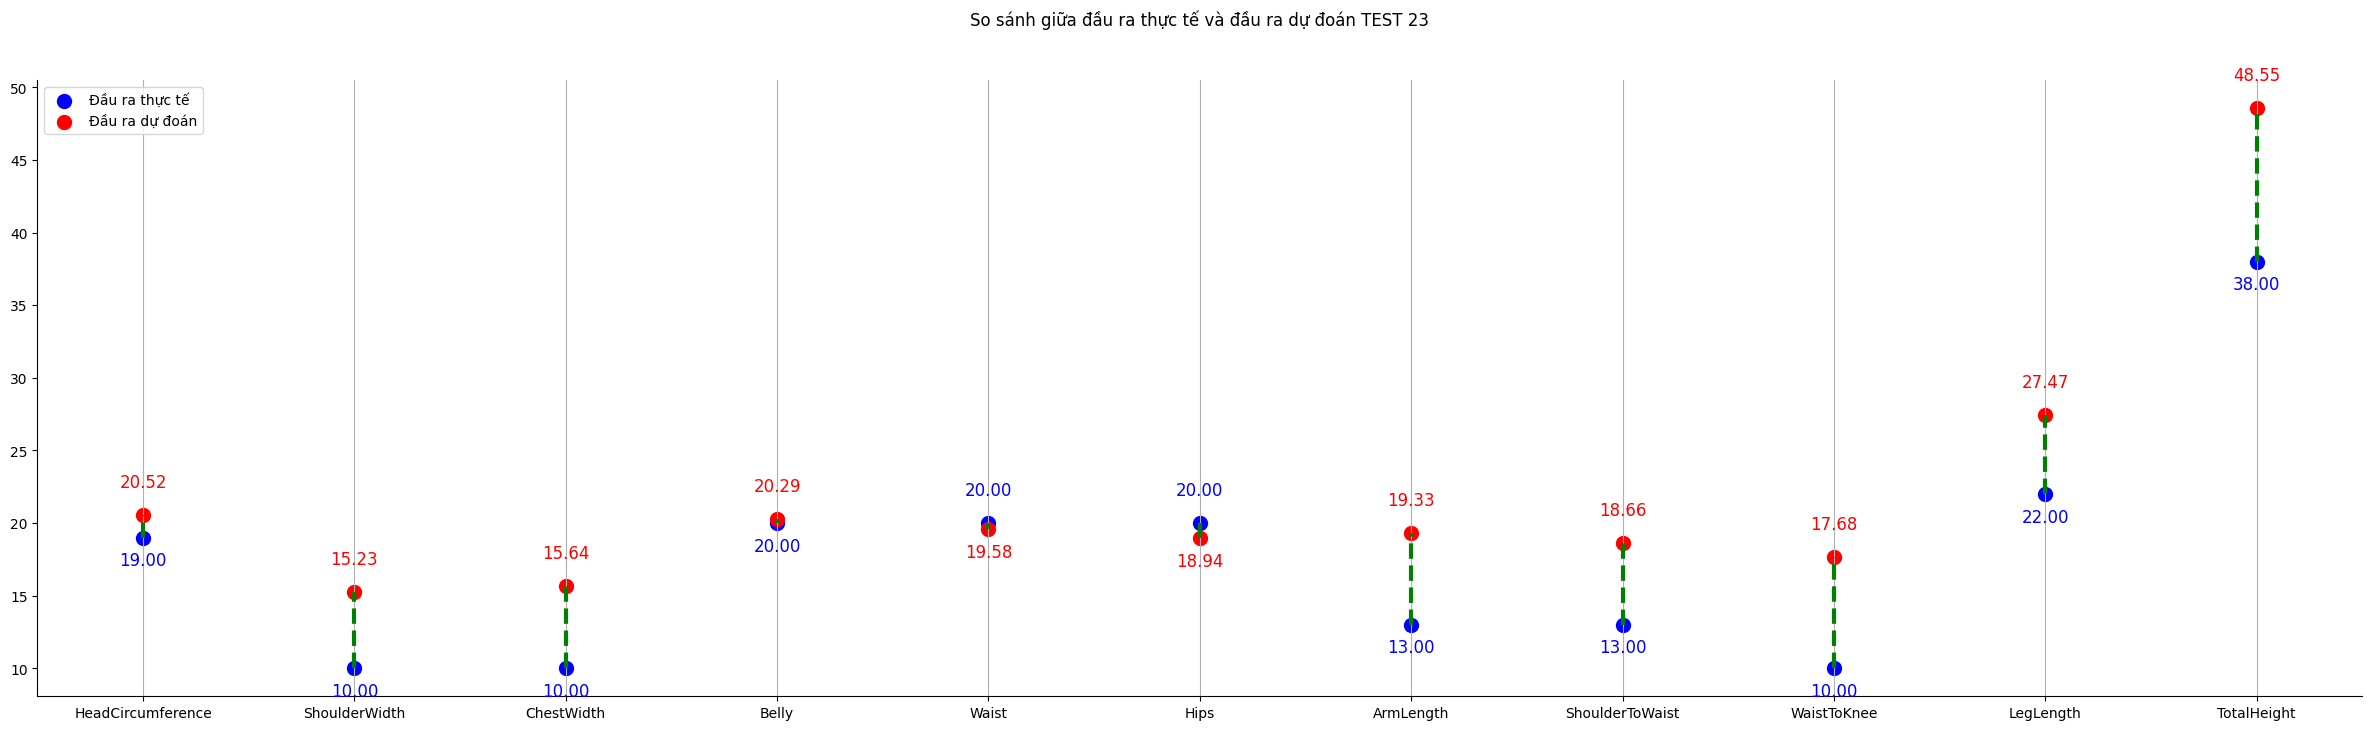

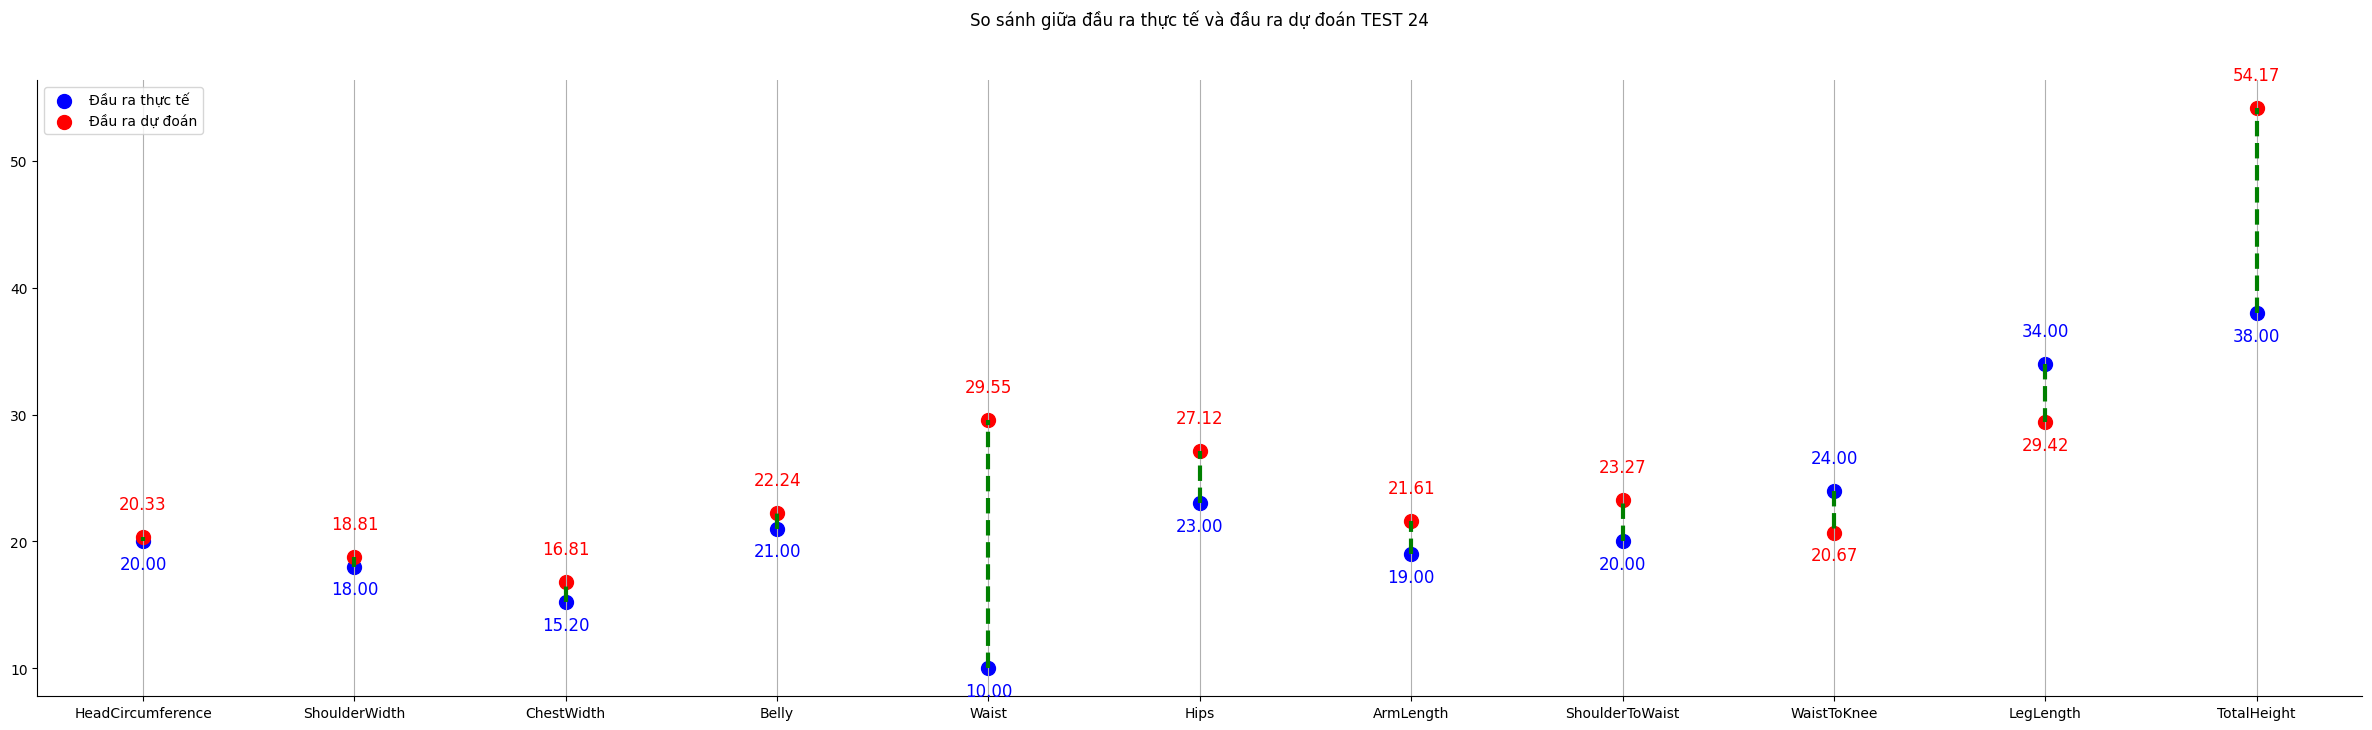

In [13]:
test = np.array(test)
pred = np.array(pred)

labels = input_columns + output_columns
input_size = len(input_columns)
output_size = len(output_columns)
for i in range(25):
  plt.figure(figsize=(30, 8))
  # Thay đổi viền
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  plt.scatter(output_columns, test[i][input_size:], marker='o', color='b', label='Đầu ra thực tế', s=100)
  plt.scatter(output_columns, pred[i][input_size:], marker='o', color='r', label='Đầu ra dự đoán', s=100)

      # Nối các điểm tương ứng của test và pred trong mỗi cột
  for j in range(len(output_columns)):
      plt.plot([output_columns[j], output_columns[j]], 
                [test[i][j + input_size], pred[i][j + input_size]], 
                color='green', linestyle='--', linewidth=3)
    # Thêm giá trị vào các điểm trên đồ thị cho đầu ra thực tế
  for j in range(len(output_columns)):
      d = (pred[i][j + input_size] - test[i][j + input_size]) / abs(pred[i][j + input_size] - test[i][j + input_size])
      plt.annotate(f'{test[i][j + input_size]:.2f}', (output_columns[j], test[i][j + input_size]), textcoords="offset points", xytext=(0,-20 * d), ha='center', fontsize=12, color='blue')
      plt.annotate(f'{pred[i][j + input_size]:.2f}', (output_columns[j], pred[i][j + input_size]), textcoords="offset points", xytext=(0,20 * d), ha='center', fontsize=12, color='red')
      
  # Thêm tiêu đề và nhãn trục
  plt.title("So sánh giữa đầu ra thực tế và đầu ra dự đoán TEST {}".format(i), pad = 40)

  # Hiển thị legend
  plt.legend()

  # Hiển thị lưới
  plt.grid(True, axis='x')
  plt.savefig(figure_path / f"test_{i}.png")

  # Hiển thị biểu đồ
  plt.show()